In [1]:
import os
import glob
import obspy
import numpy as np
import h5py
from obspy import UTCDateTime as UTC
import matplotlib.pyplot as plt
from scipy import signal
from obspy.signal.util import smooth
import time
from scipy.signal import tukey
import obspy.signal.filter
import matplotlib.patches as patches
from matplotlib.offsetbox import AnchoredText

import sys
sys.path.append('/home/yaolinm/Projects/Florence/funcs/')
from ncf import *
from dbf import *
from extraction import *
from inversion import *

In [61]:
sources=np.arange(450,2700,5)   
ground_model=np.zeros((len(sources),80,2))

path='/scratch/zspica_root/zspica0/yaolinm/Florence/multimode_inversion/'

for i,source in enumerate(sources):
    
    if (len(glob.glob(path+str(source).zfill(4)+'/*')))==6:
       
        misfits=np.load(path+str(source).zfill(4)+'/misfits2.npy')
        models=np.load(path+str(source).zfill(4)+'/inverted2.npy')
        
        c=[]
        for j in range(len(misfits)):
            if 0<misfits[j]<=10:
                c.append(j)
                
        if len(c)>1:
            c=np.array(c)
            temp_mean=np.nanmean(models[c,:],axis=0)
            temp_std=np.nanstd(models[c,:],axis=0)
            
            for j in range(80):
                depth_vels=models[c,j]
                depth_vels=depth_vels[np.abs(depth_vels-temp_mean[j])<=2*temp_std[j]]
                ground_model[i,j,0]=np.nanmean(depth_vels)
                ground_model[i,j,1]=np.nanstd(depth_vels)
                
        else:
            
            c=[]
            for j in range(len(misfits)):
                if 0<misfits[j]<=np.mean(misfits):
                    c.append(j)
            
            c=np.array(c)
            temp_mean=np.nanmean(models[c,:],axis=0)
            temp_std=np.nanstd(models[c,:],axis=0)

            for j in range(80):
                depth_vels=models[c,j]
                depth_vels=depth_vels[np.abs(depth_vels-temp_mean[j])<=2*temp_std[j]]
                ground_model[i,j,0]=np.nanmean(depth_vels)
                ground_model[i,j,1]=np.nanstd(depth_vels)

In [16]:
sources=np.arange(450,2700,5)   
ground_model=np.zeros((len(sources),80,2))

path='/scratch/zspica_root/zspica0/yaolinm/Florence/multimode_inversion/'

for i,source in enumerate(sources):
    
    if (len(glob.glob(path+str(source).zfill(4)+'/*')))==6:
       
        misfits=np.load(path+str(source).zfill(4)+'/misfits2.npy')
        misfits=misfits[misfits>0]
        models=np.load(path+str(source).zfill(4)+'/inverted2.npy')
        
        c=[]
        for j in range(len(misfits)):
            if 0<misfits[j]<=10:
                c.append(j)
                
        if len(c)>1:
            c=np.array(c)
            temp_mean=np.nanmean(models[c,:],axis=0)
            temp_std=np.nanstd(models[c,:],axis=0)
            
            for j in range(80):
                depth_vels=models[c,j]
                depth_vels=depth_vels[np.abs(depth_vels-temp_mean[j])<=2*temp_std[j]]
                ground_model[i,j,1]=np.nanstd(depth_vels)
                
                
        else:
            
            c=[]
            for j in range(len(misfits)):
                if 0<misfits[j]<=np.mean(misfits):
                    c.append(j)
            
            c=np.array(c)
            temp_mean=np.nanmean(models[c,:],axis=0)
            temp_std=np.nanstd(models[c,:],axis=0)

            for j in range(80):
                depth_vels=models[c,j]
                depth_vels=depth_vels[np.abs(depth_vels-temp_mean[j])<=2*temp_std[j]]
                ground_model[i,j,1]=np.nanstd(depth_vels)
                
        minindex=np.argmin(misfits)
        ground_model[i,:,0]=models[minindex,:]

In [50]:
array_ch=800
receiver_beams,source_beams=[],[]
finished=np.sort(glob.glob('/scratch/zspica_root/zspica0/yaolinm/Florence/dbf/master/*'))

for beam in finished:
    
    if 'source_'+str(array_ch).zfill(4) in beam:
        source=int(array_ch)
        receiver=int(os.path.basename(beam).split('_')[3])
        
        if 300<=abs(receiver-source)<=800:
            source_beams.append(beam)
            
    if 'receiver_'+str(array_ch).zfill(4) in beam:
        receiver=int(array_ch)
        source=int(os.path.basename(beam).split('_')[1])
        
        if 300<=abs(receiver-source)<=800:
            receiver_beams.append(beam)
            
cpts=[]
for beam in receiver_beams:
    cpts.append(int(beam.split('_')[2]))
for beam in source_beams:
    cpts.append(int(beam.split('_')[4]))

In [52]:
source=800

misfits=np.load(path+str(source).zfill(4)+'/misfits2.npy')
models=np.load(path+str(source).zfill(4)+'/inverted2.npy')

c=[]
valid_cpts=[]
for j in range(len(misfits)):
    if 0<misfits[j]<=10:
        c.append(j)
        valid_cpts.append(cpts[j])

c=np.array(c)
curves=models[c,:40]
distance_matrix = cdist(curves, curves, metric='euclidean')
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(curves)

/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
for i in range(len(curves)):
    print(valid_cpts[i],clusters[i])

375 1
380 1
395 1
400 1
1135 0
1145 0
1150 0
1155 0
1160 0
1165 0
1170 0
1175 0
1180 0
1185 0
1195 0
1200 0
1205 0
1215 0
1240 0
1540 1
1555 1


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


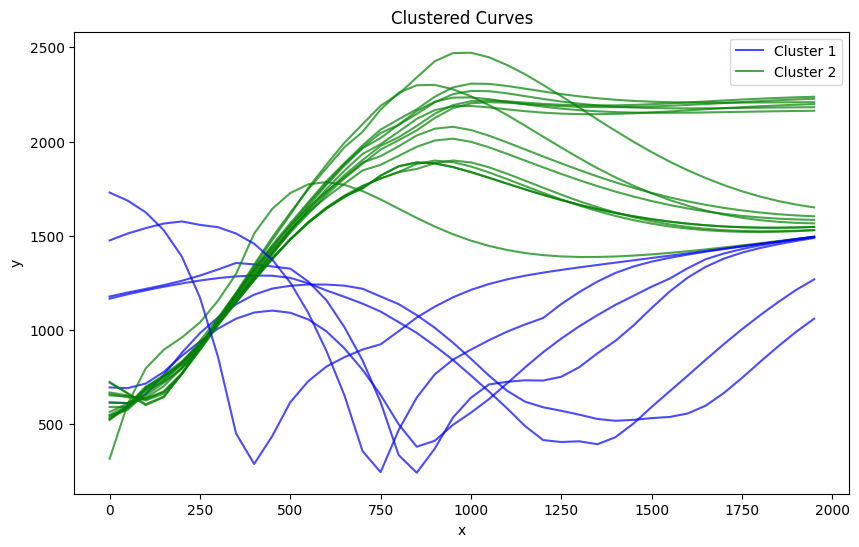

In [26]:
curves=models[c,:40]
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distance_matrix = cdist(curves, curves, metric='euclidean')

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(curves)

print(clusters)

x=np.arange(0,2000,50)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green','red']

for i, curve in enumerate(curves):
    plt.plot(x, curve, color=colors[clusters[i]], alpha=0.7, label=f'Cluster {clusters[i] + 1}' if i == 0 or i == 10 else "")

plt.legend(loc="upper right")
plt.title('Clustered Curves')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [7]:
name_save = 'Interp_bathy_NetCDF_Final.h5'

with h5py.File(name_save, 'r') as f:

    bathy = f.get('bathy')[:] # bathymetry at each channel (in m)
    IU_dist = f.get('IU_dist')[:]  # in meters
    Channel =  f.get('Channel')[:]  # Channel number
    lat  = f.get('lat_inter')[:]  # latitude of each channel
    lon = f.get('lon_inter')[:]# longitude of each channel
    inter_sta_dist = f.get('inter_sta_dist')[:] # distance between each interpolated channel (in m)
    
topo=bathy[135:2385:5]

/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


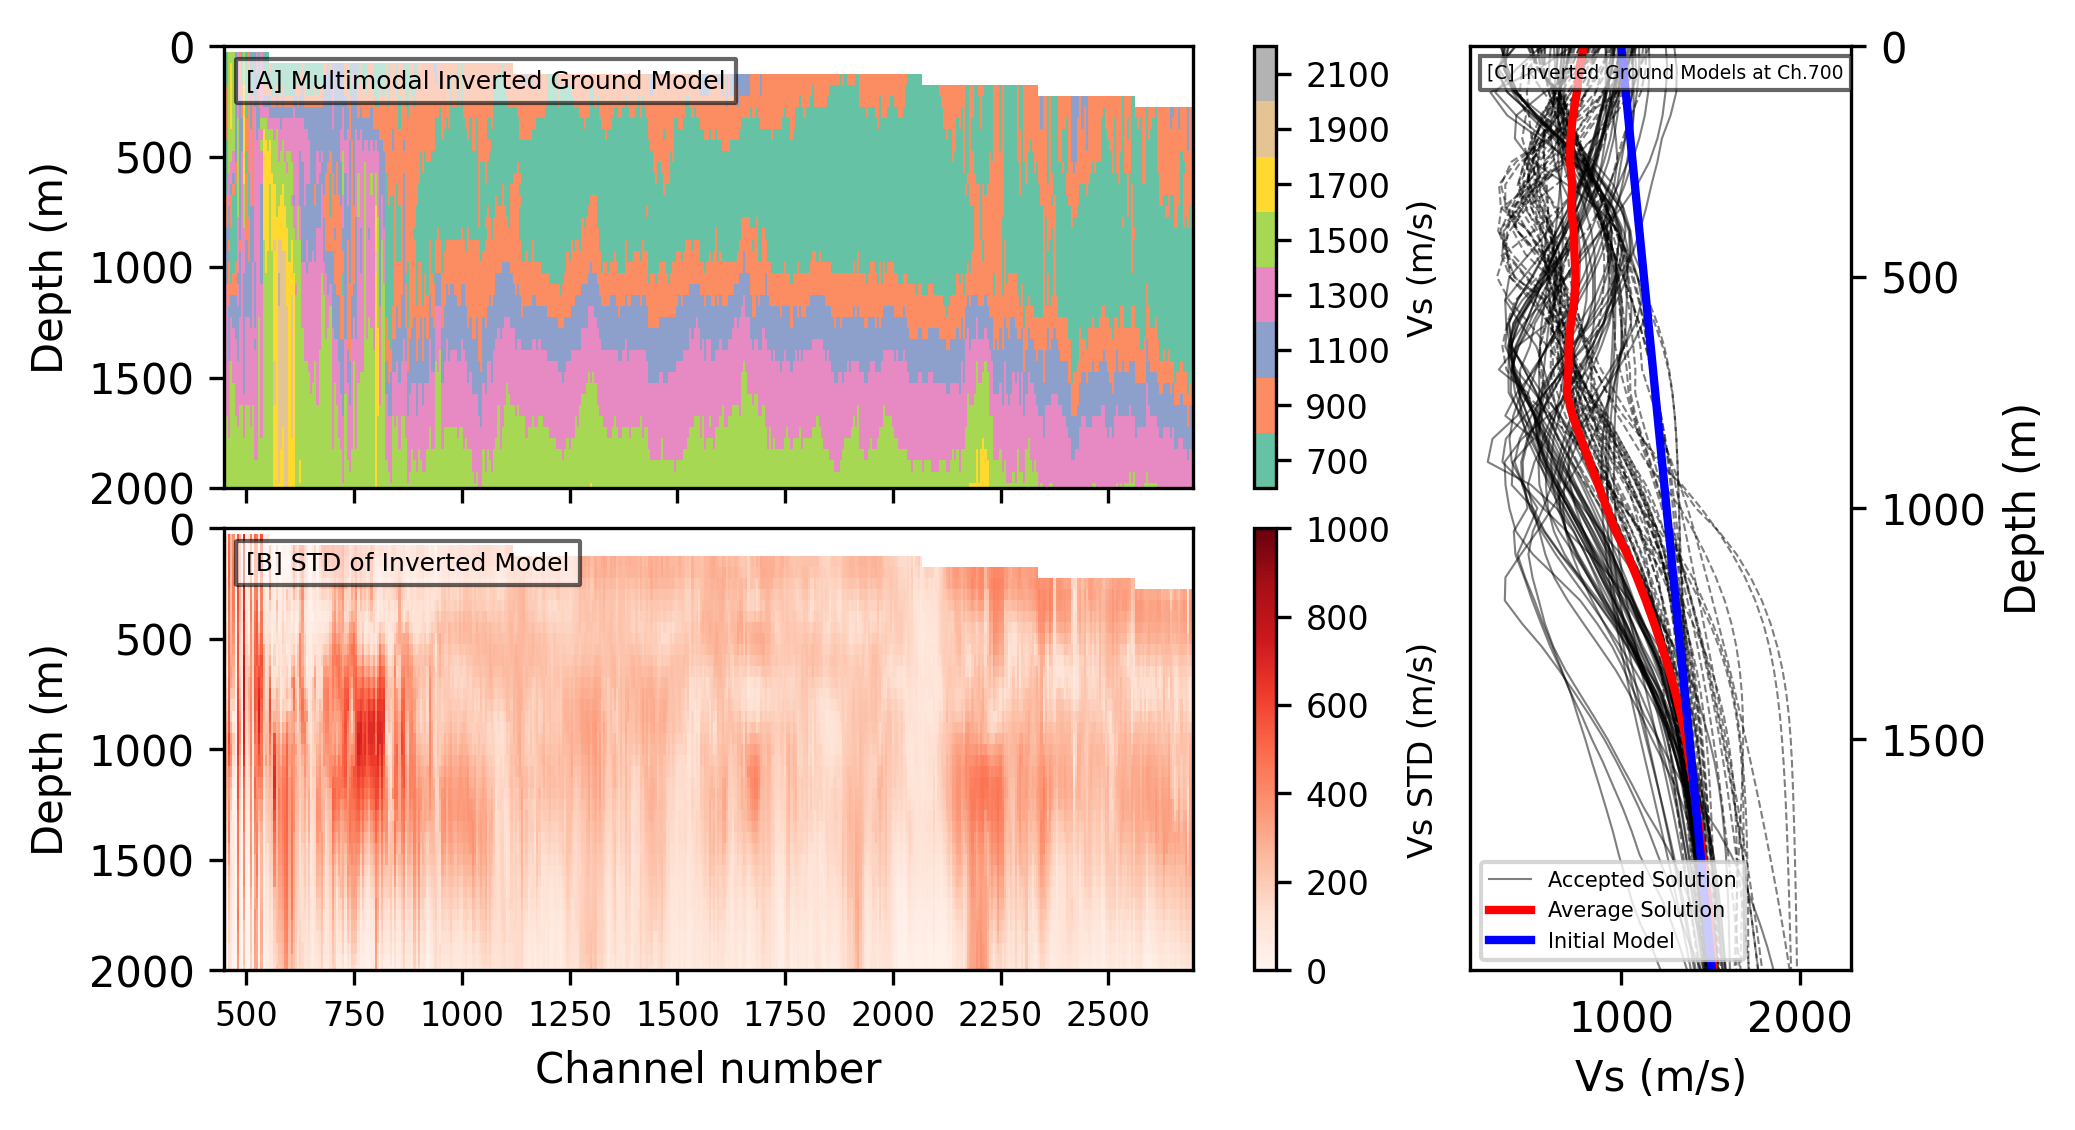

In [63]:
fig=plt.figure(figsize=(7,4),dpi=300)
fig.subplots_adjust(hspace=0.2,wspace=0.2)

ax1=plt.subplot2grid(shape=(4,8),loc=(0,0),colspan=6,rowspan=2)
ax2=plt.subplot2grid(shape=(4,8),loc=(2,0),colspan=6,rowspan=2)
ax3=plt.subplot2grid(shape=(4,8),loc=(0,6),colspan=2,rowspan=4)
axs=[ax2,ax1,ax3]

adjusted_model=np.zeros_like(ground_model)
for i in range(len(ground_model)):
    shifts=int(np.abs(topo[i])//50)+1
    adjusted_model[i,:shifts,:]=np.nan
    adjusted_model[i,shifts:,0]=ground_model[i,:ground_model.shape[1]-shifts,0]
    adjusted_model[i,shifts:,1]=ground_model[i,:ground_model.shape[1]-shifts,1]

depths=np.arange(0,4000,50)
X,Y=np.meshgrid(sources,depths)
std=axs[0].pcolormesh(X,Y,adjusted_model[:,:,1].T,vmax=1000,cmap='Reds')
axs[0].set_ylabel('Depth (m)')
axs[0].set_ylim(2000,0)
cbar=fig.colorbar(std,ax=axs[0])
cbar.set_label('Vs STD (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
axs[0].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[0].set_xticklabels([500,750,1000,1250,1500,1750,2000,2250,2500],fontsize=8)
at = AnchoredText('[B] STD of Inverted Model',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[0].add_artist(at)
axs[0].set_xlabel('Channel number')

    
vs=axs[1].pcolormesh(X,Y,adjusted_model[:,:,0].T,vmin=600,vmax=2200,cmap='Set2')
axs[1].set_ylabel('Depth (m)')
axs[1].set_ylim(2000,0)
cbar=fig.colorbar(vs,ax=axs[1])
cbar.set_label('Vs (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
cbar.set_ticks([700,900,1100,1300,1500,1700,1900,2100])
axs[1].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[1].set_xticklabels(['','','','','','','','',''])
at = AnchoredText('[A] Multimodal Inverted Ground Model',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[1].add_artist(at)

source=1200
misfits=np.load(path+str(source).zfill(4)+'/misfits2.npy')
models=np.load(path+str(source).zfill(4)+'/inverted2.npy')

c=[]
for j in range(len(misfits)):
    if 0<misfits[j]<=10:
        c.append(j)

c=np.array(c)
curves=models[c,:40]
distance_matrix = cdist(curves, curves, metric='euclidean')
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(curves)
axs[2].plot(models[c[0],:], np.arange(0,4000,50), "k-", linewidth=0.5,alpha=0.5,label='Accepted Solution')

for i in range(1,len(c)):
    if clusters[i]==0:
        axs[2].plot(models[c[i],:], np.arange(0,4000,50), "k--", linewidth=0.5,alpha=0.5)

    else:
        axs[2].plot(models[c[i],:], np.arange(0,4000,50), "k-", linewidth=0.5,alpha=0.5)

axs[2].plot(ground_model[list(sources).index(source),:,0],np.arange(0,4000,50), "r-", linewidth=2,label='Average Solution')     
axs[2].plot(np.ones(80)*1000*np.linspace(1,2,80), np.arange(0,4000,50), 'b', linewidth=2,label='Initial Model')  
axs[2].set_ylim(2000,0)      
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position('right')
axs[2].set_yticks([0,500,1000,1500])
axs[2].set_yticklabels([0,500,1000,1500])
axs[2].set_ylabel('Depth (m)')
axs[2].set_xlabel('Vs (m/s)')
axs[2].legend(fontsize=5,loc=3)
at = AnchoredText('[C] Inverted Ground Models at Ch.700',prop=dict(size=4.5), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[2].add_artist(at)

0 0
3 104.55742235909534


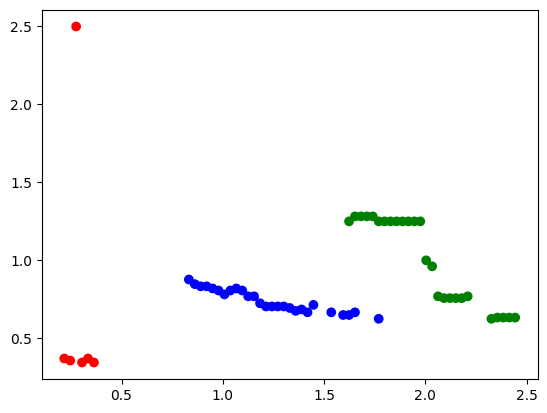

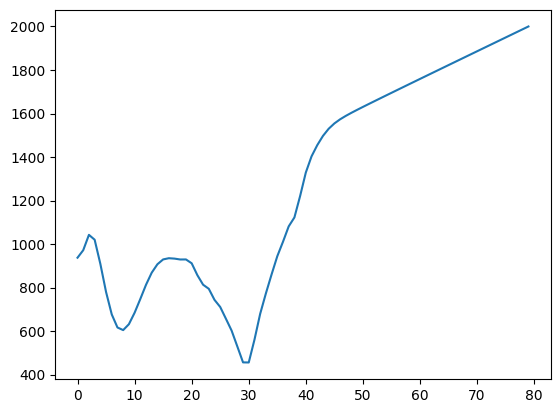

1 1
3 12.509838710322736


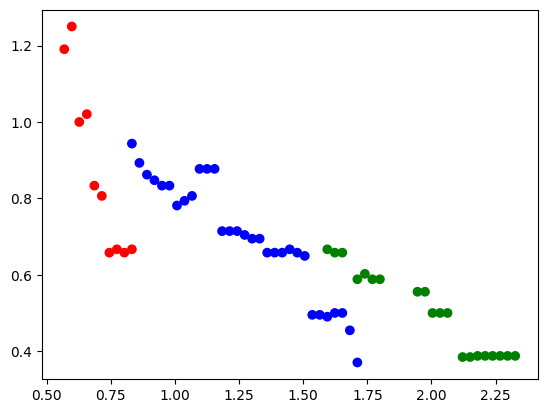

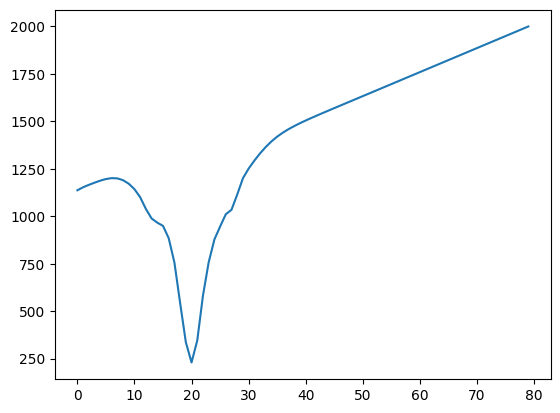

2 2
3 16.210931575087166


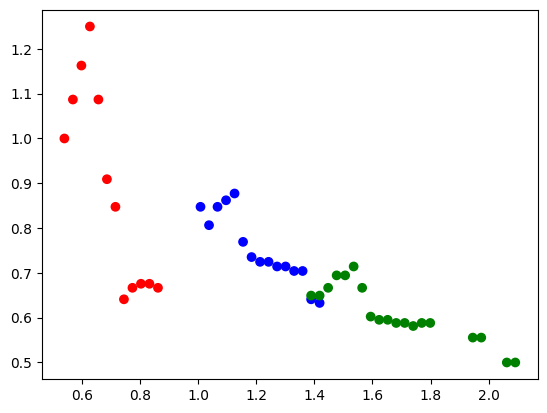

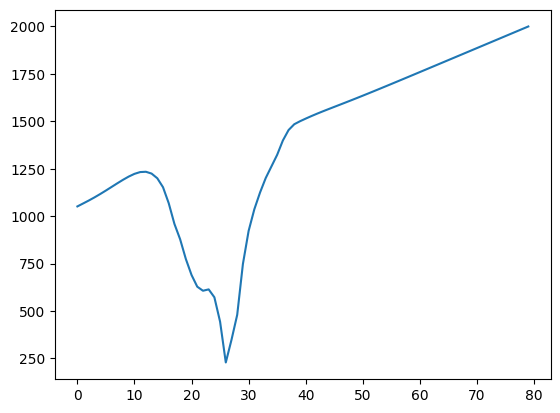

3 3
3 20.97252905877428


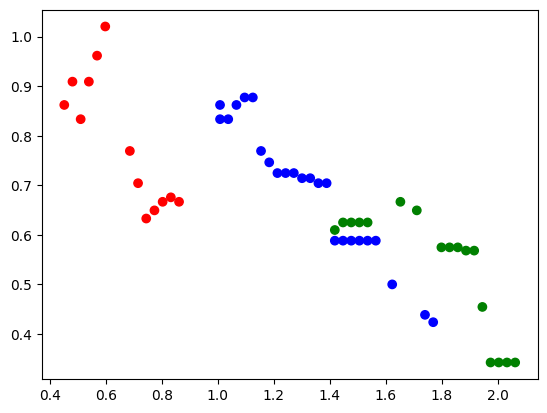

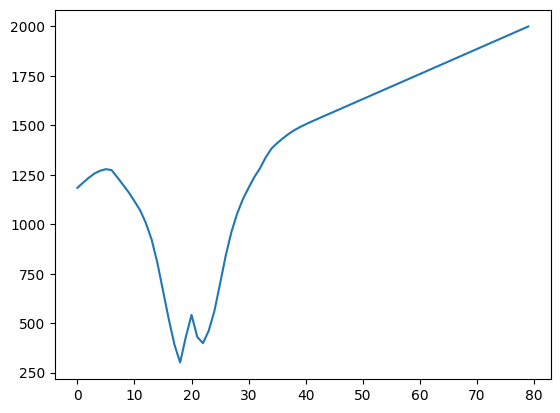

4 4
3 12.200981602809476


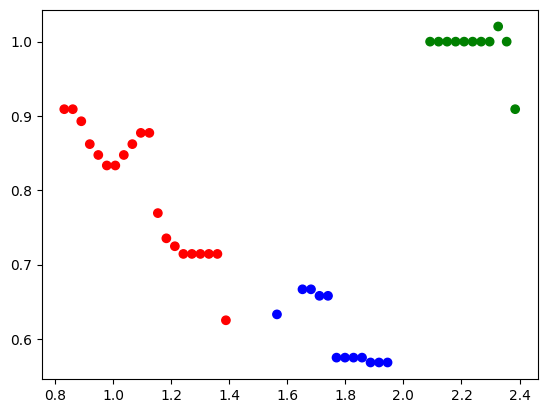

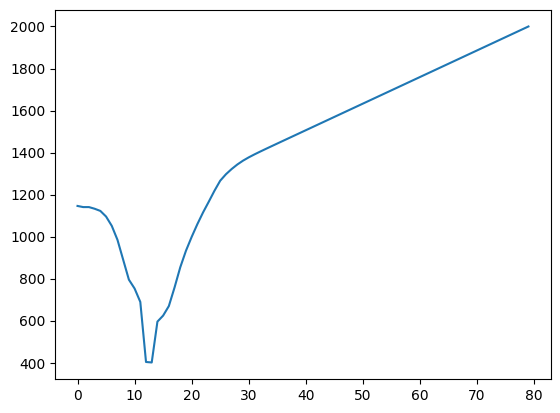

5 5
3 5.038660480635501


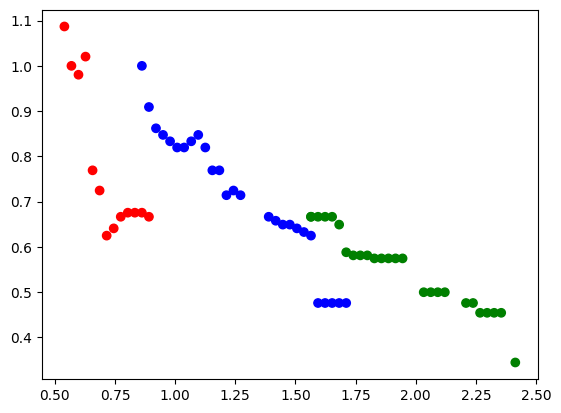

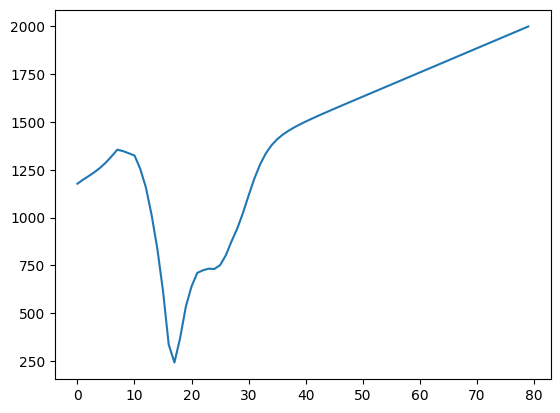

6 6
3 6.38074402422161


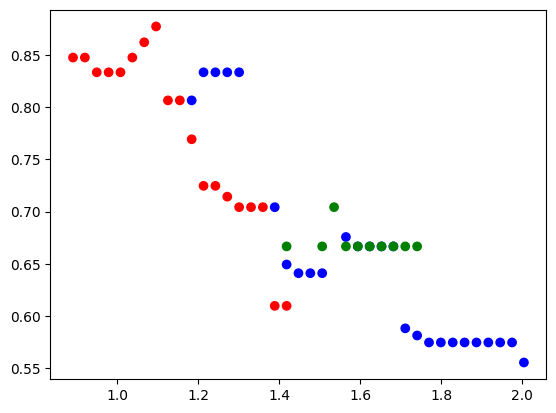

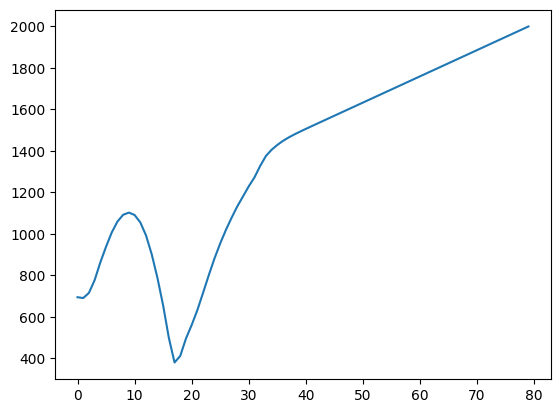

7 7
3 68.65808391976528


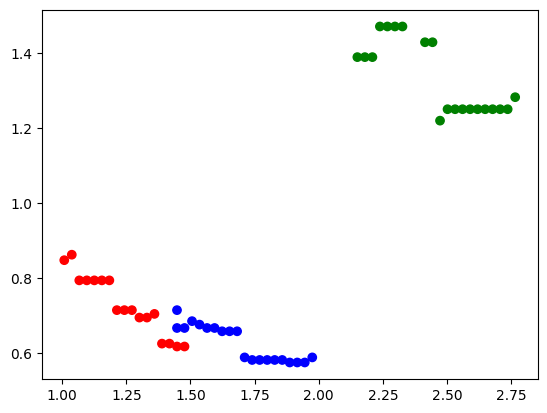

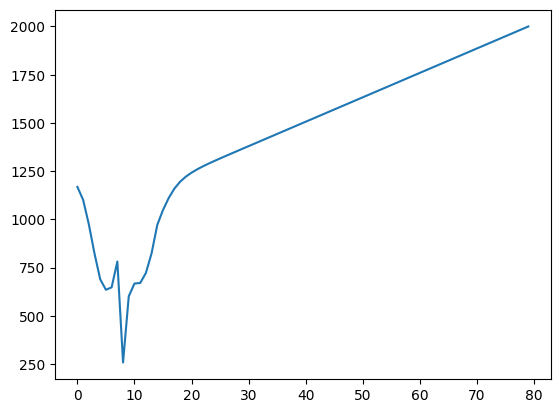

8 8
2 33.151475880917836


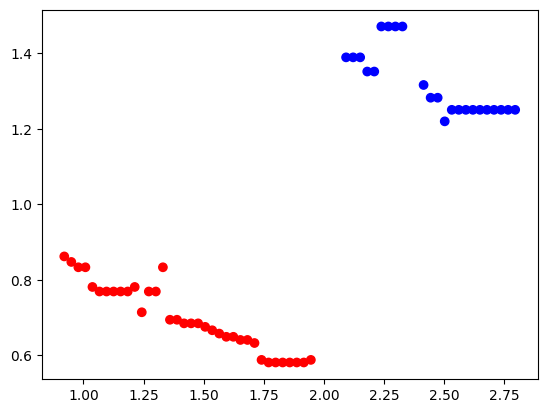

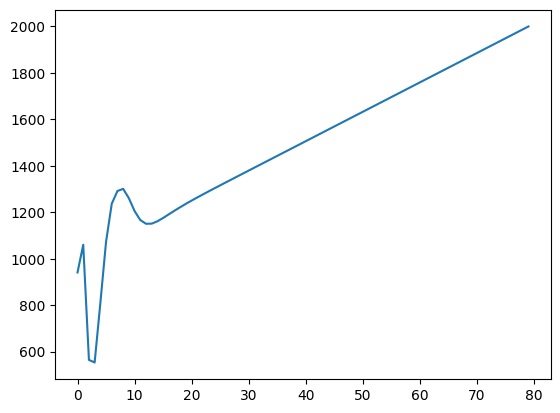

9 9
3 3.7163219404048706


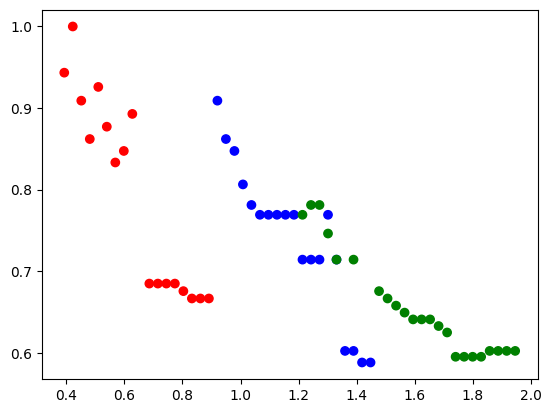

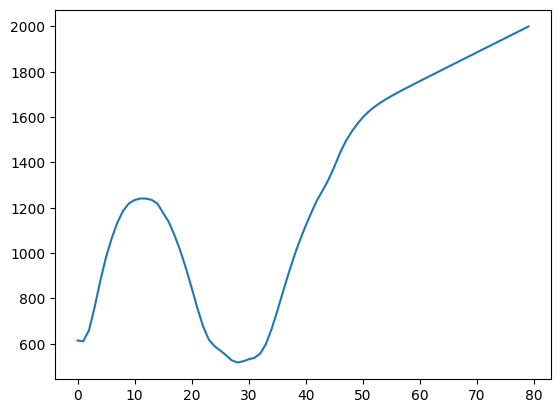

10 10
3 7.232437897108228


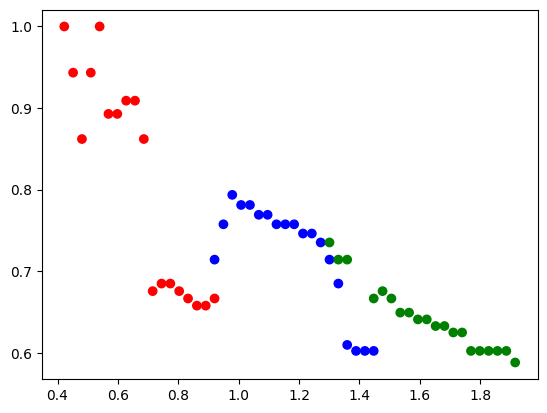

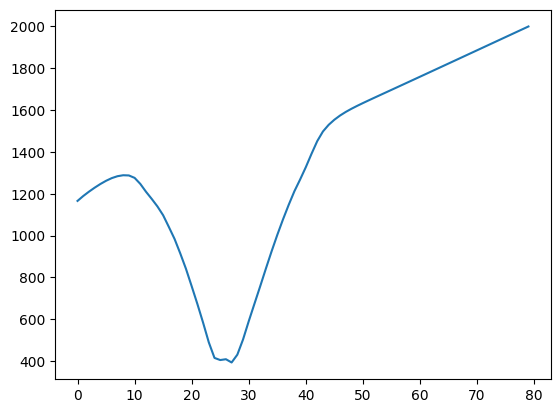

11 11
3 10.461774880258599


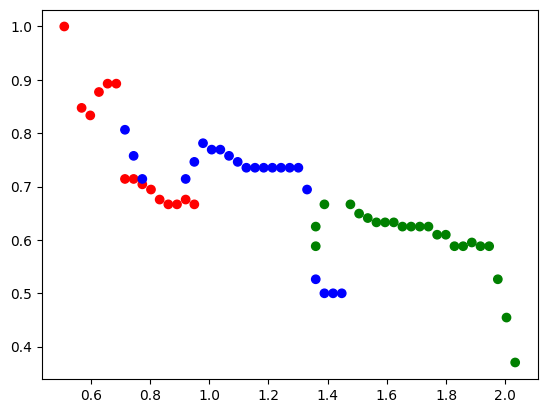

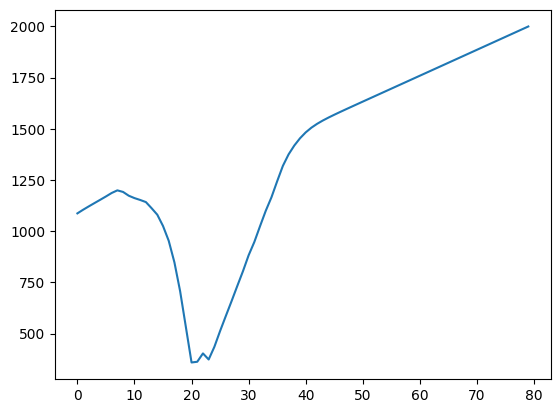

12 12
3 10.850368008993694


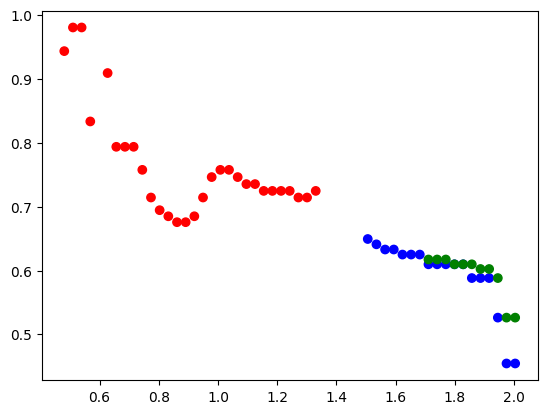

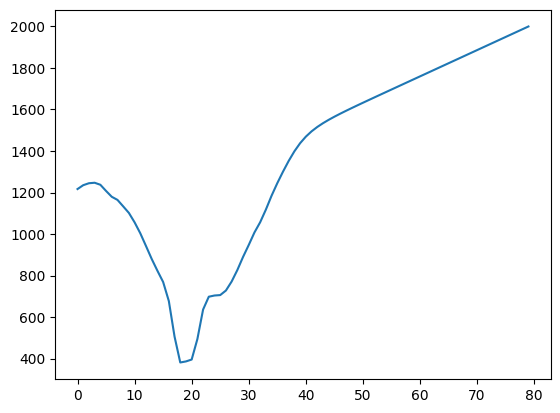

13 13
3 57.80335973454504


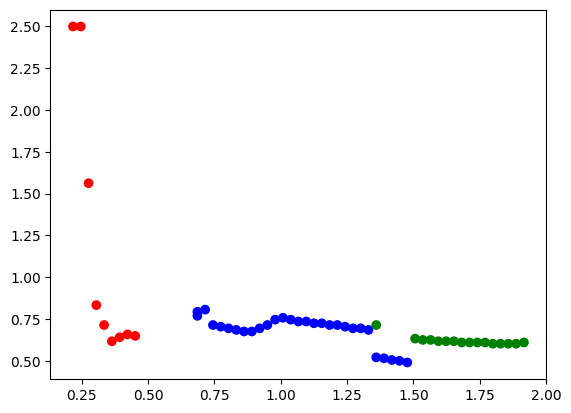

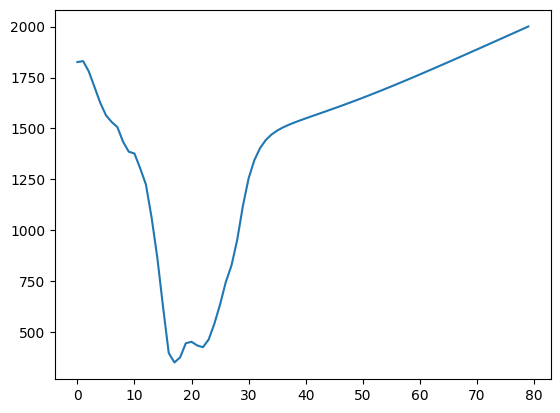

14 14
3 36.40186722372917


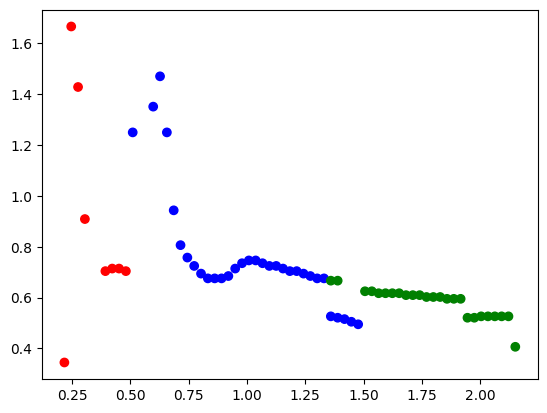

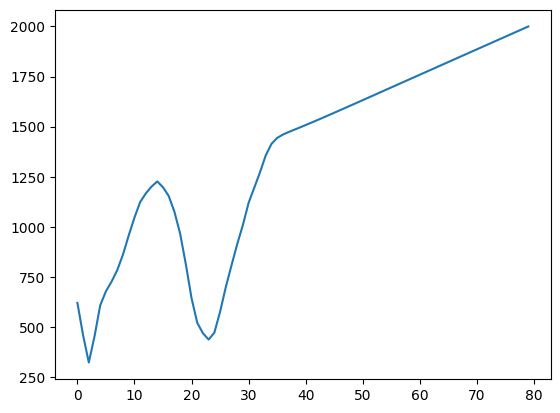

15 15
3 21.717588659171177


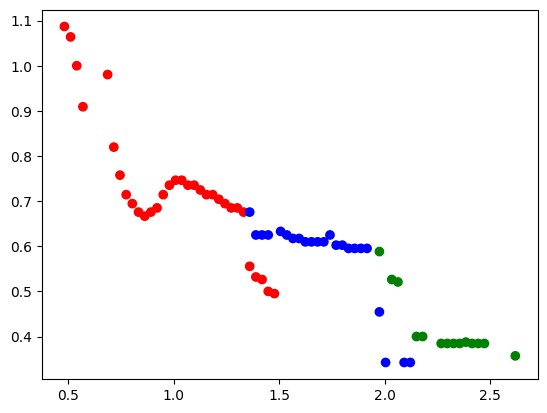

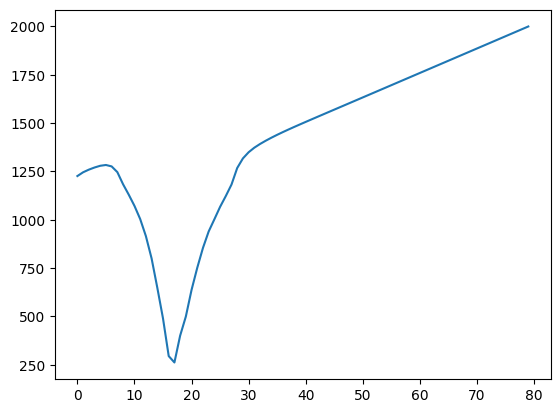

16 16
3 34.22184580949077


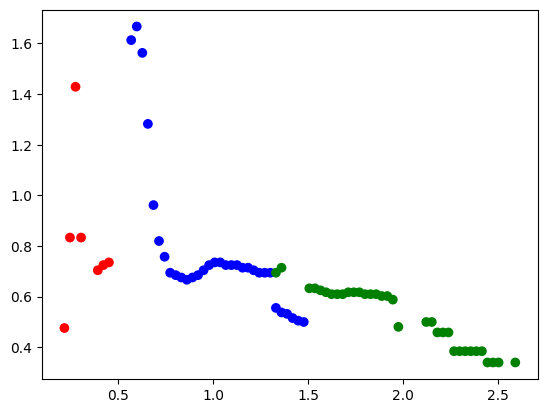

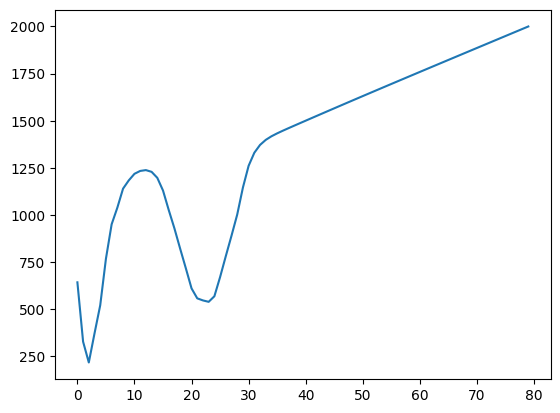

17 17
3 21.12505316506173


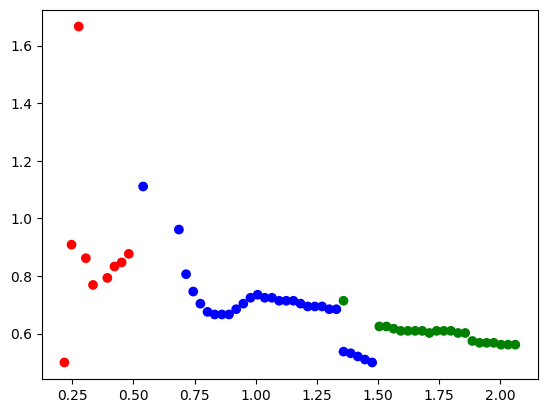

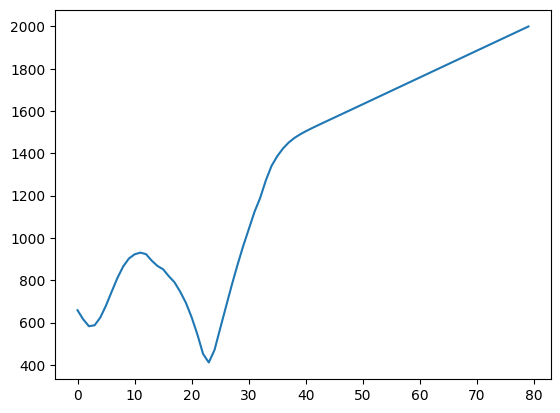

18 18
3 15.886254208806507


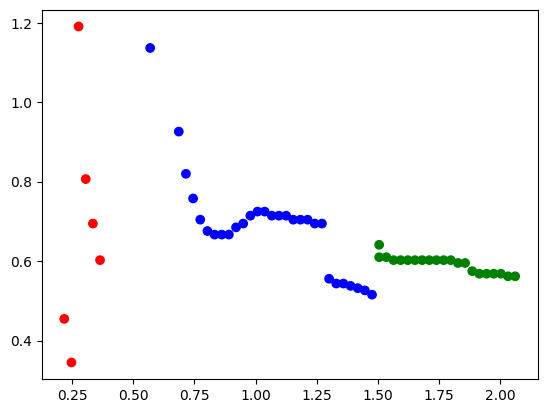

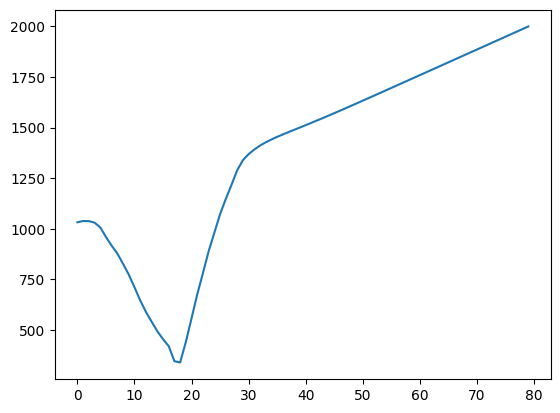

19 19
3 51.33854272391231


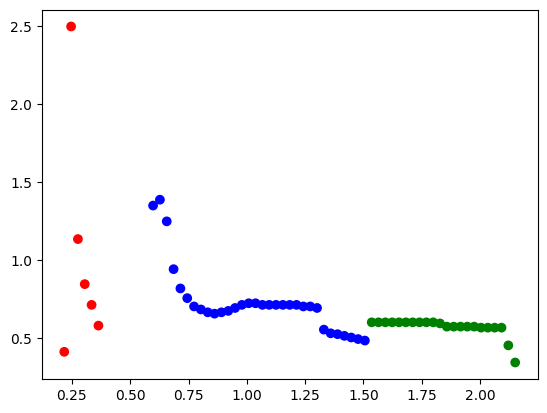

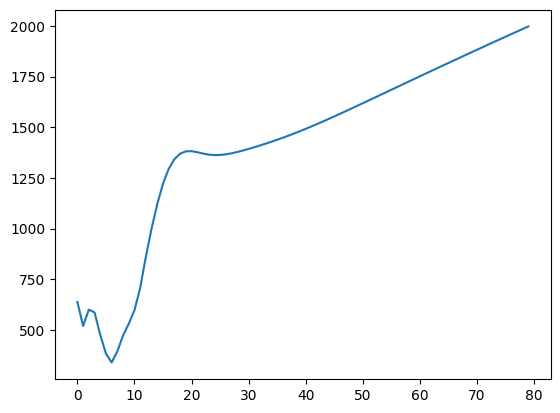

20 20
3 26.08371359916558


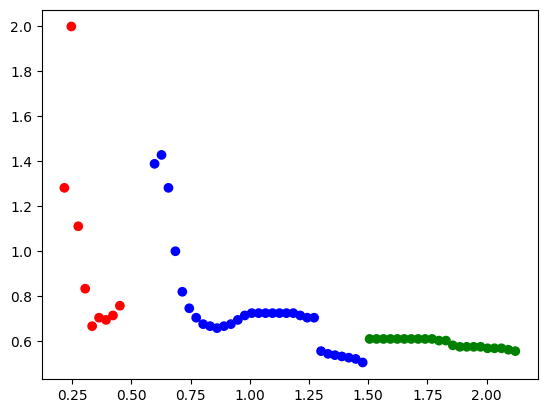

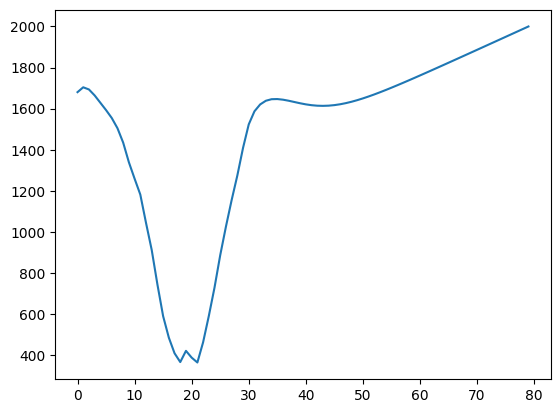

21 21
3 65.67745949149342


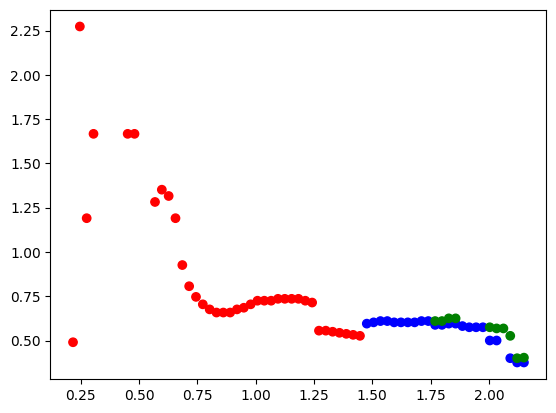

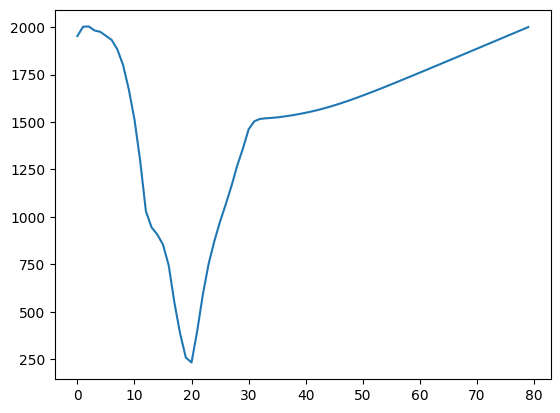

22 22
3 17.423591646143947


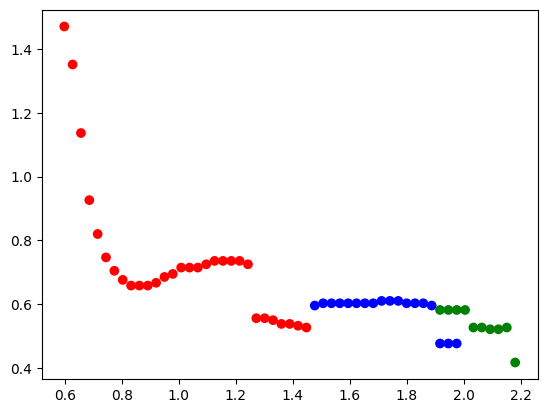

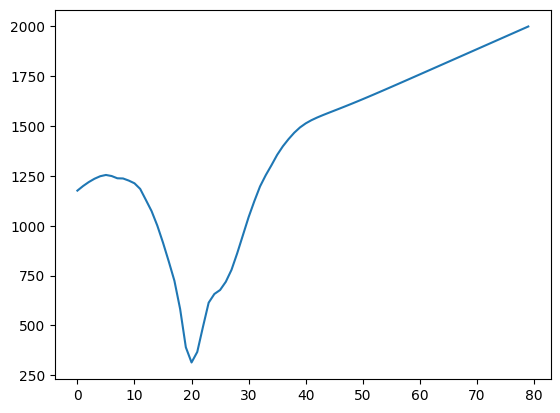

23 23
3 25.627831748371868


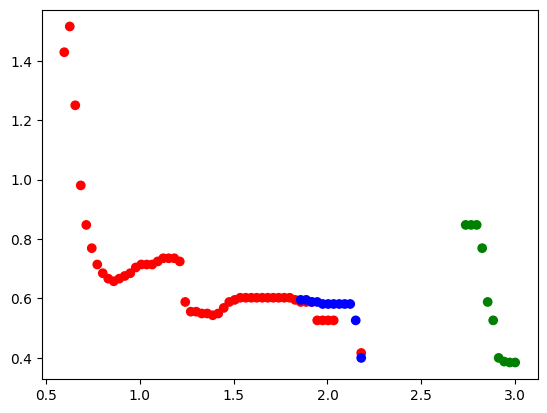

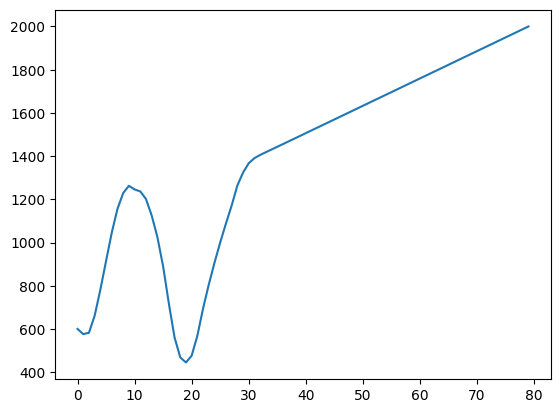

24 24
3 13.460219938583927


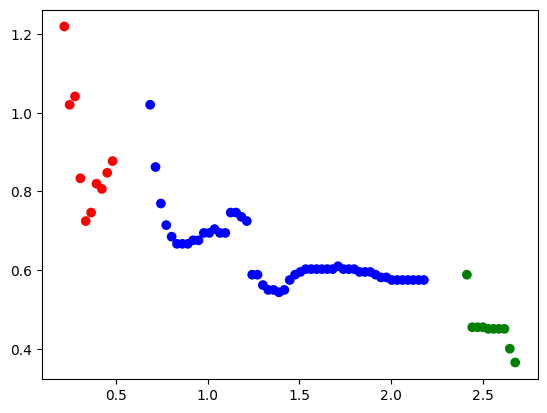

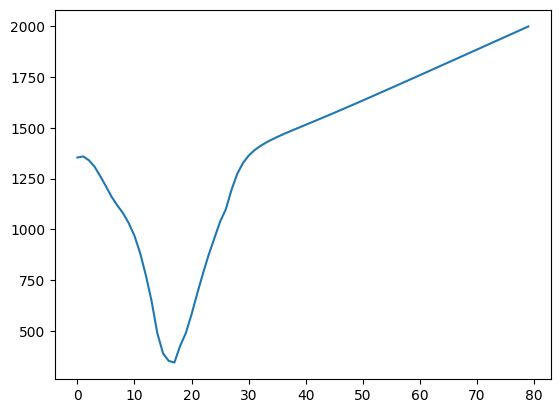

25 25
3 36.02692023762277


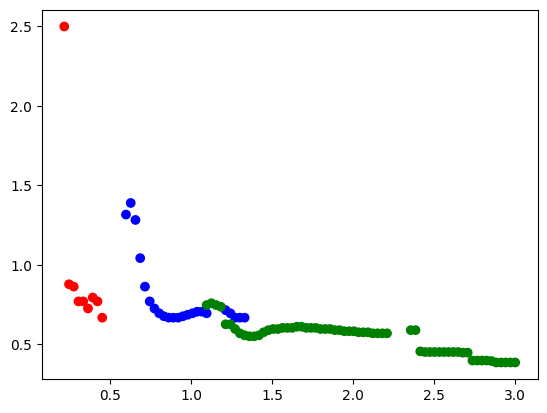

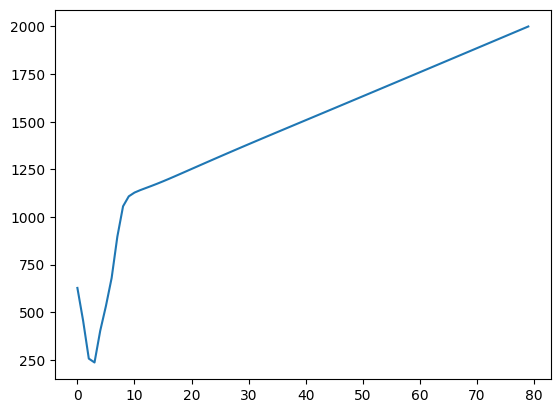

26 26
3 25.75489205899624


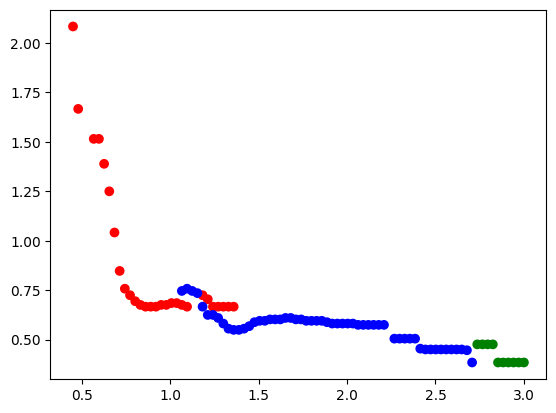

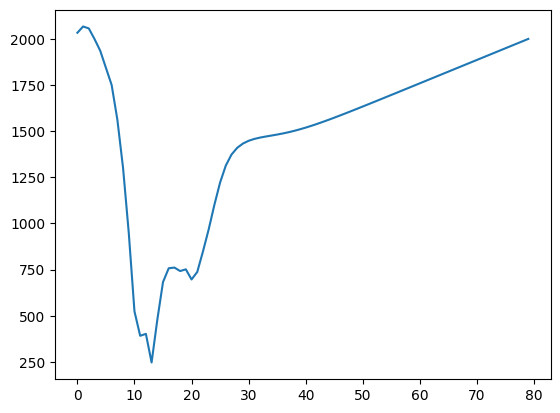

27 27
3 17.711271929230605


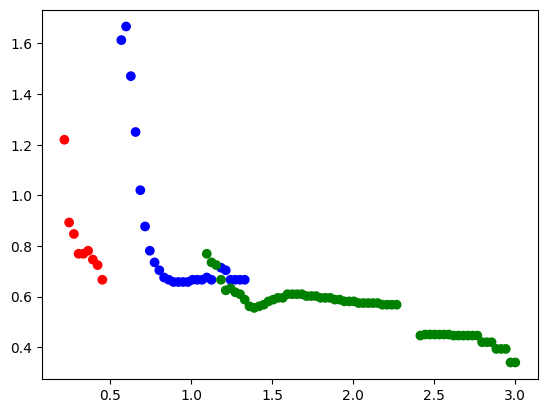

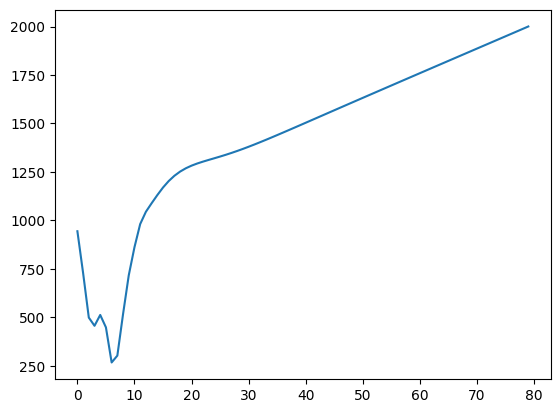

28 28
3 17.488843319631027


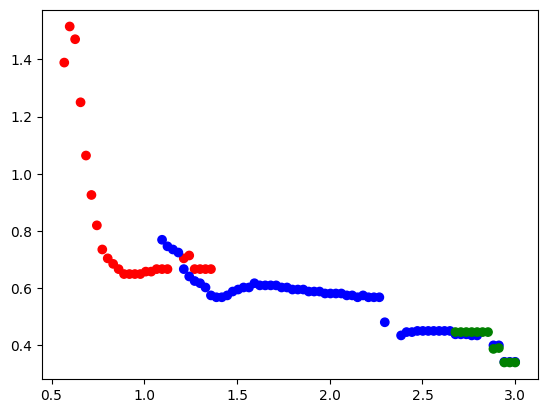

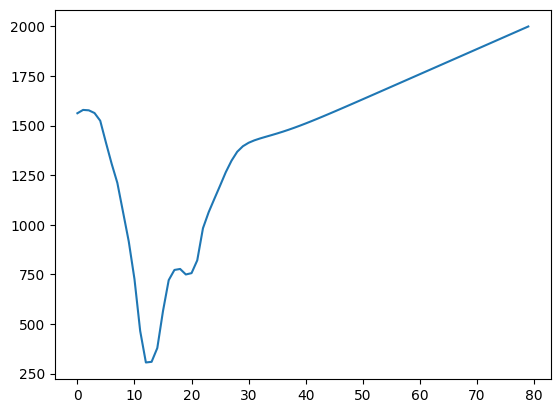

29 29
2 13.707647738317139


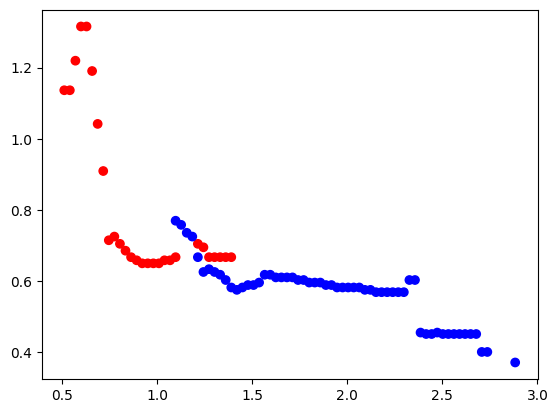

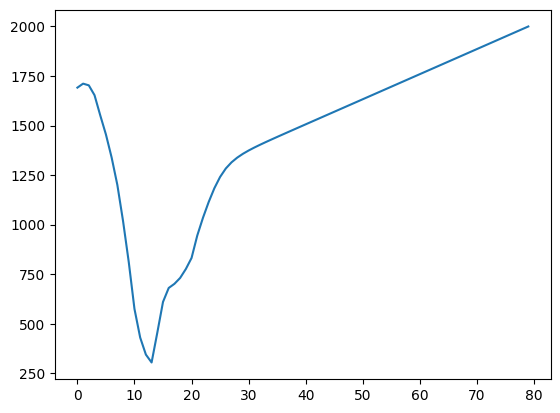

30 30
3 113.62163537575667


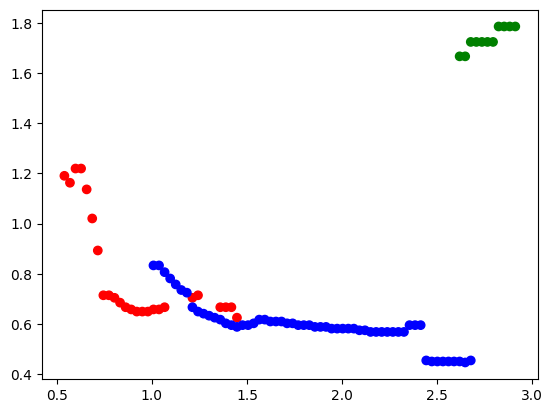

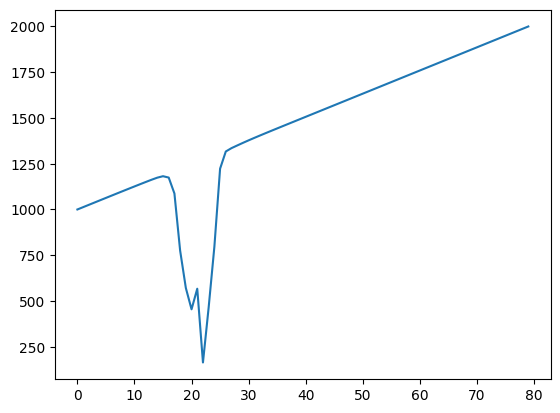

31 31
3 48.461633936999654


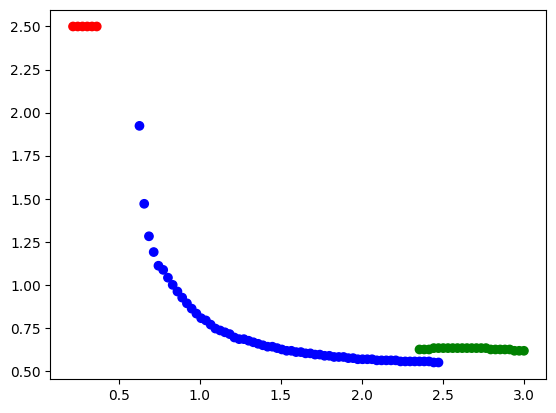

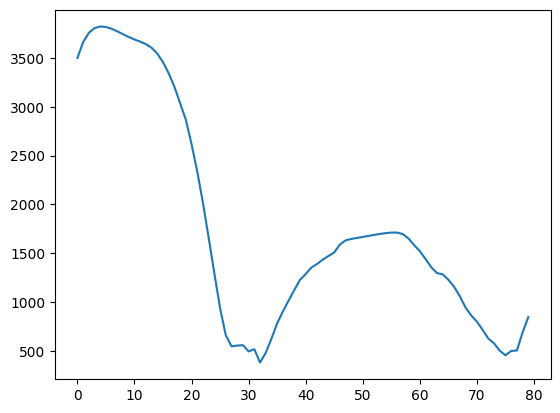

32 32
2 31.786217708513202


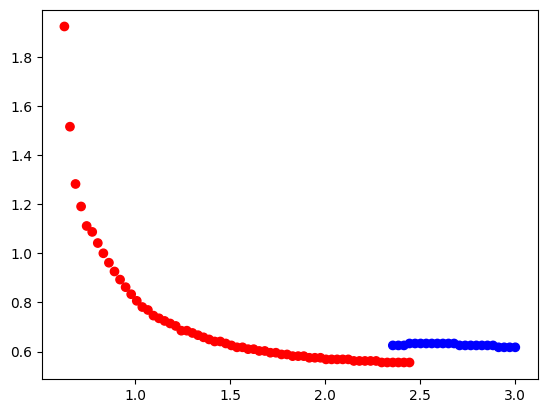

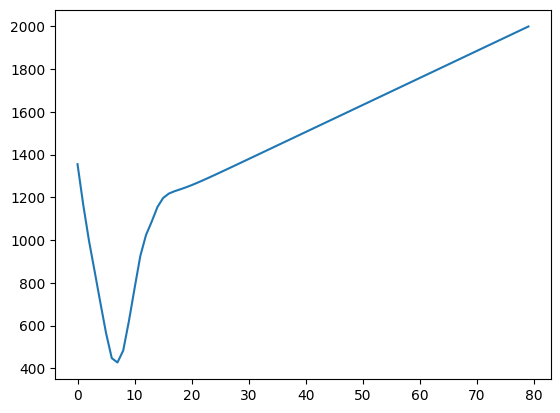

33 33
3 140.05725681998982


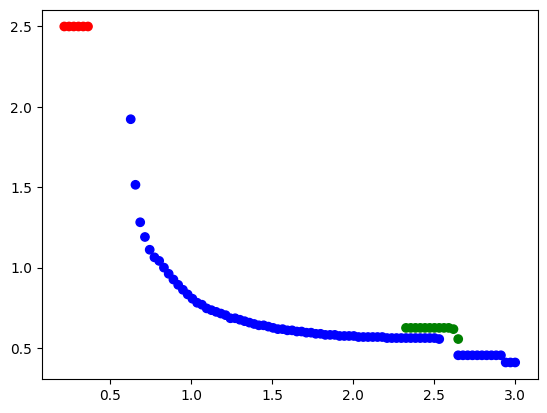

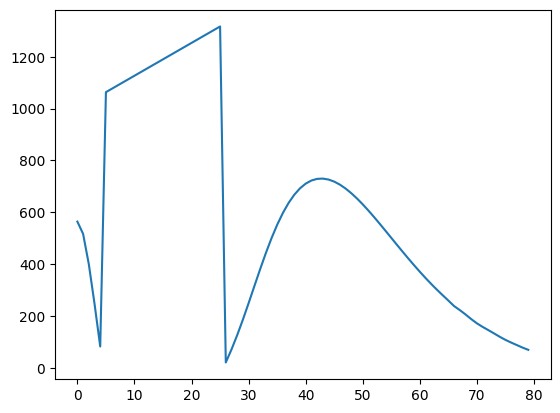

34 34
3 77.25921936381116


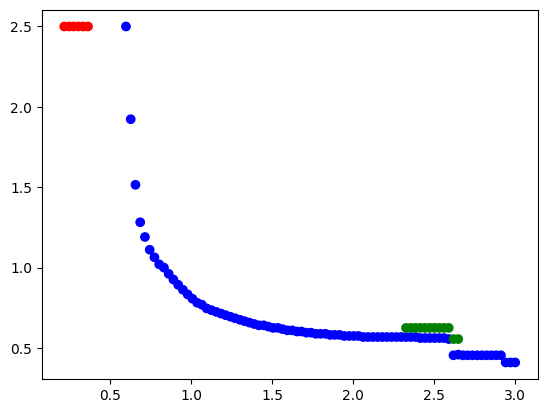

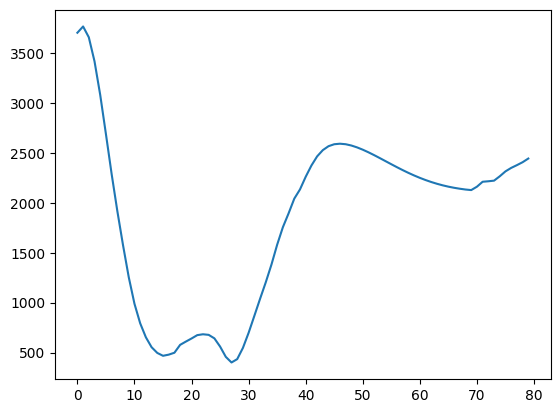

35 35
3 23.899284183389813


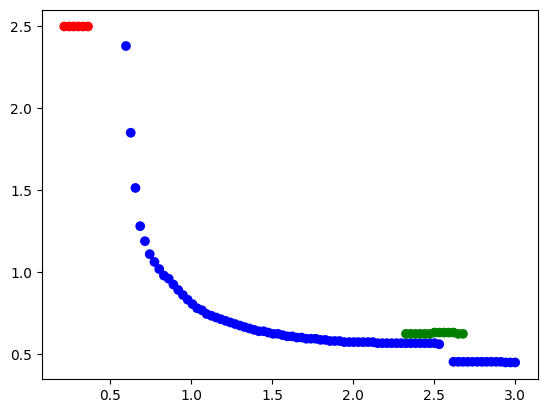

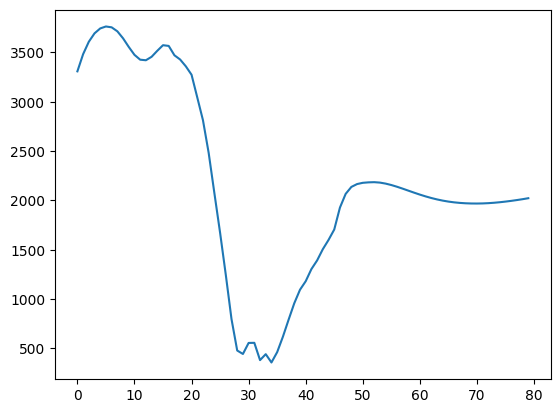

36 36
3 23.457924353581674


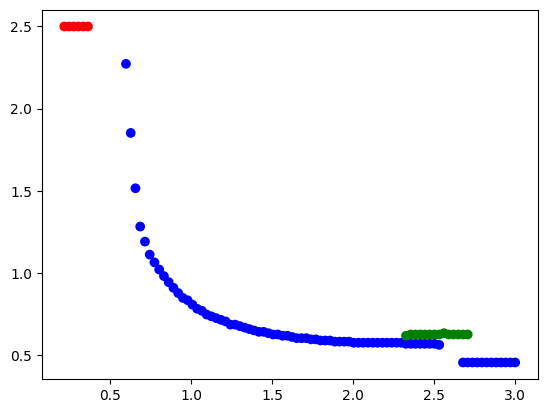

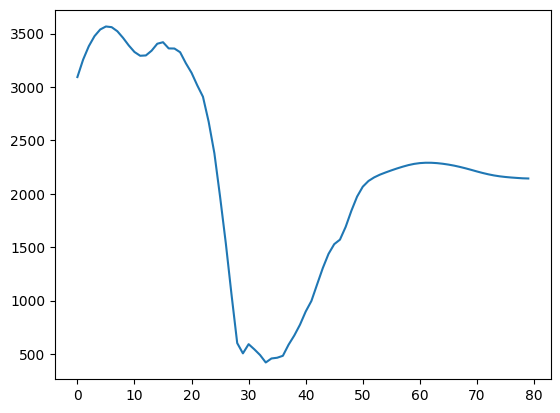

37 37
3 46.337020881995436


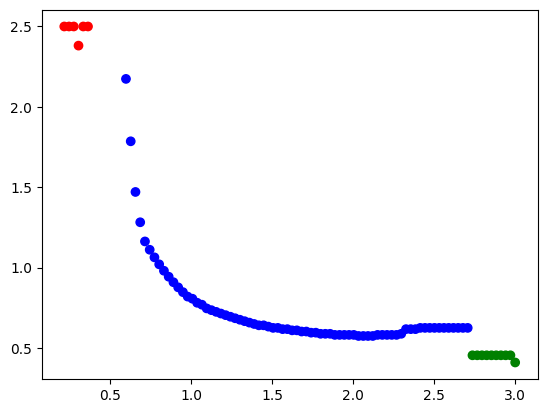

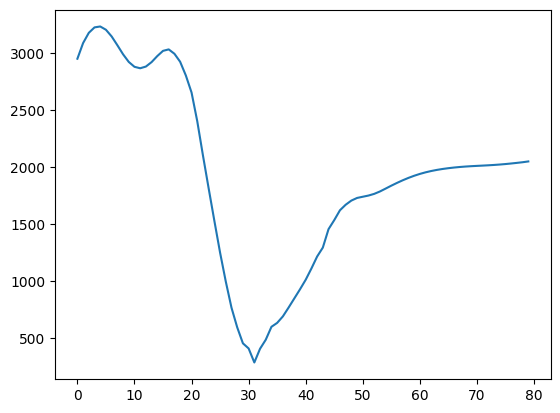

38 38
1 8.4678044896068


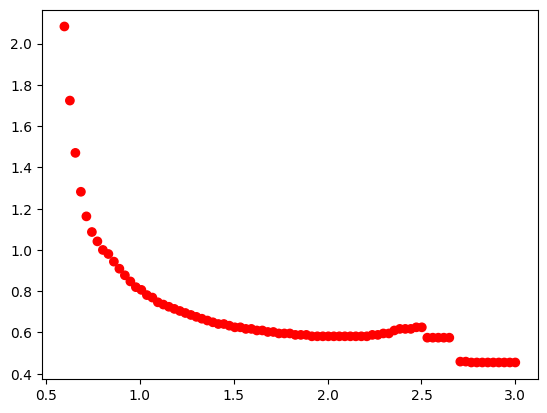

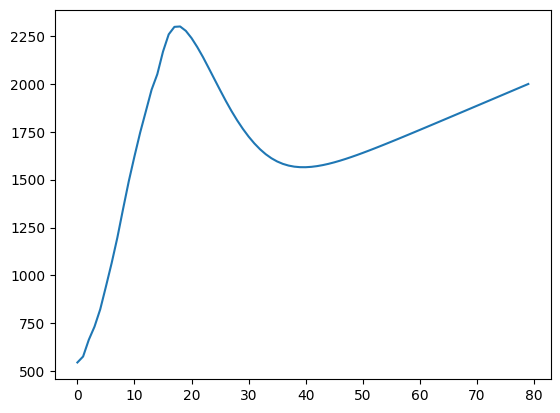

39 39
2 40.06346282229384


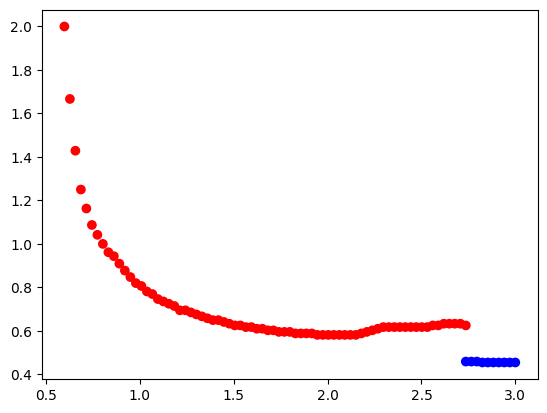

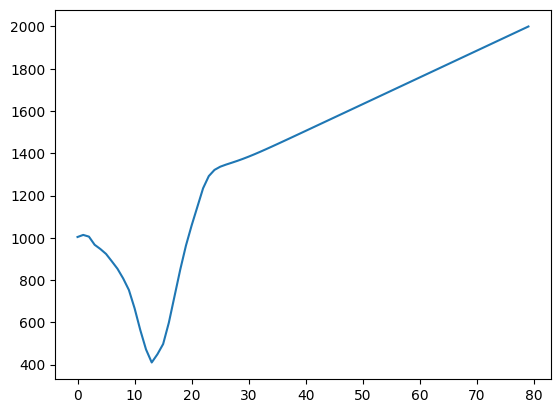

40 40
1 9.076417957398485


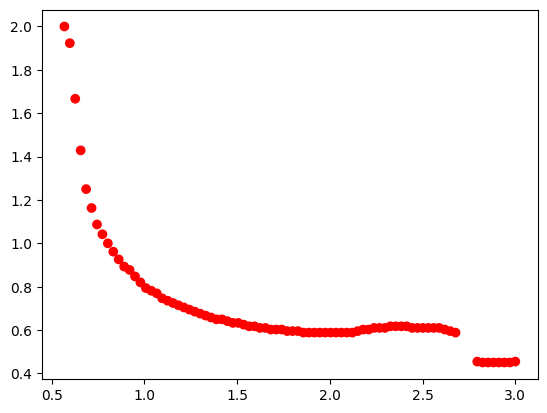

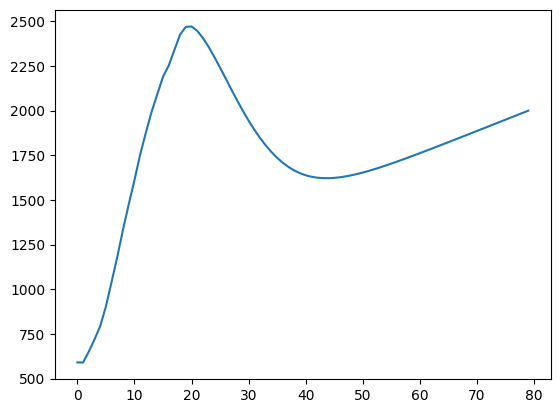

41 41
1 4.491055396069481


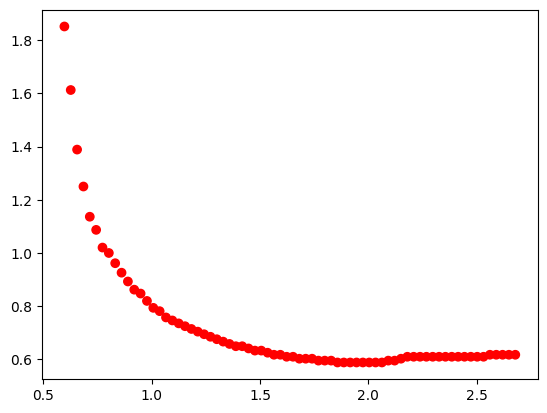

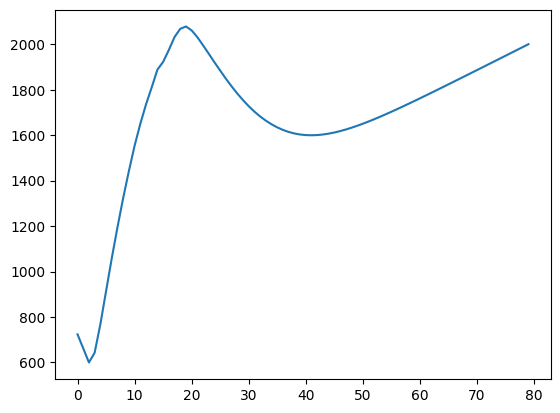

42 42
1 3.5513440006389225


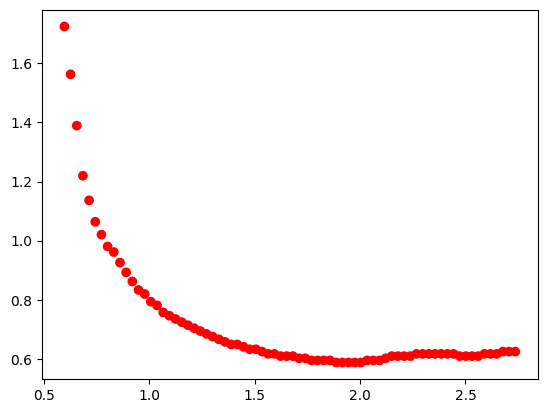

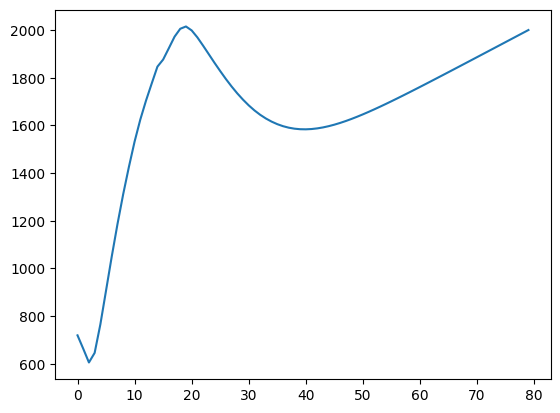

43 43
1 4.715681216863741


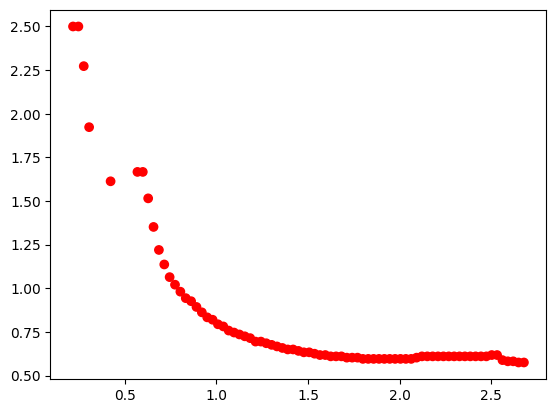

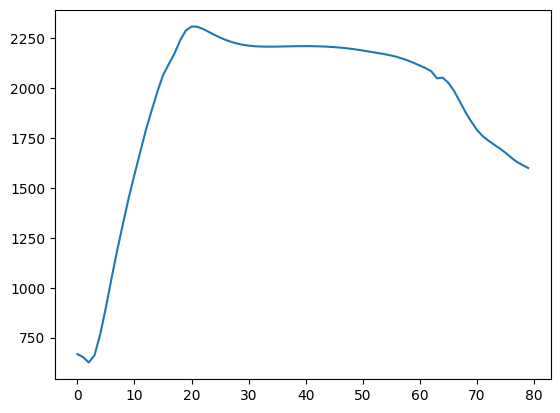

44 44
1 5.978975998325171


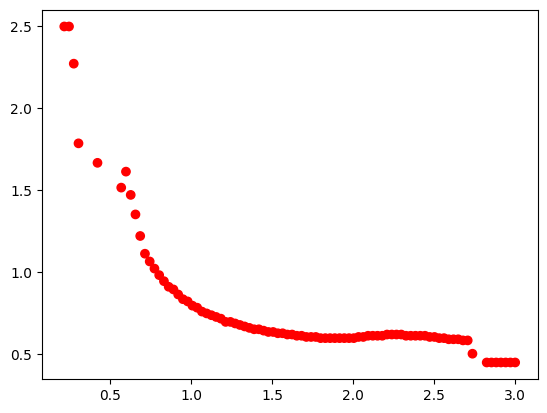

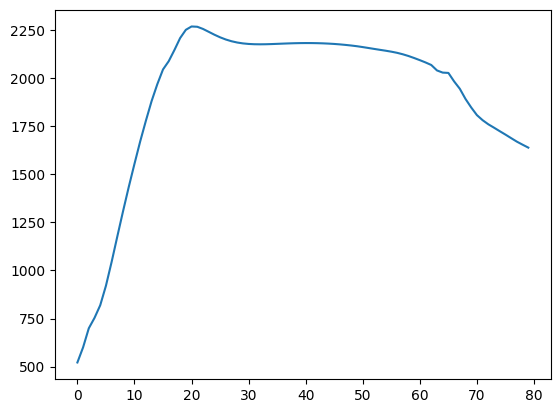

45 45
1 6.431435048843471


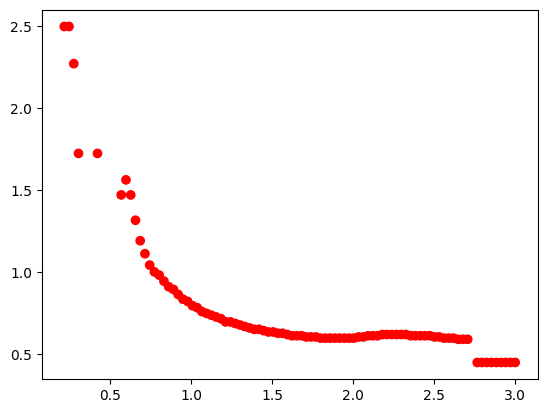

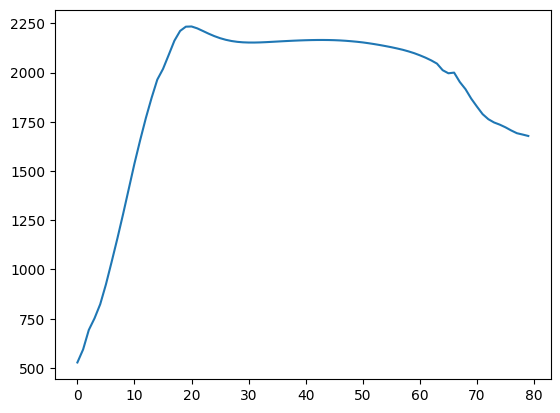

46 46
1 6.475016783210843


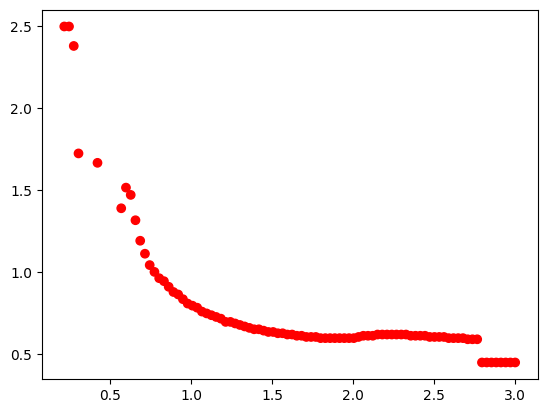

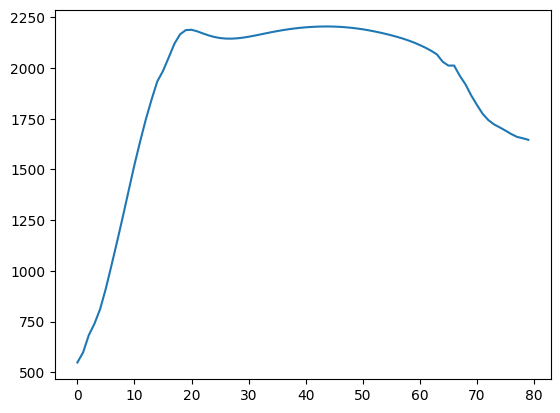

47 47
1 5.883649856925946


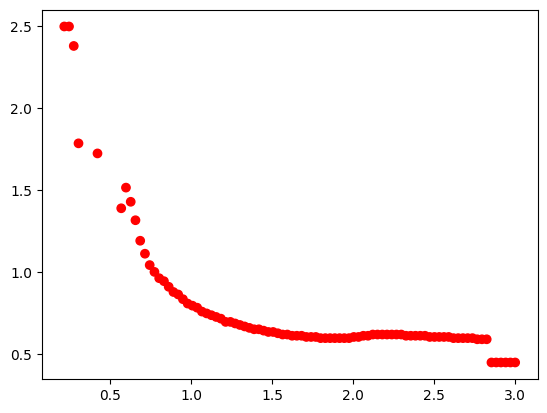

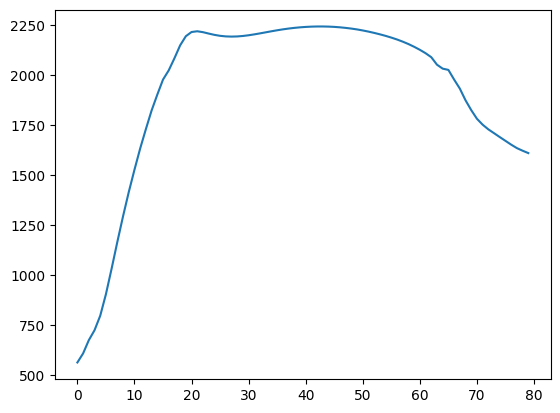

48 48
1 3.9722983598741157


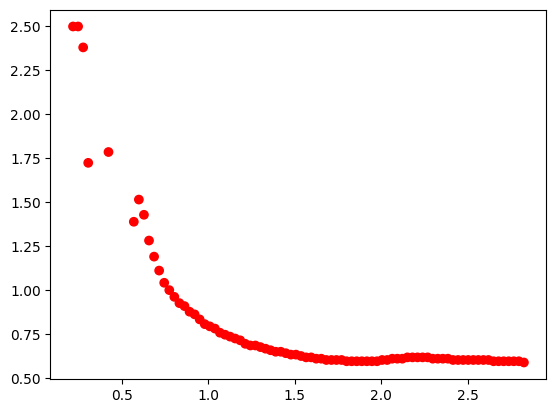

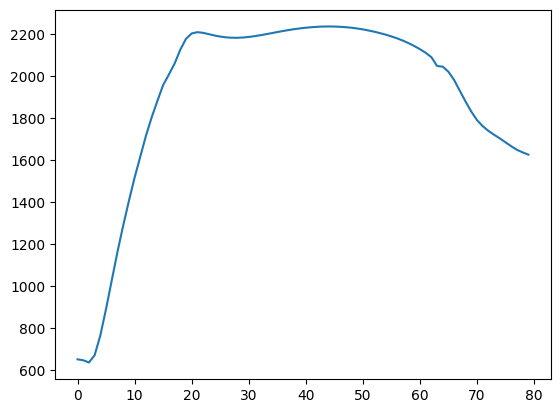

49 49
2 16.991590183981206


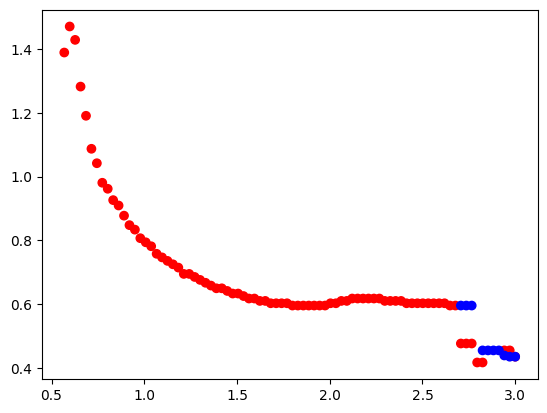

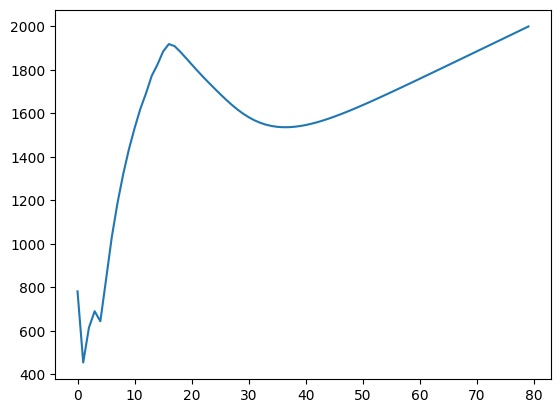

50 50
1 5.043394875453658


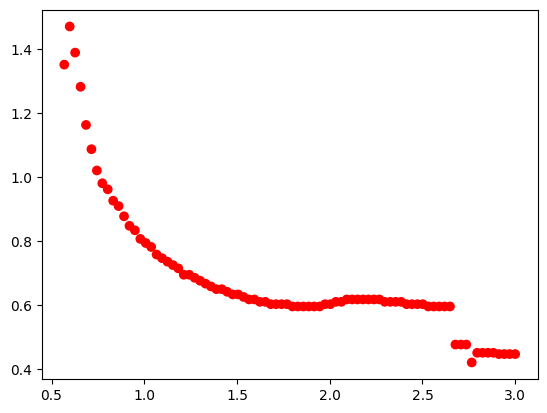

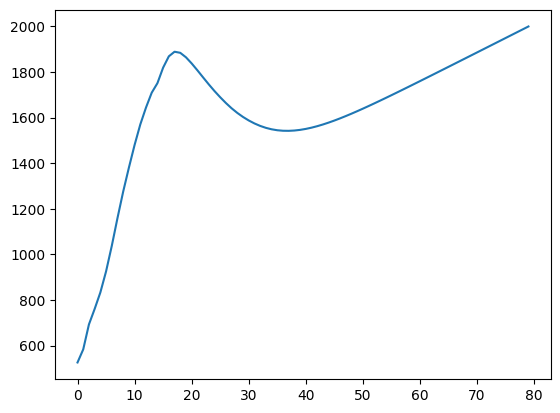

51 51
1 3.931194724877429


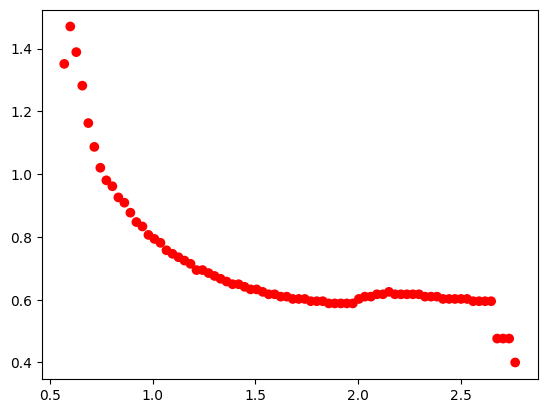

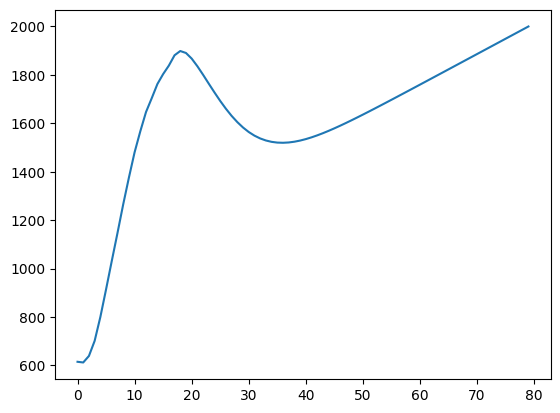

52 52
1 4.892323562762952


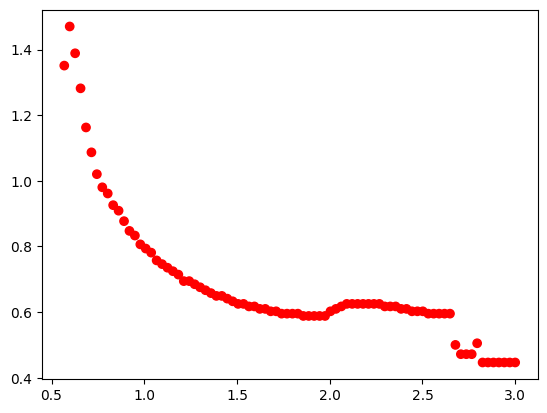

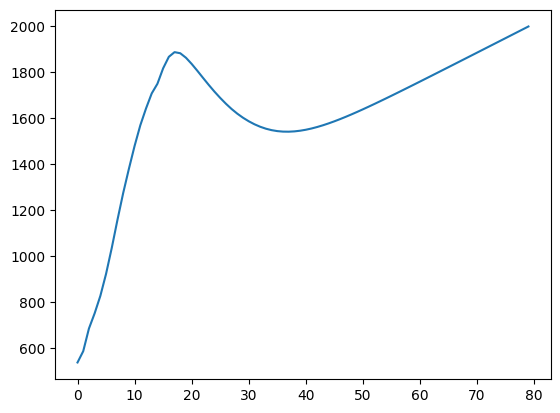

53 53
2 40.82603218426228


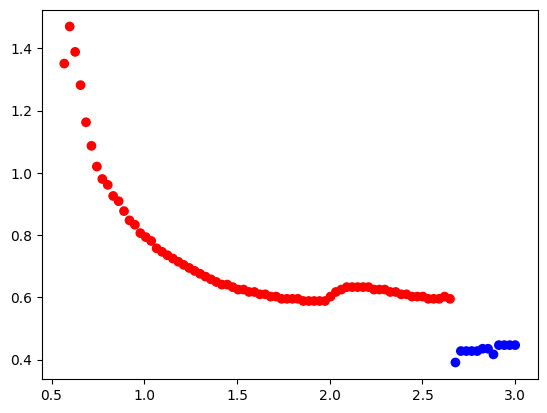

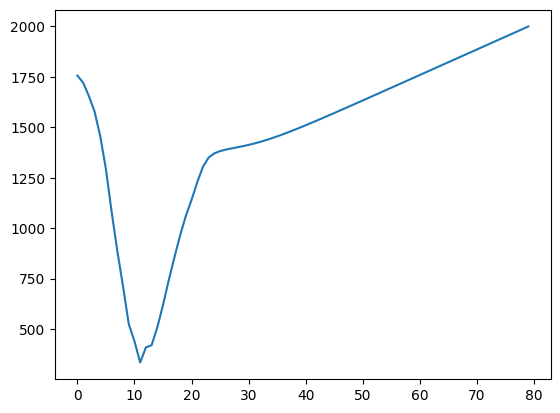

54 54
1 2.579411991358199


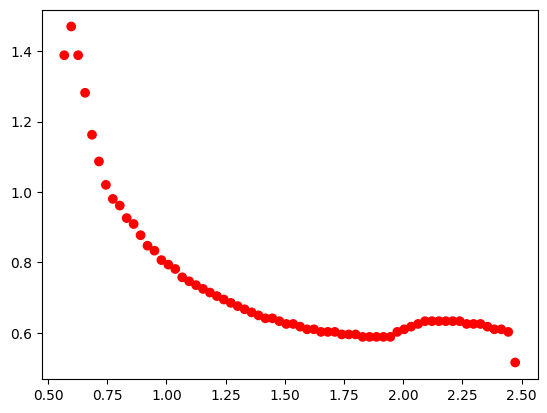

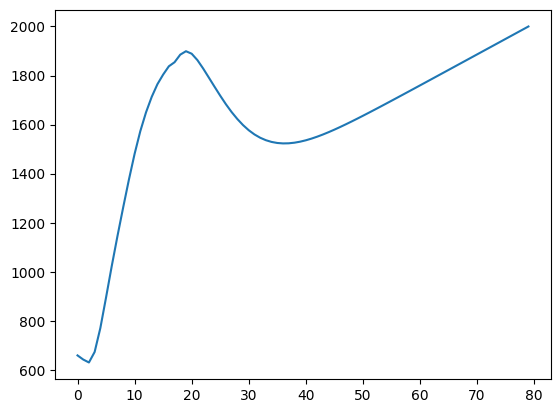

55 55
3 21.940129841585204


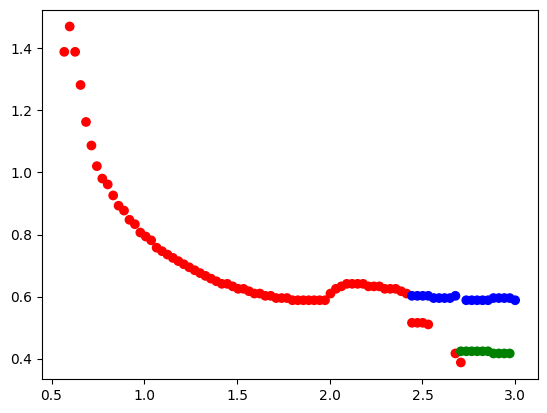

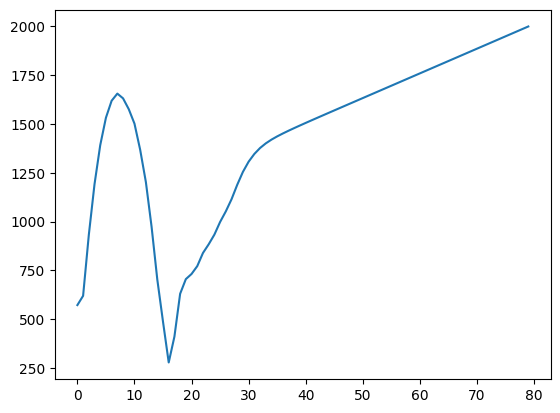

56 56
3 16.31126259505714


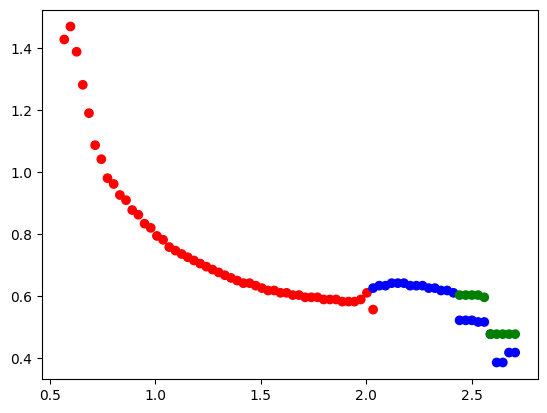

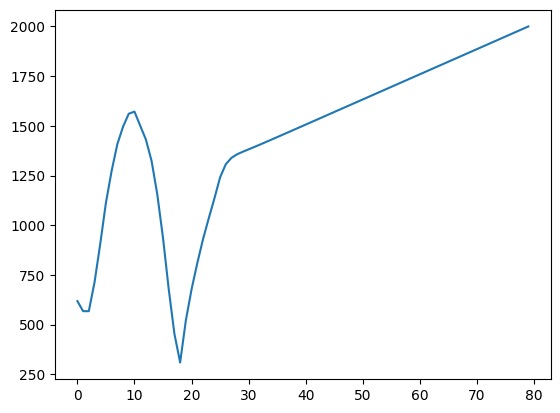

57 57
2 18.92253960167168


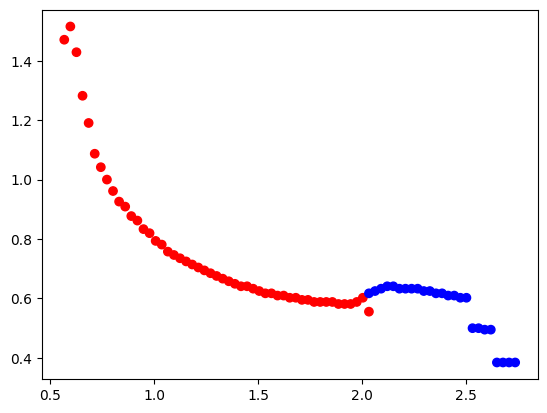

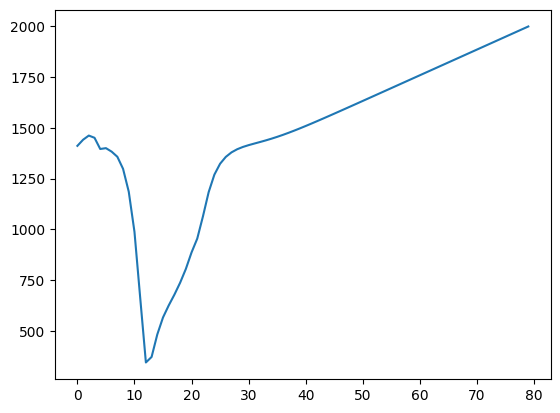

58 58
3 10.84863468181679


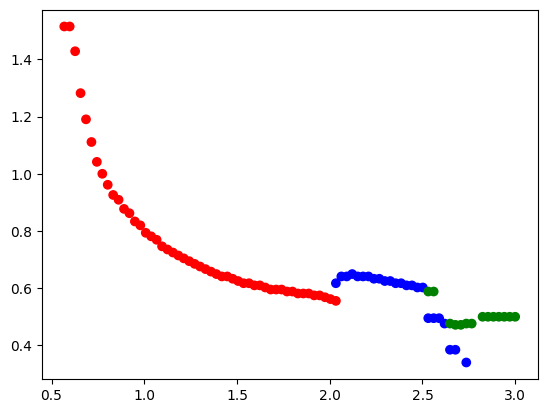

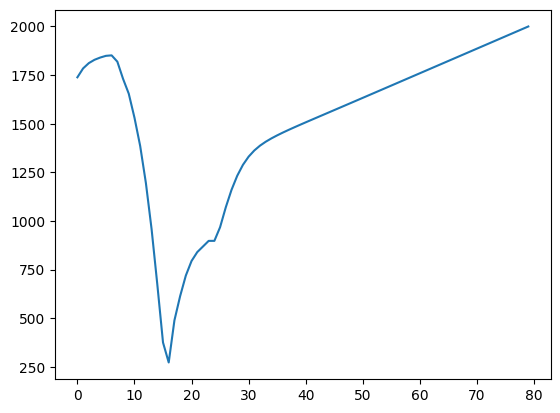

59 59
3 5.902153436982601


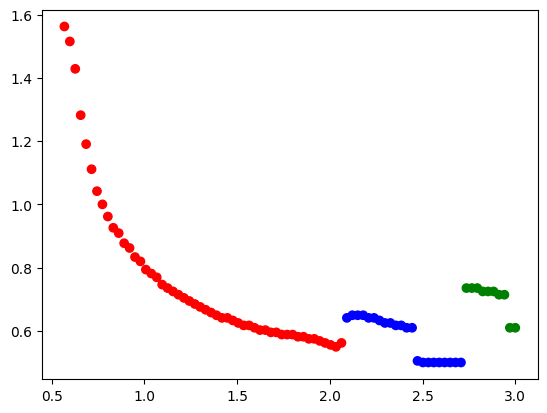

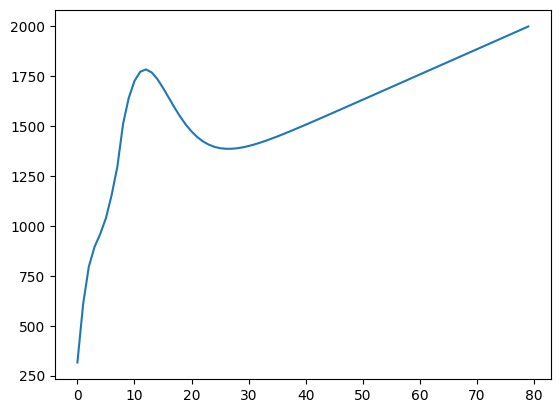

60 60
3 32.04707656163335


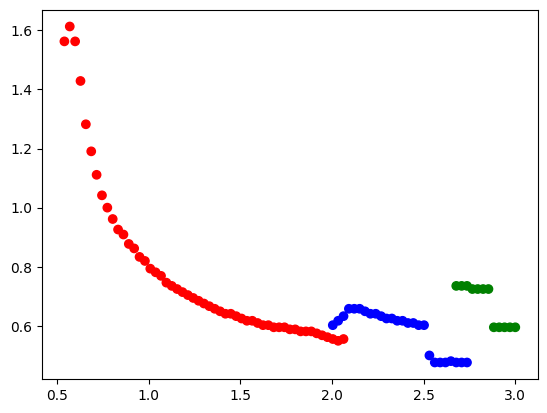

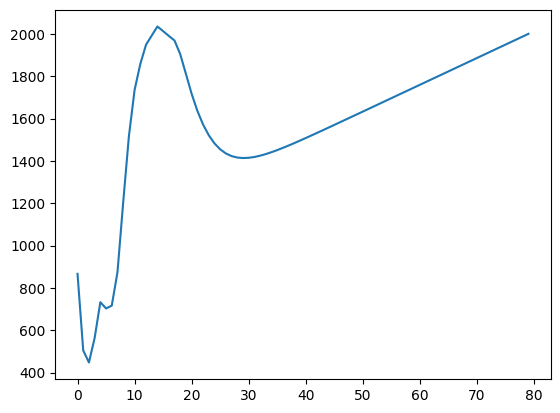

61 61
3 66.48396643424002


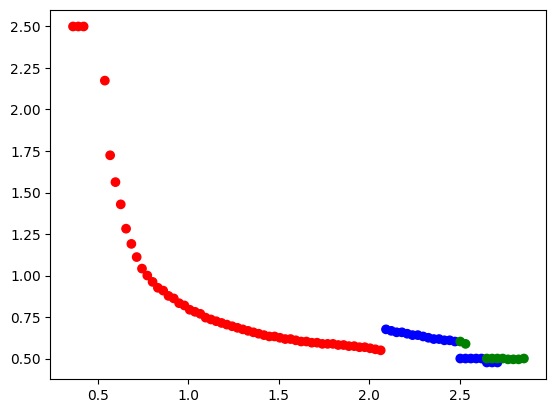

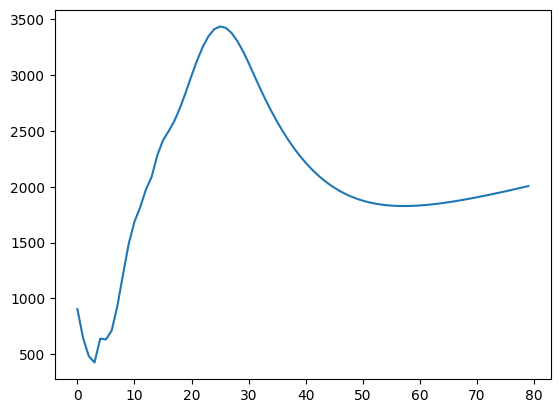

62 62
3 151.7234213906902


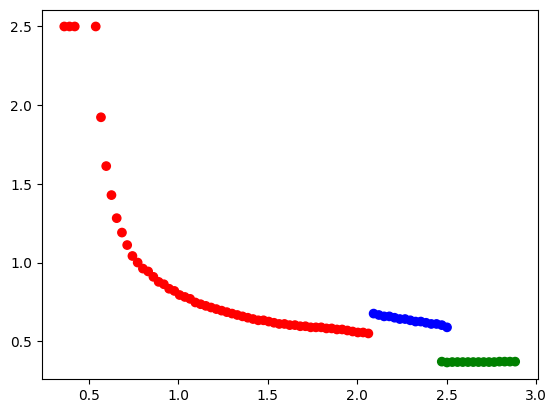

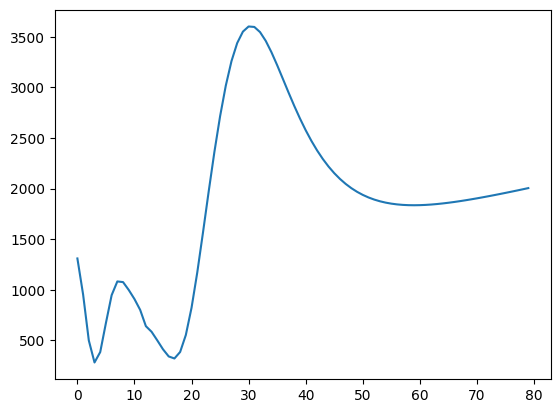

63 63
3 75.20362851801278


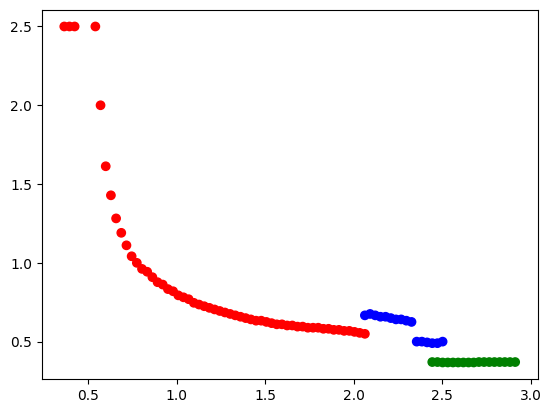

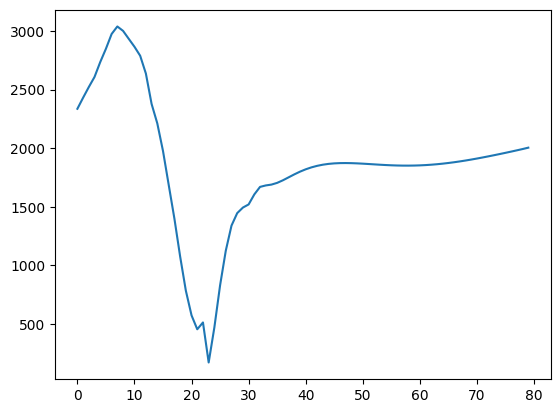

64 64
2 88.73442899477166


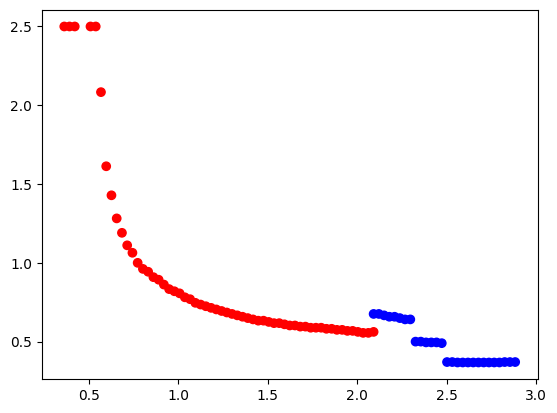

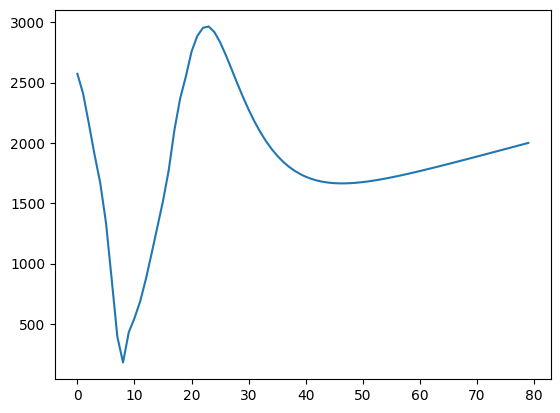

65 65
2 80.89872891532023


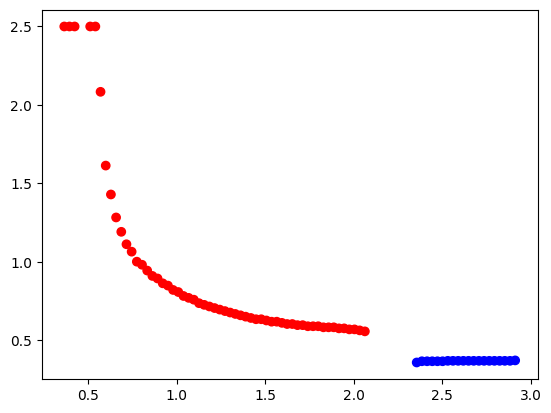

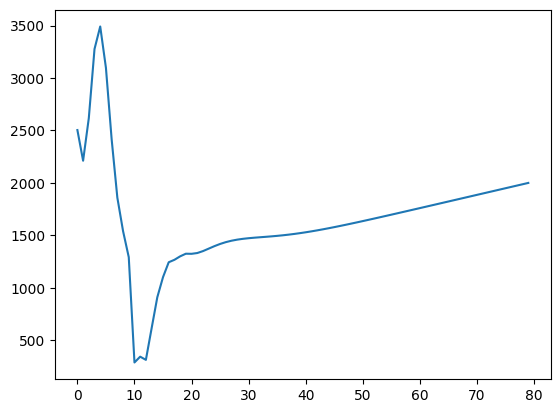

66 66
2 101.13562857622755


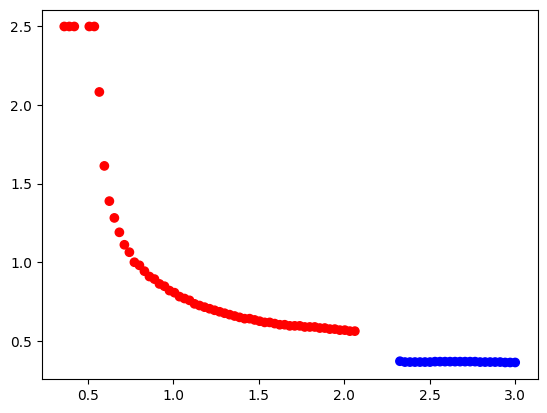

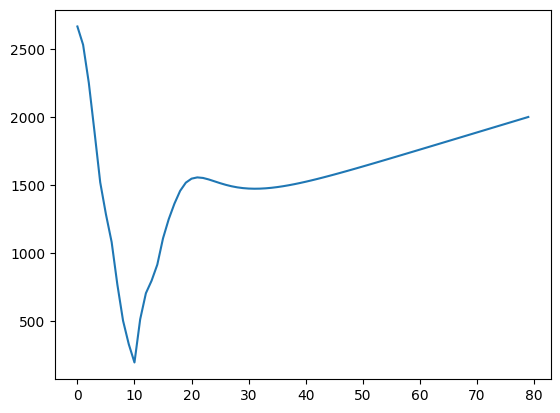

67 67
2 119.59910314056253


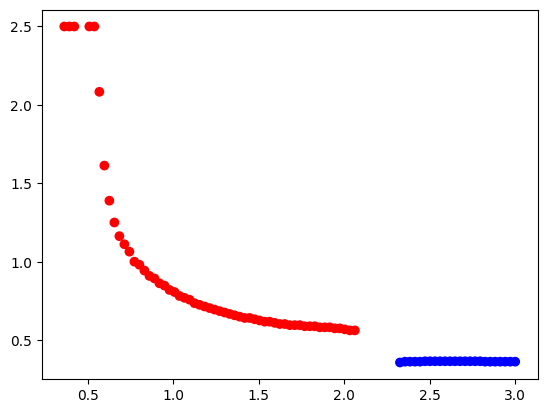

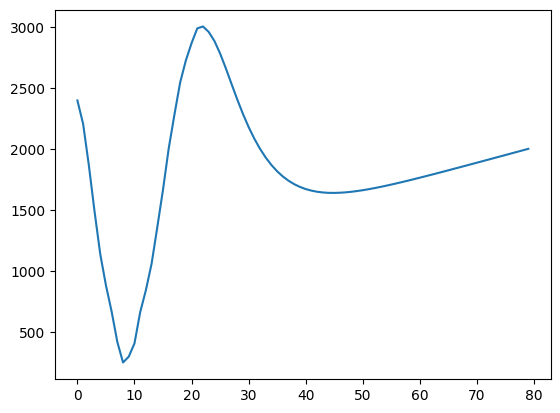

68 68
2 174.5897580282855


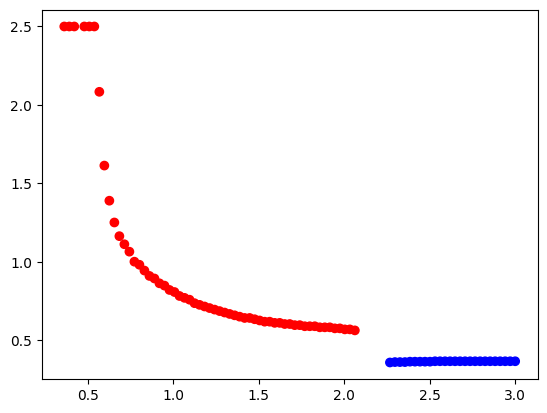

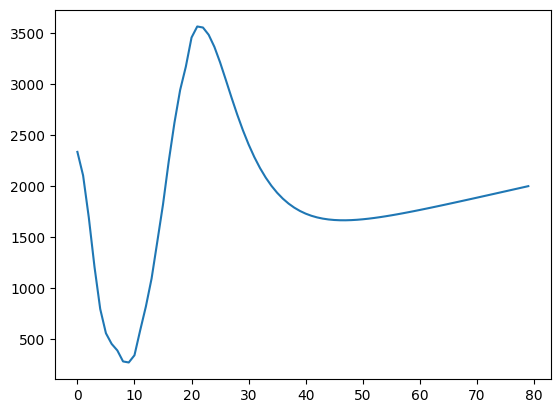

69 69
2 529.0263253498549


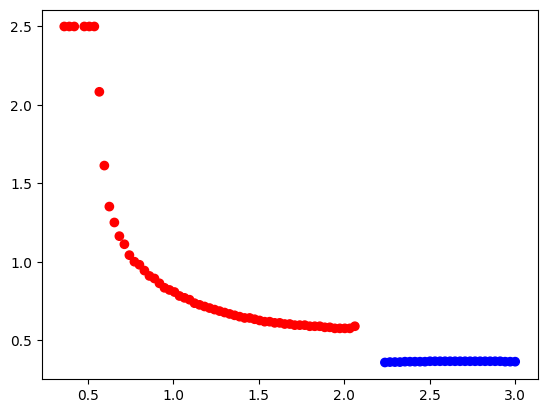

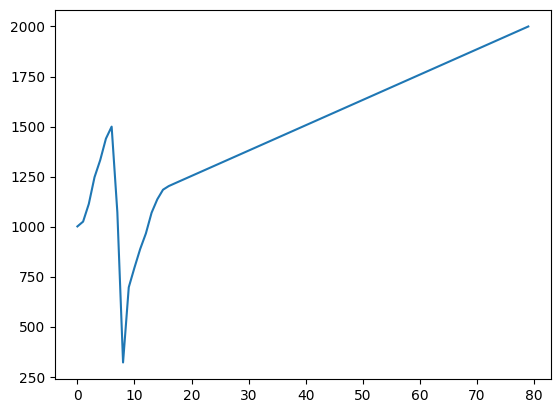

70 70
2 162.78615946053574


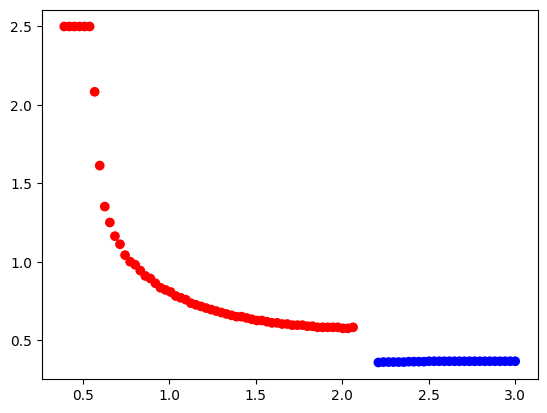

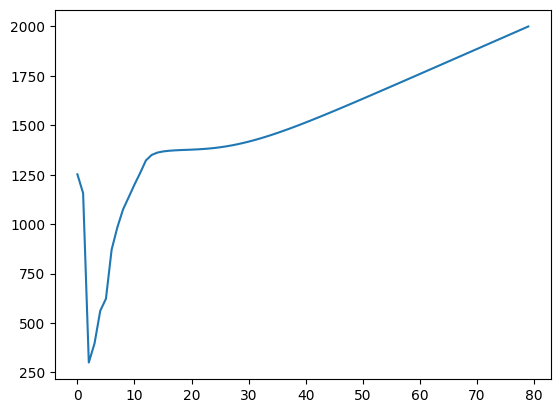

71 71
2 196.42706651715451


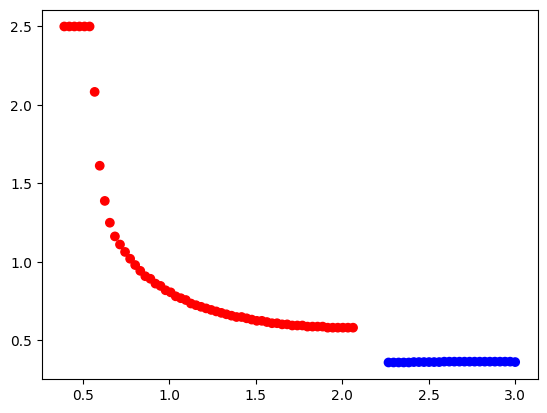

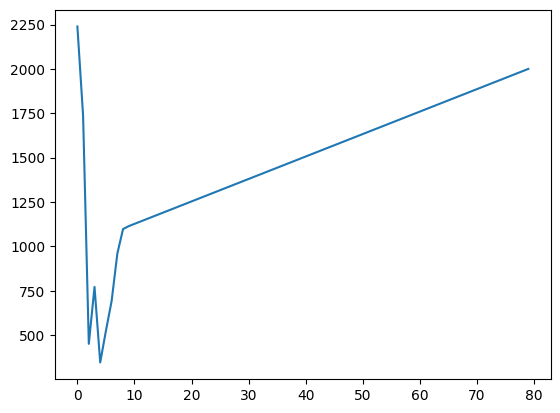

72 72
2 152.2923996257769


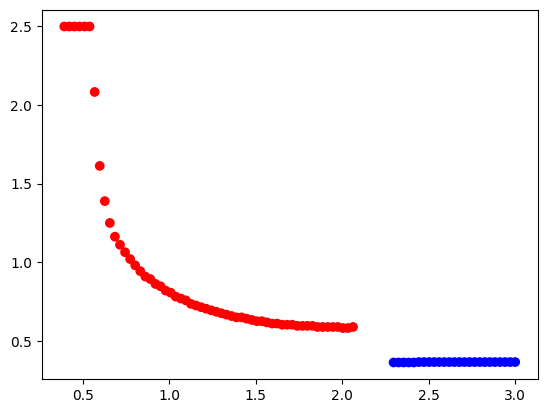

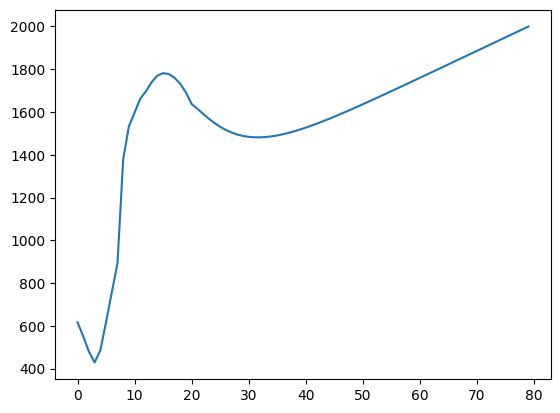

73 73
2 211.2528206020044


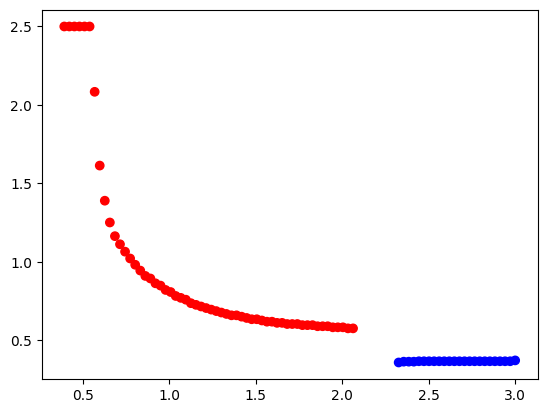

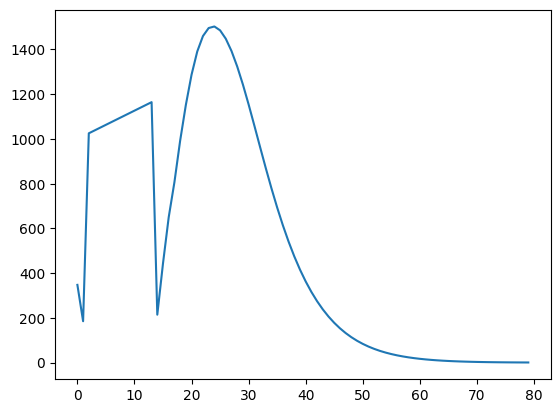

74 74
2 214.40207347715835


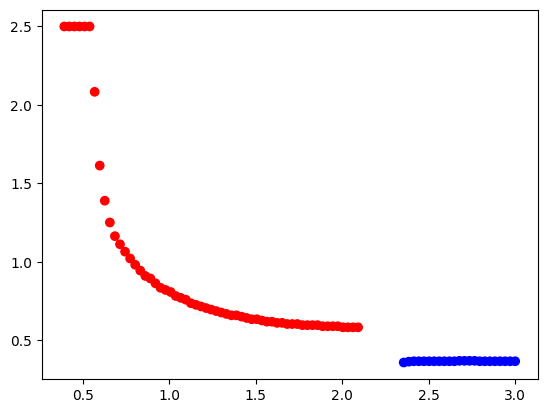

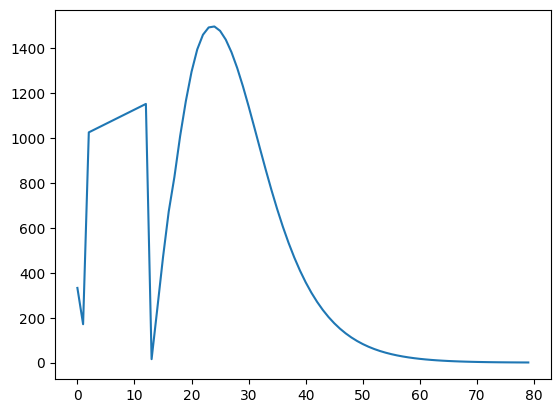

75 75
3 102.83171670712159


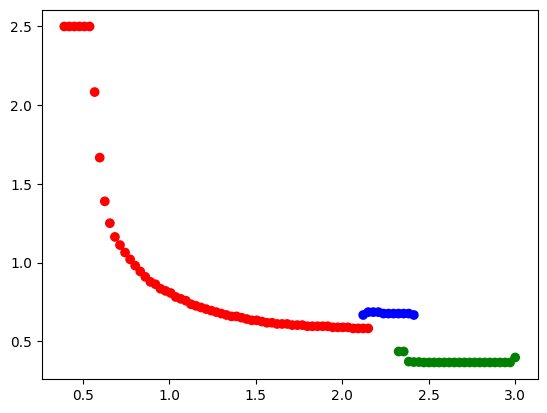

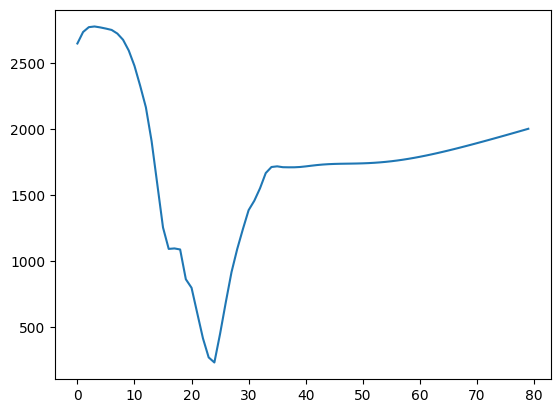

76 76
3 97.51093644109372


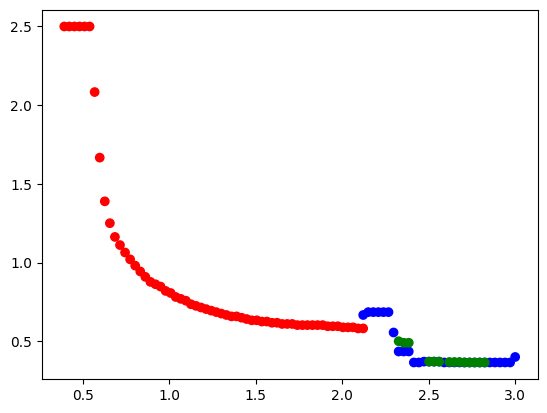

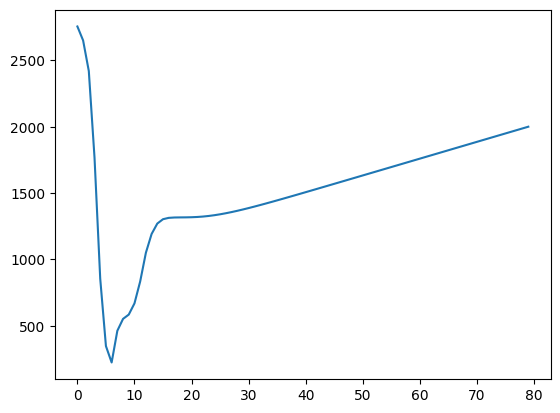

77 77
2 153.35619903866183


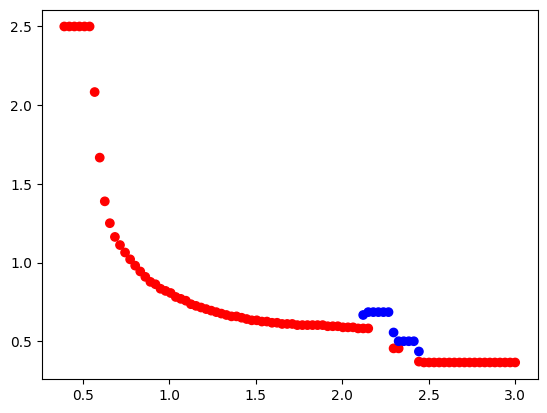

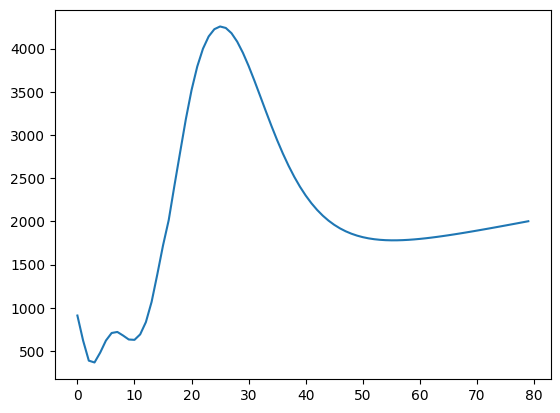

78 78
2 105.06164745918188


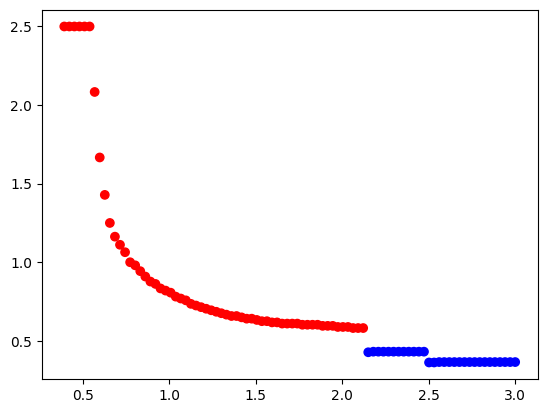

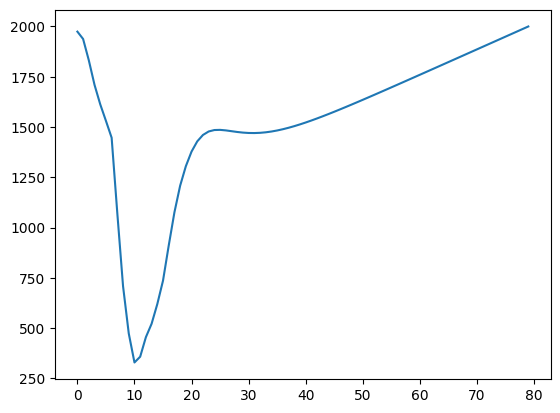

79 79
2 106.17740693424707


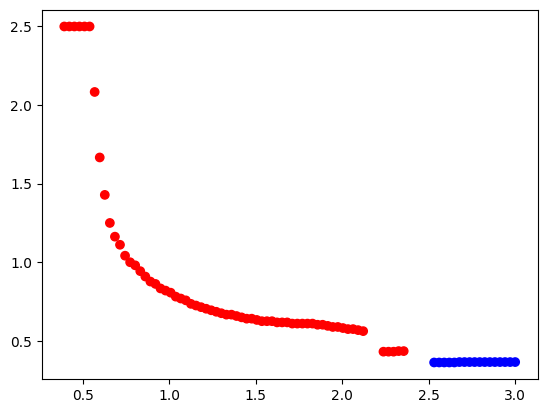

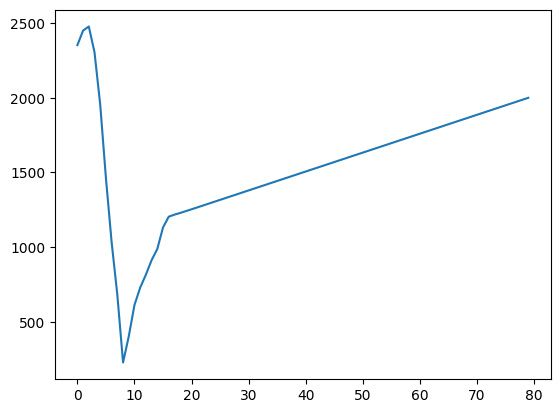

80 80
3 130.30153840848712


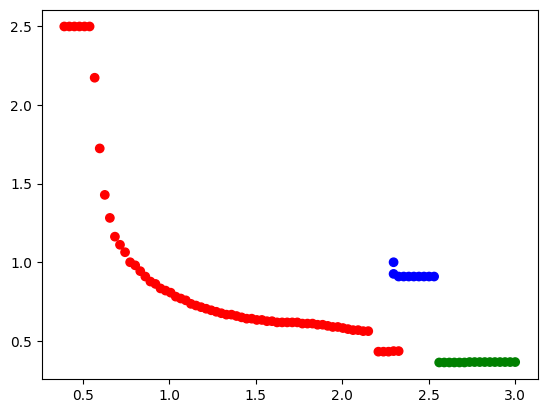

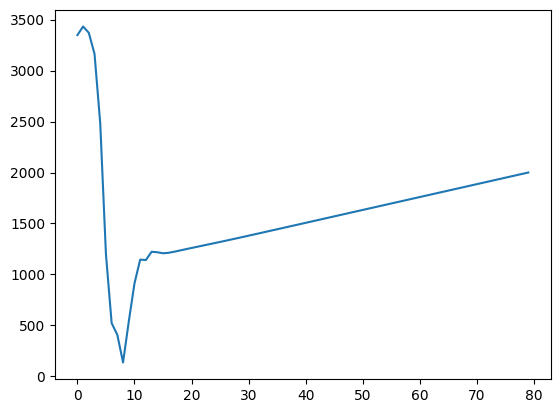

81 81
3 69.24020119564189


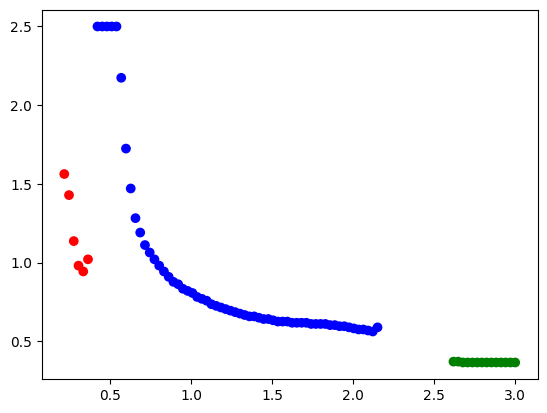

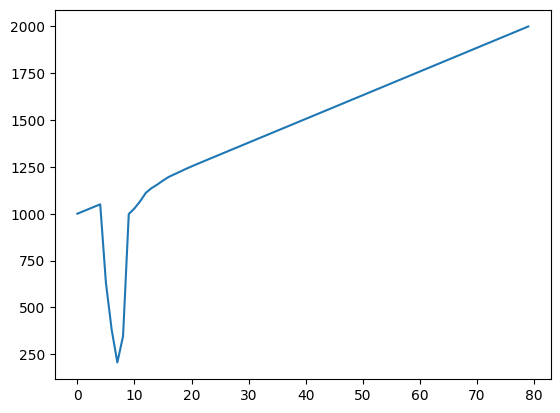

82 82
3 23.29991940487253


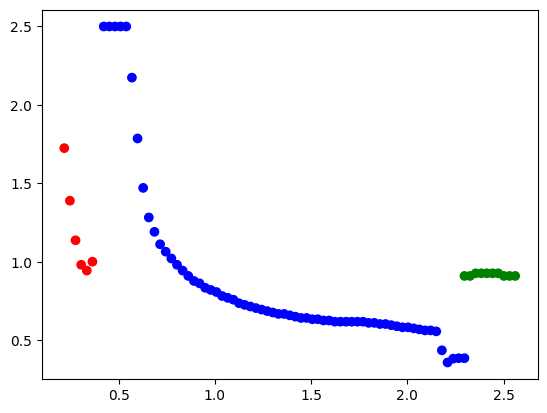

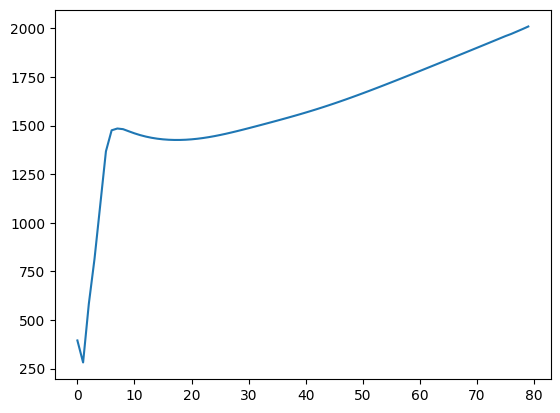

83 83
3 79.4653527045463


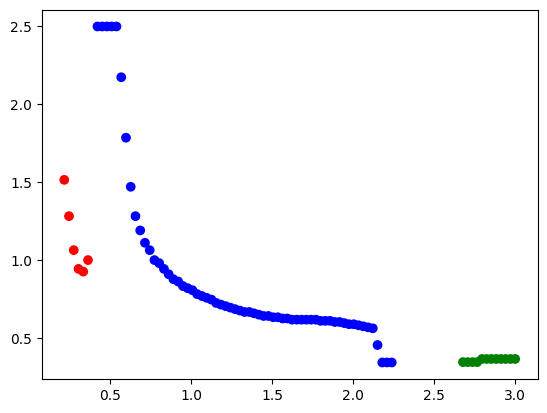

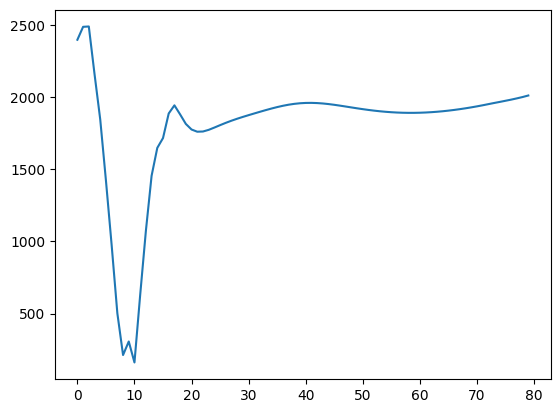

84 84
3 0.0


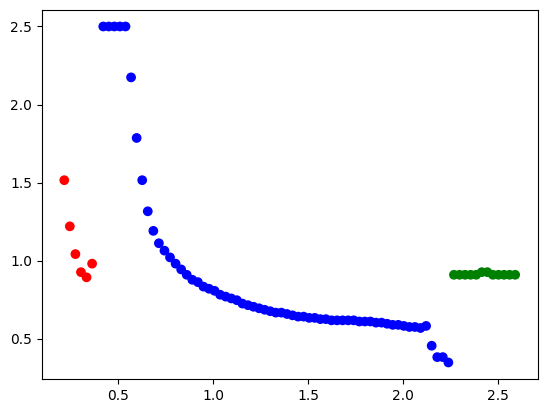

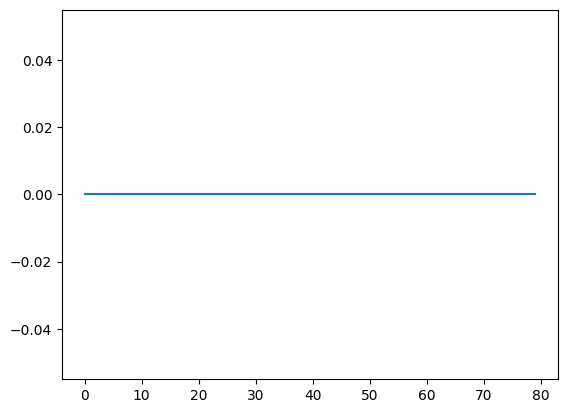

85 85
3 64.37084871667453


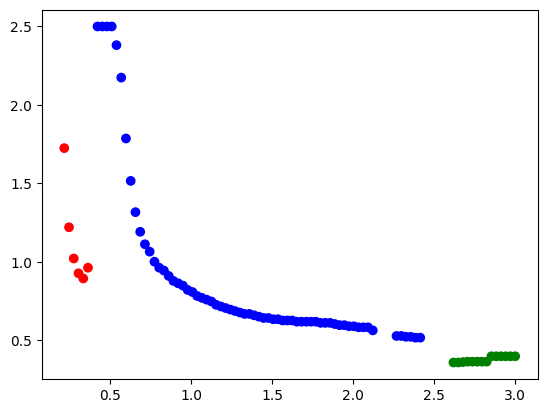

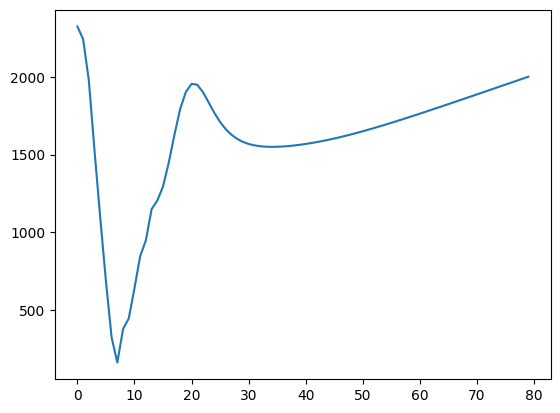

86 86
2 63.44468536208267


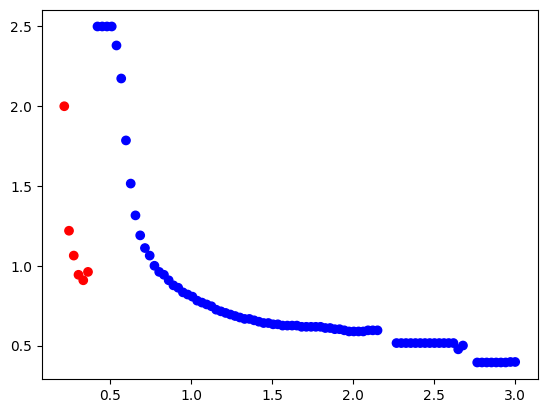

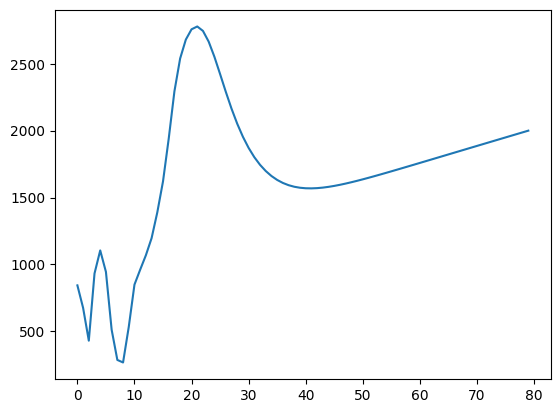

87 87
3 48.58323044618227


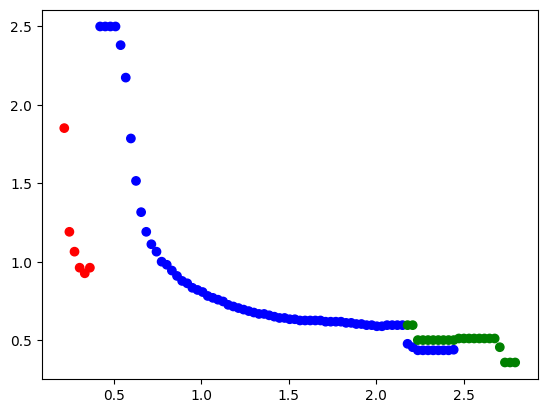

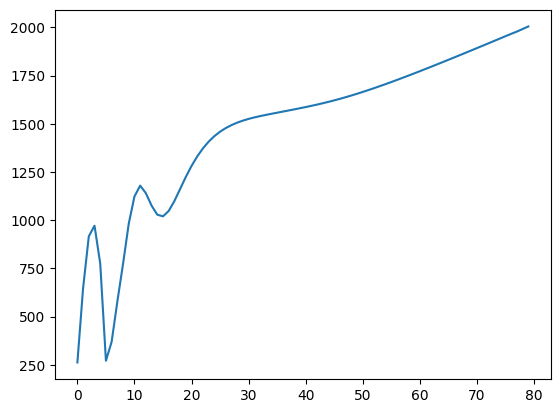

88 88
3 42.42441621402214


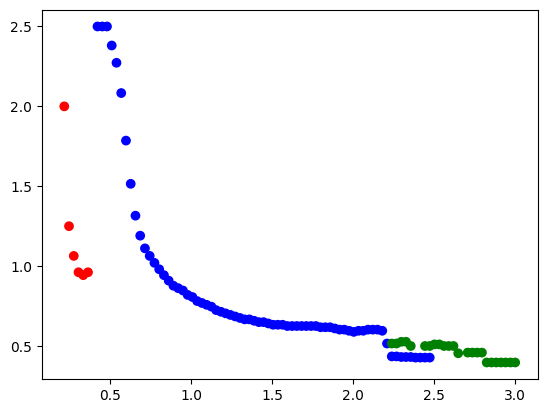

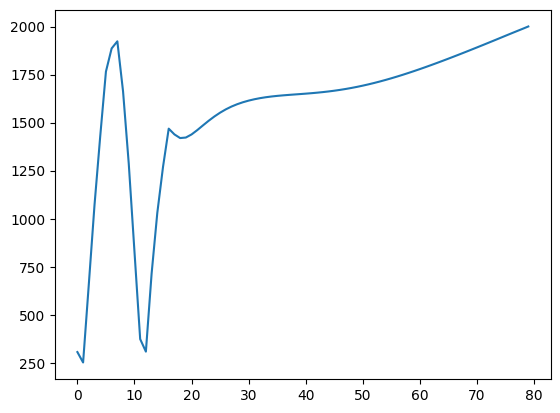

89 89
3 71.07758860987283


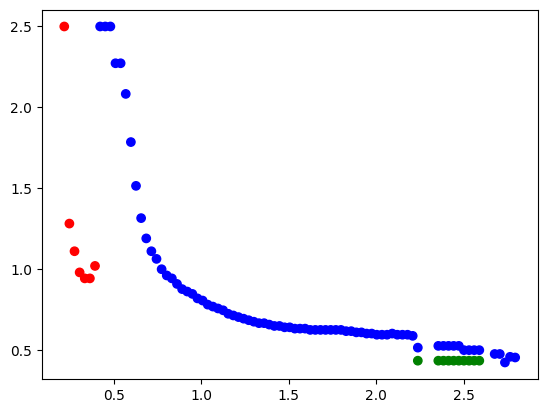

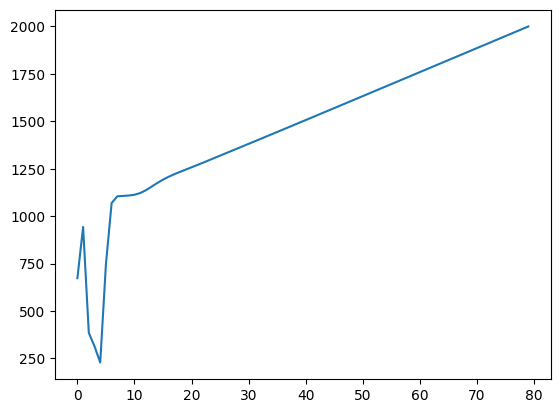

90 90
2 61.6353500623545


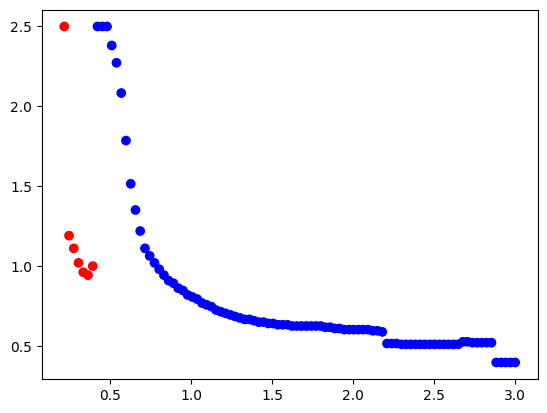

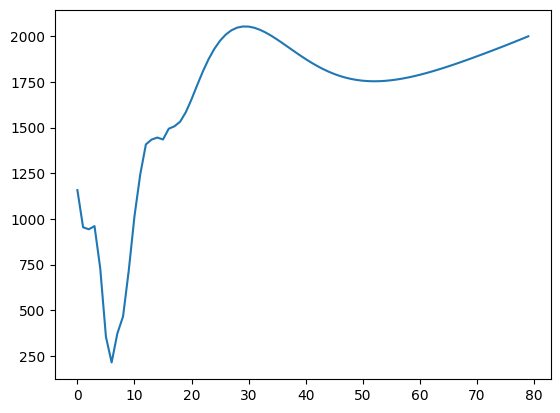

91 91
2 34.89601719553003


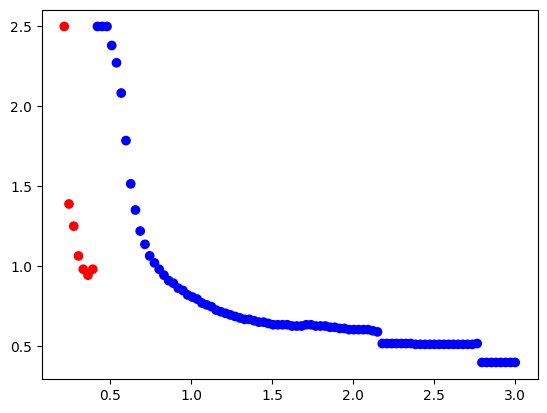

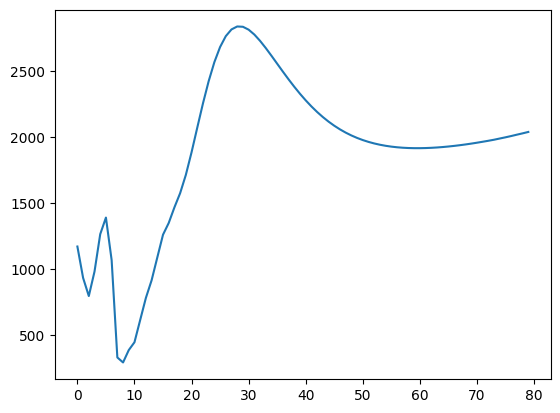

92 92
3 98.55165113178657


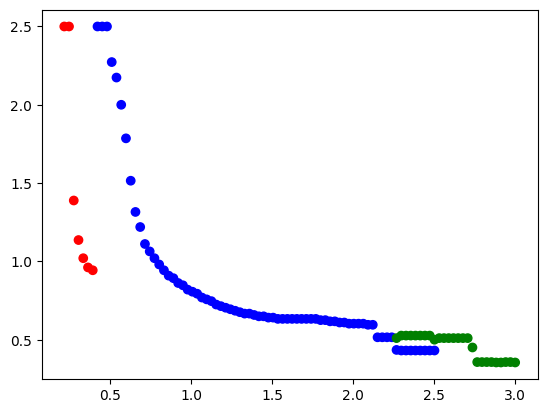

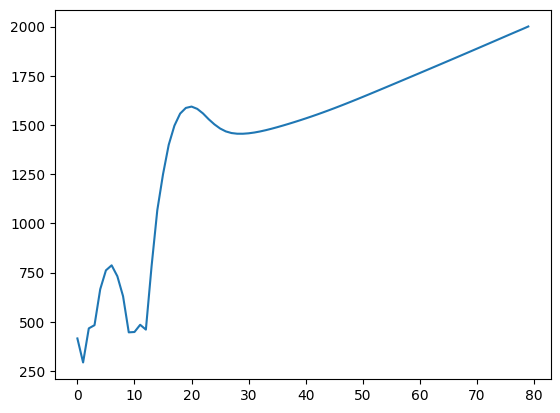

93 93
3 91.98198587733911


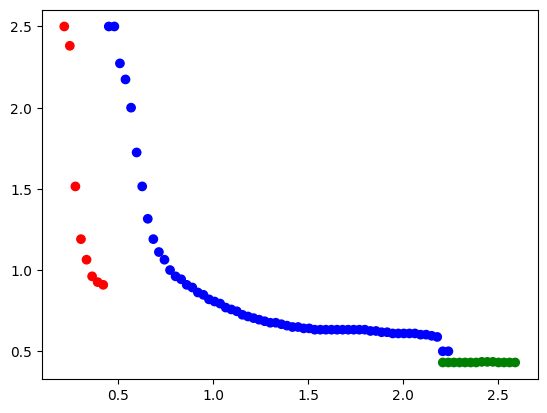

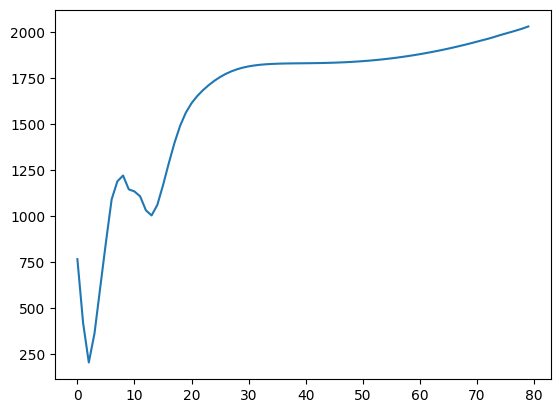

94 94
3 105.41902967756545


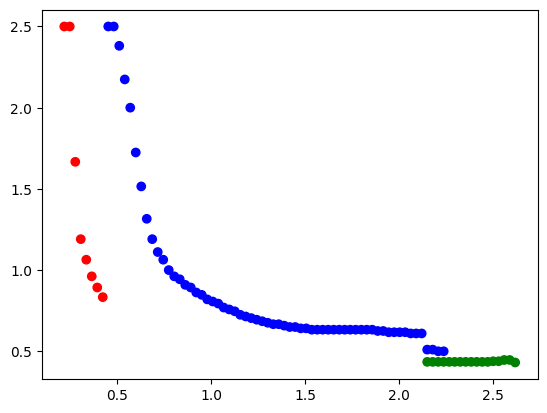

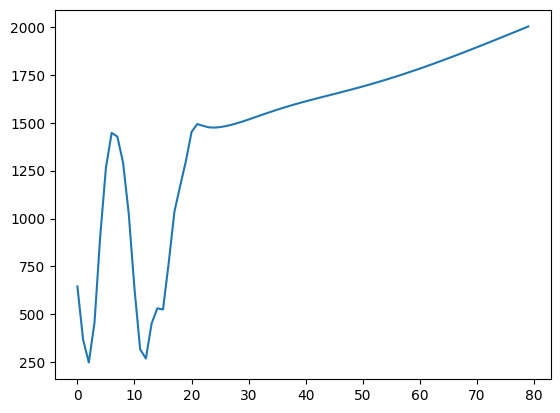

95 95
2 103.86415296479417


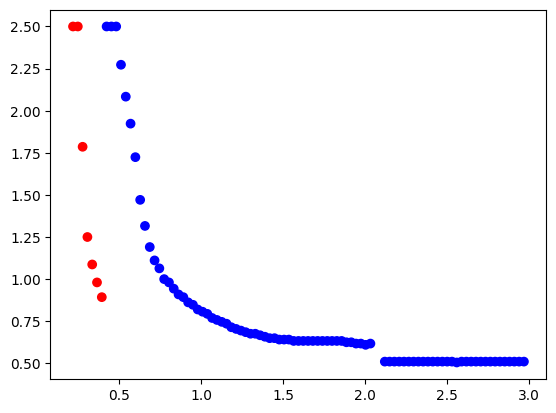

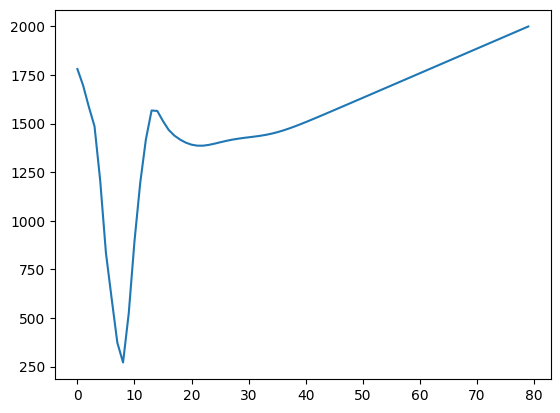

96 96
3 127.40536520083498


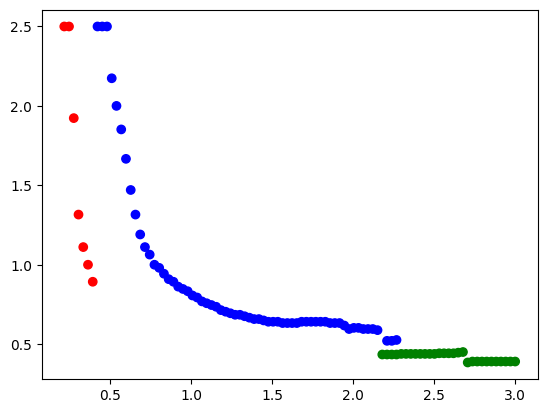

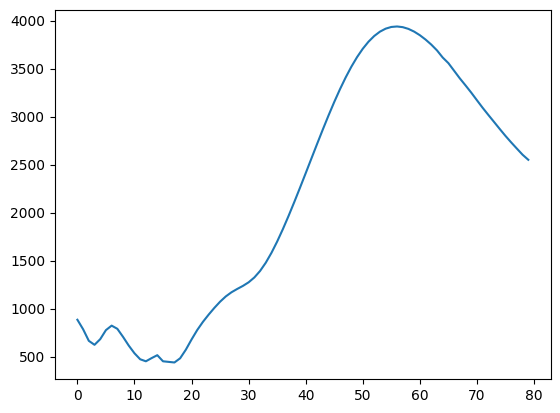

97 97
3 48.54242130923539


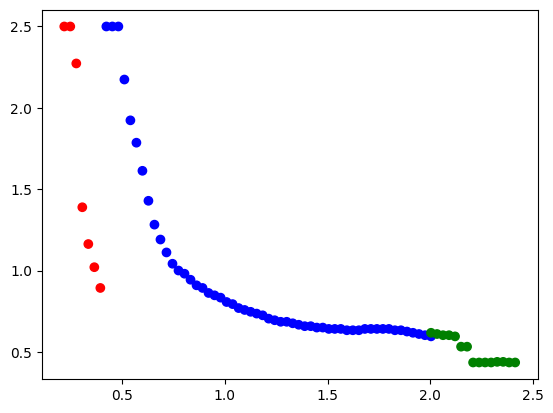

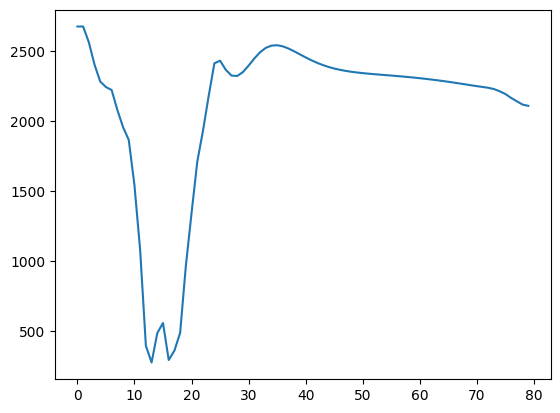

98 98
3 94.25775918312979


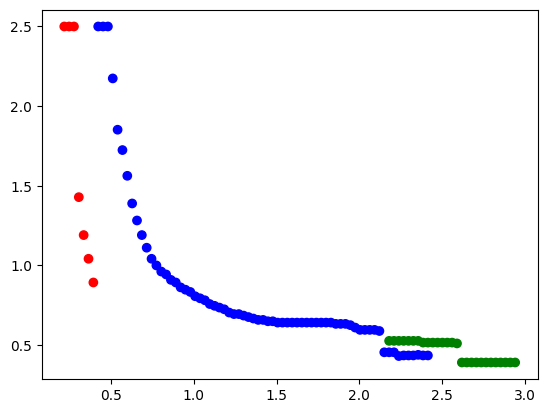

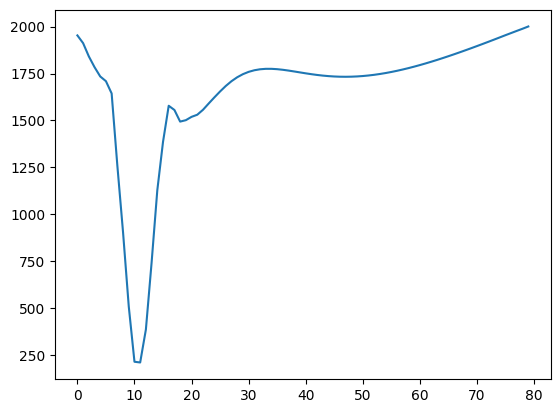

99 99
3 75.80233026233945


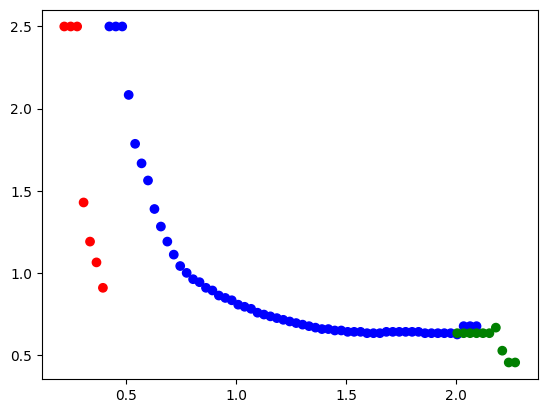

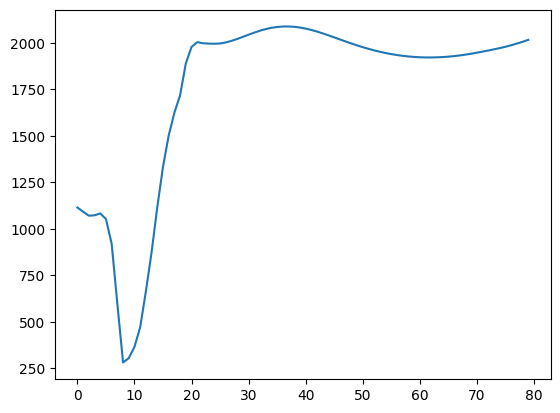

100 100
3 84.62095089751662


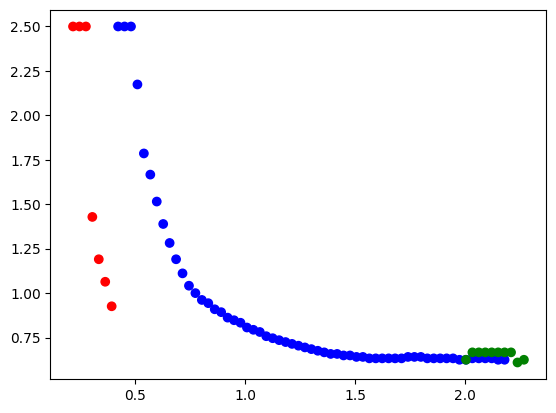

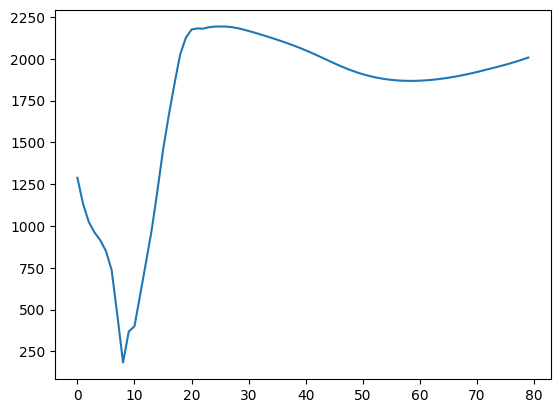

101 101
3 102.24975801555877


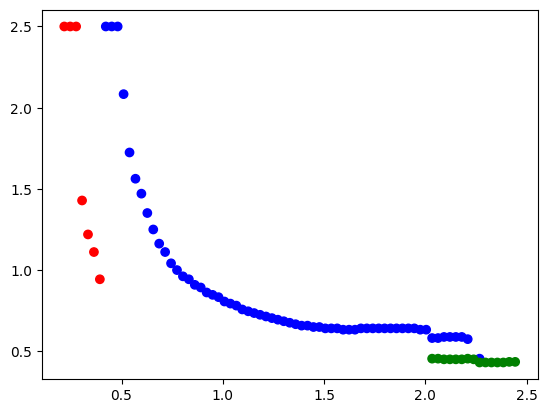

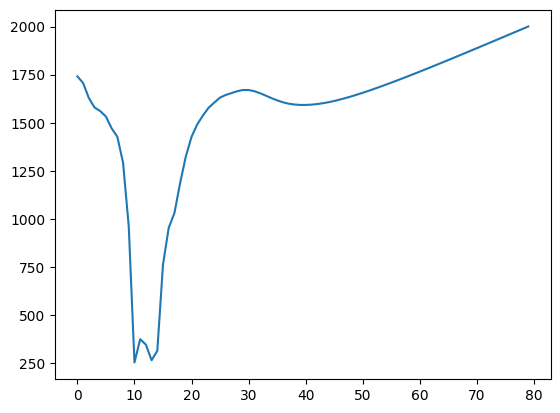

102 102
2 67.96954113970492


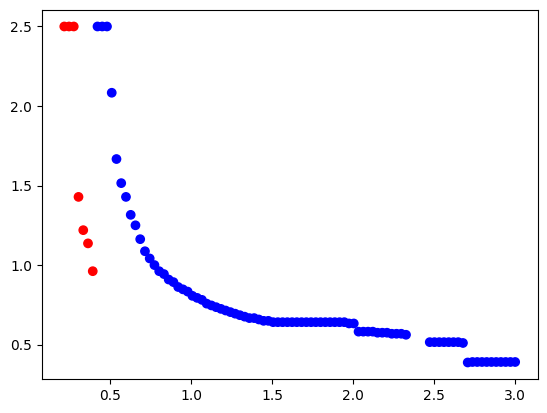

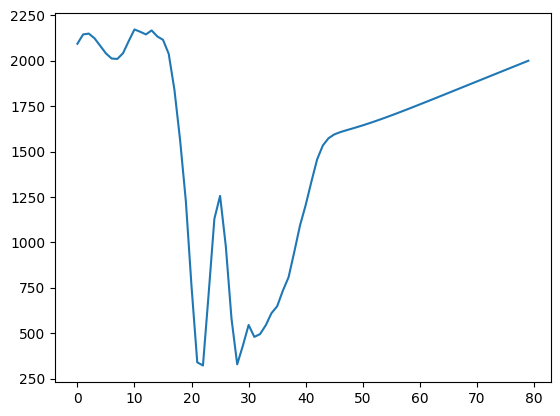

103 103
3 61.96238098988426


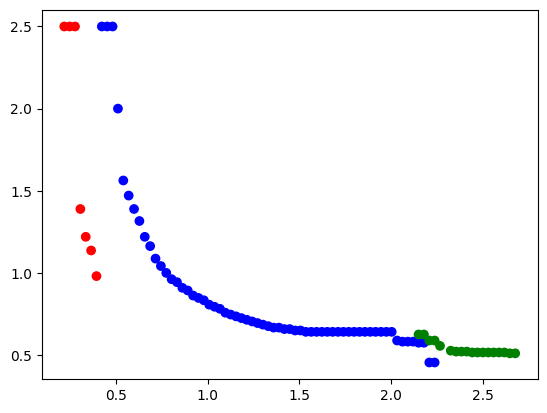

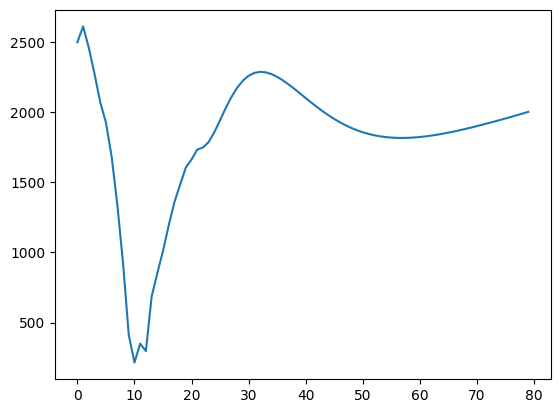

104 104
3 60.051183041943794


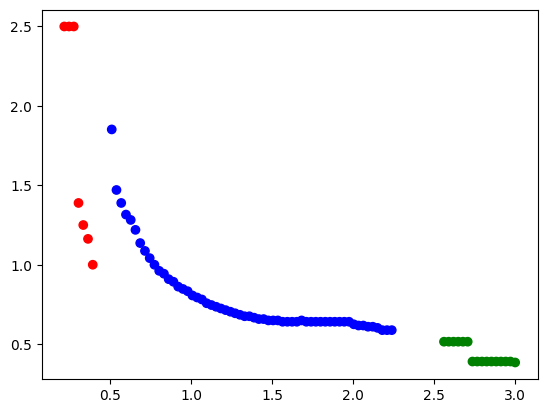

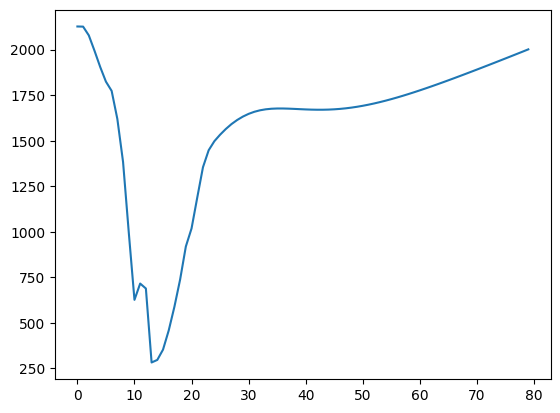

105 105
3 52.176117085546956


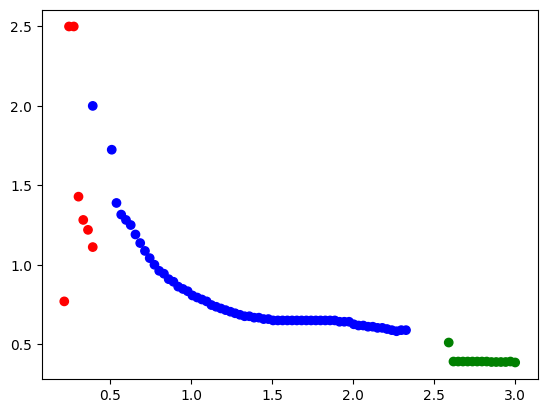

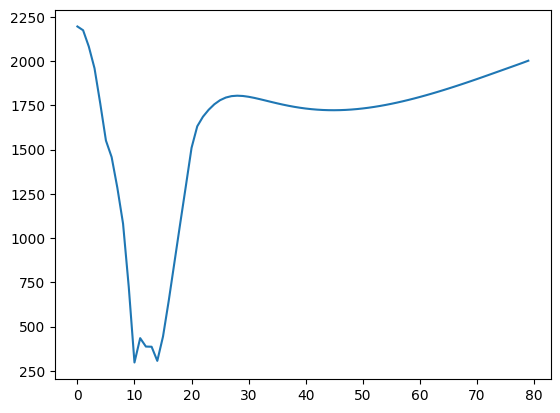

106 106
3 112.20082138465344


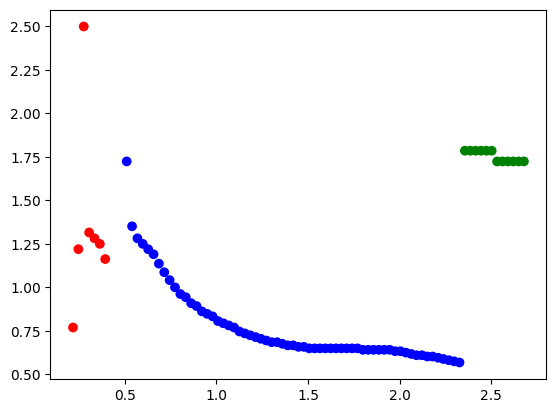

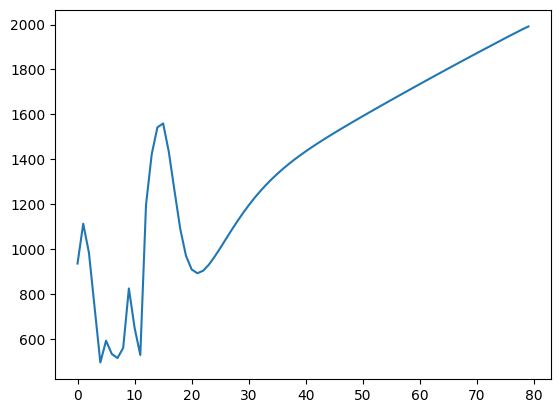

107 107
3 51.12892995460868


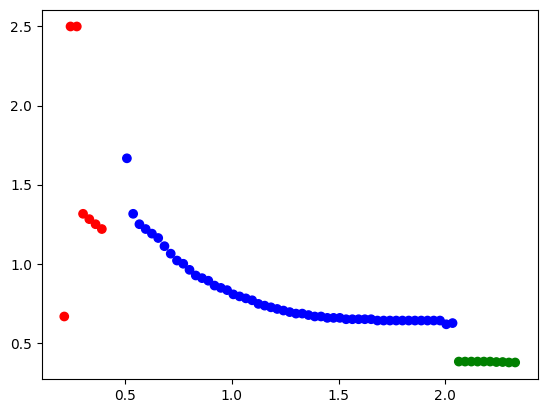

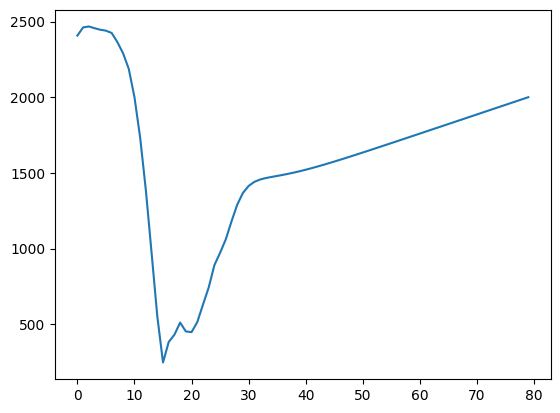

108 108
3 34.060631034237524


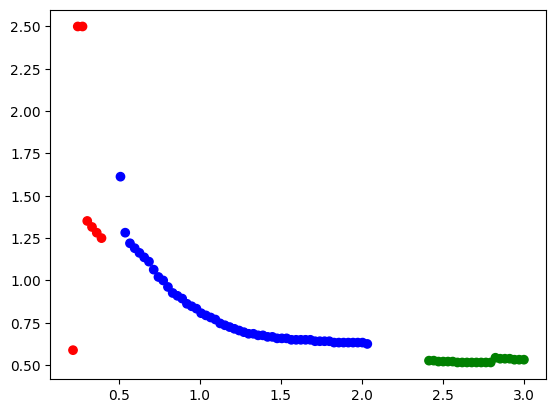

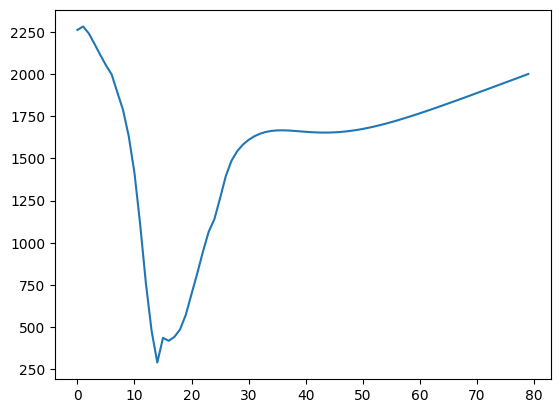

109 109
3 134.0576567622763


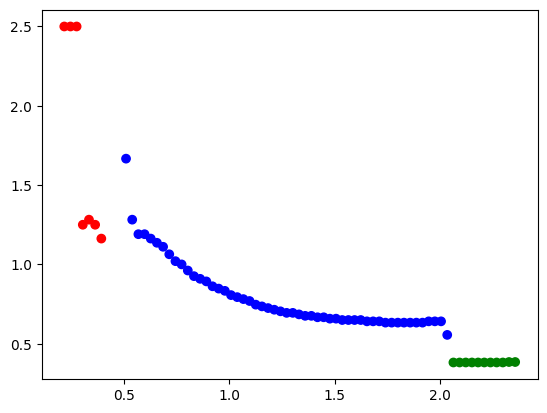

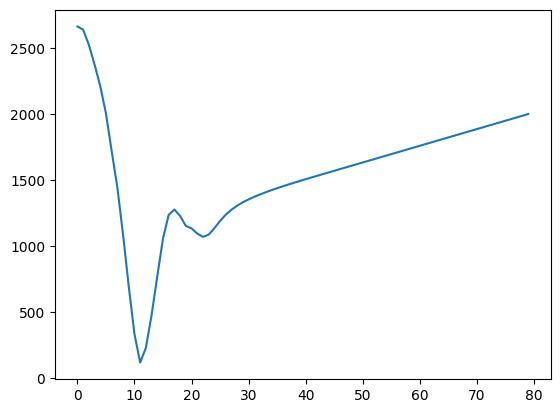

110 110
3 131.2043558738378


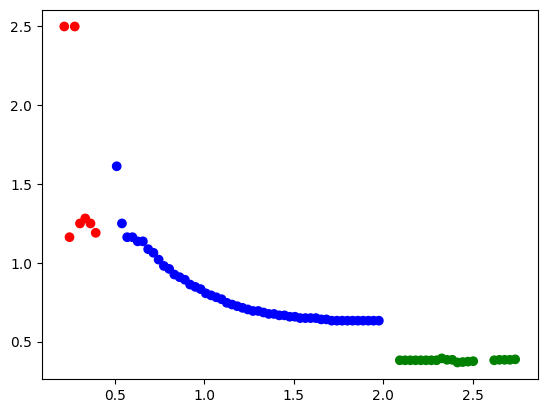

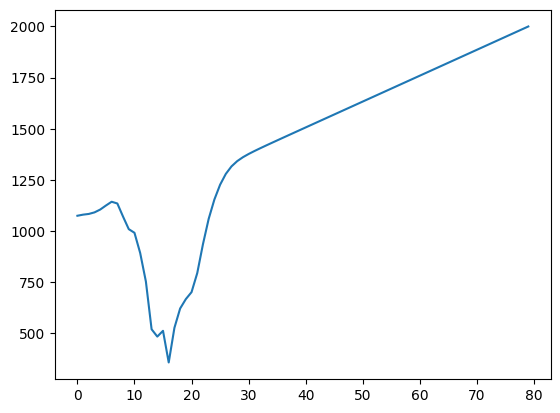

111 111
3 553.2716525530159


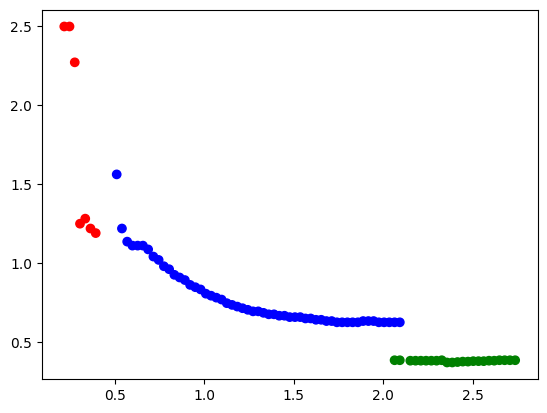

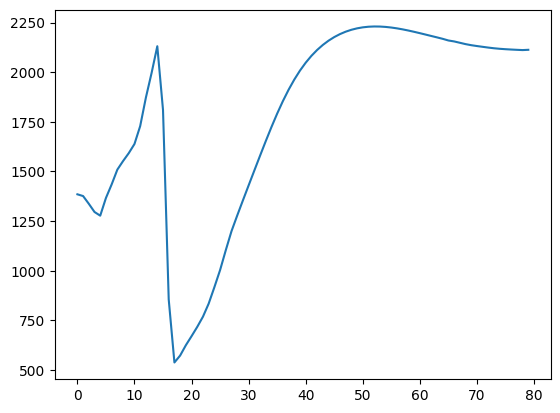

112 112
3 52.54638169187419


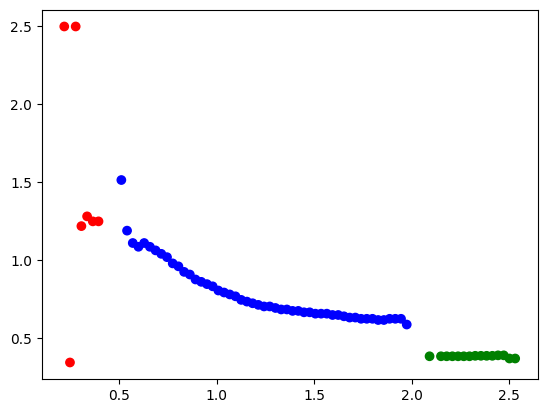

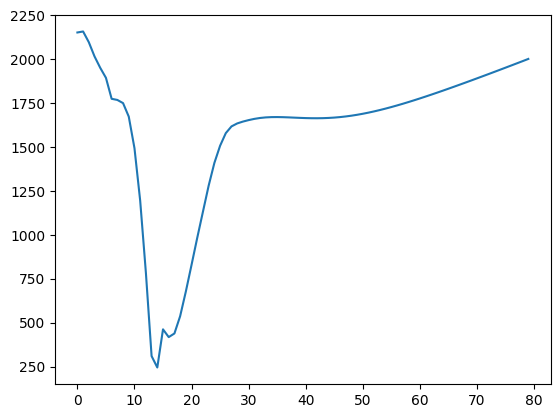

113 113
3 47.916226832310436


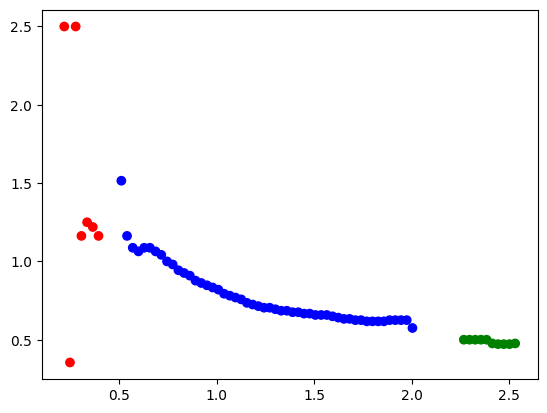

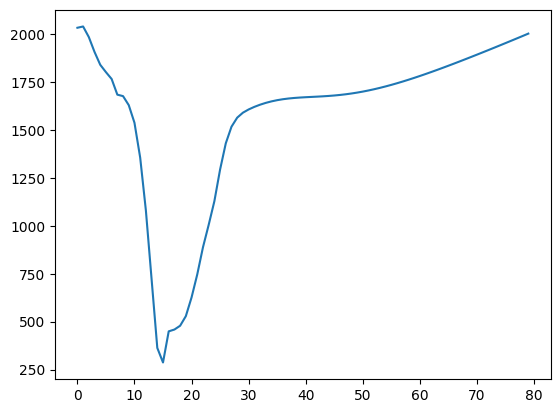

114 114
3 38.525515966818745


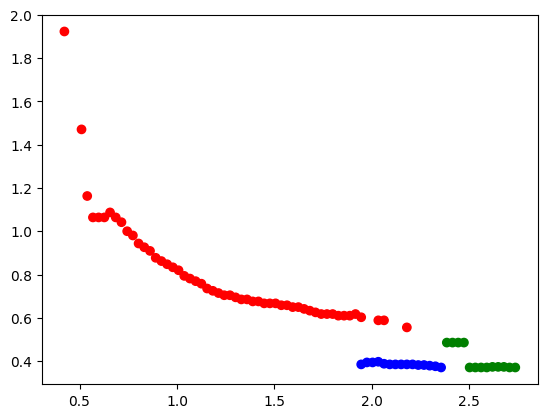

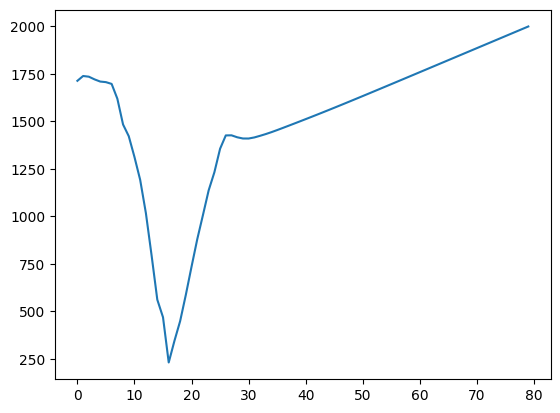

115 115
3 17.660559936211186


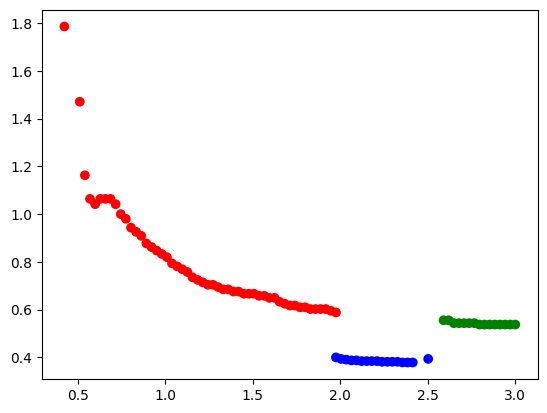

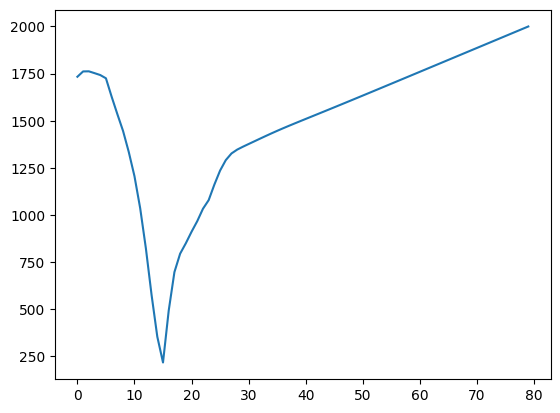

116 116
3 45.77639720763728


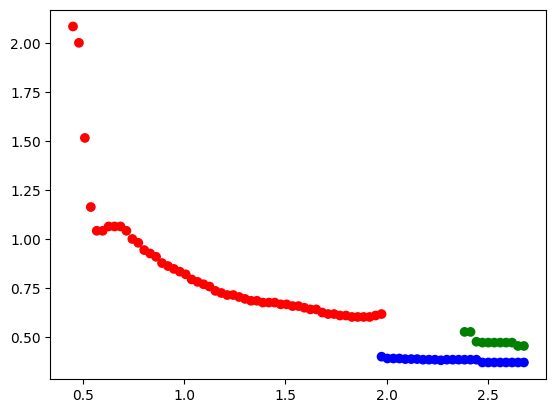

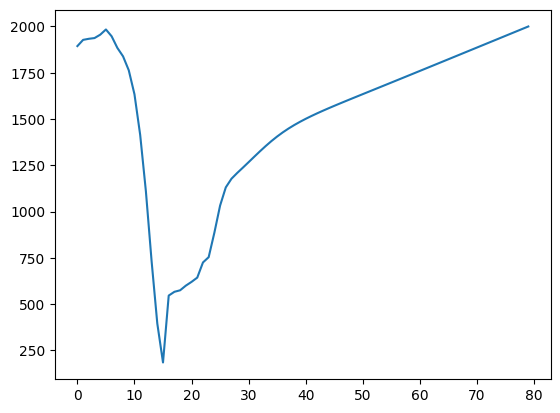

117 117
3 23.87071860904679


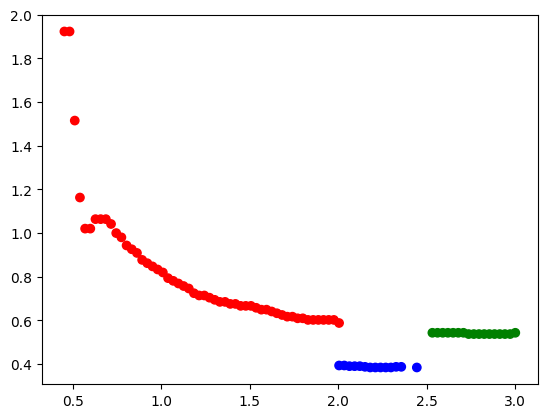

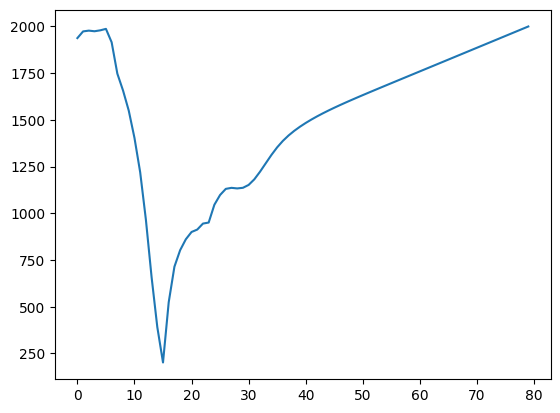

118 118
3 13.418657414242691


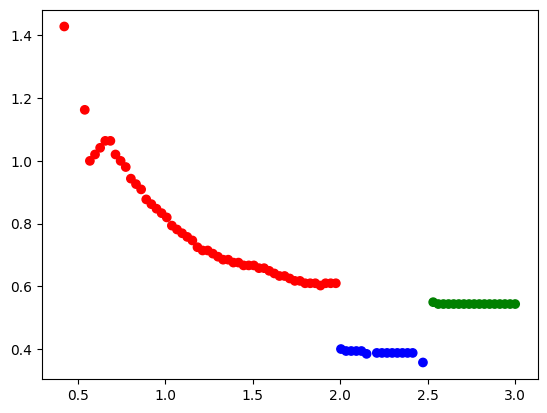

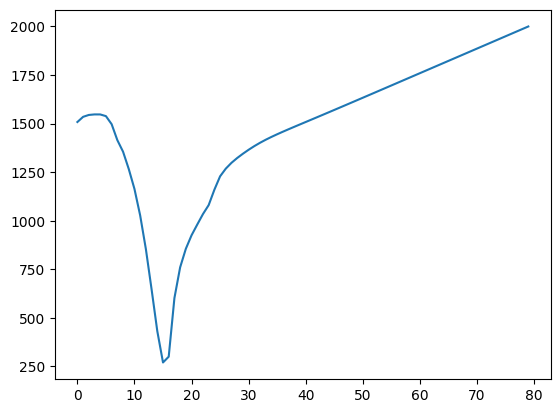

119 119
3 8.080384631499403


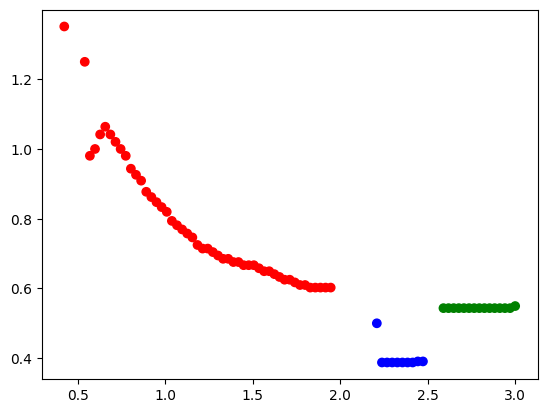

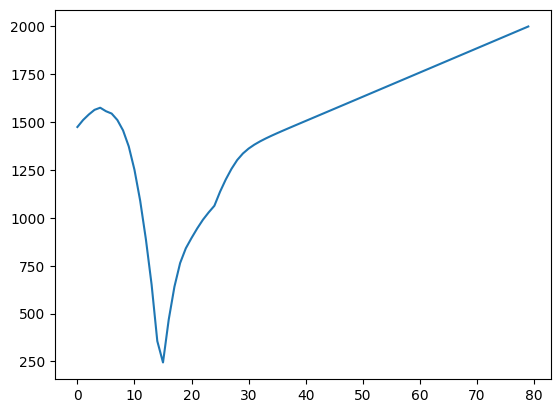

120 120
2 17.100927327697654


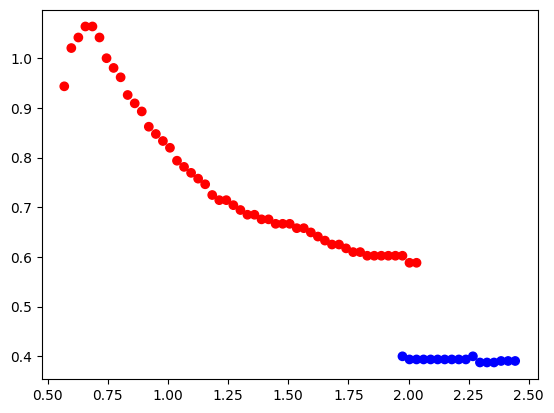

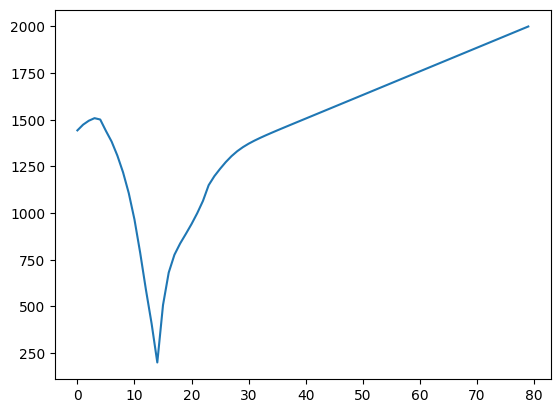

121 121
3 15.473627050488675


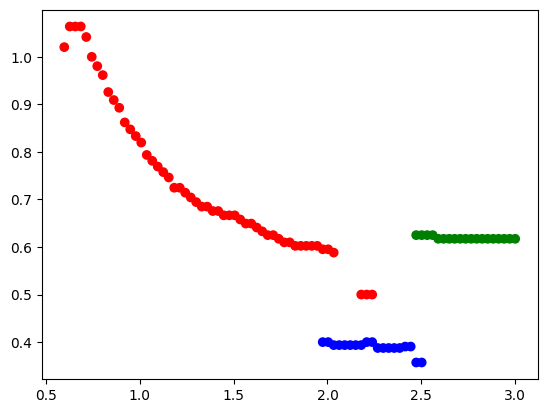

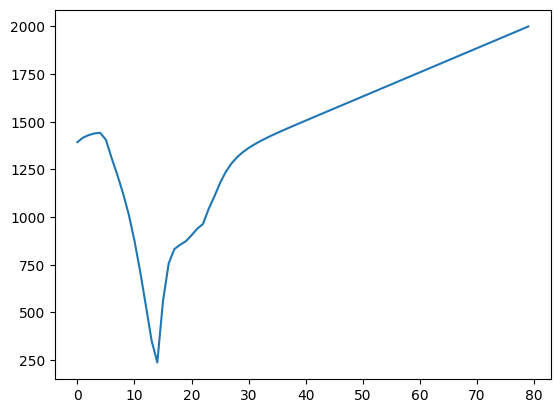

122 122
3 7.163336072478454


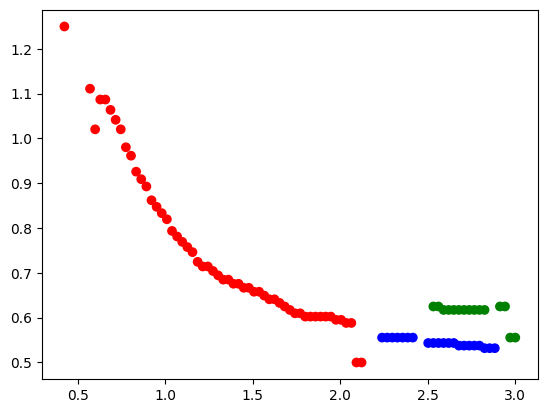

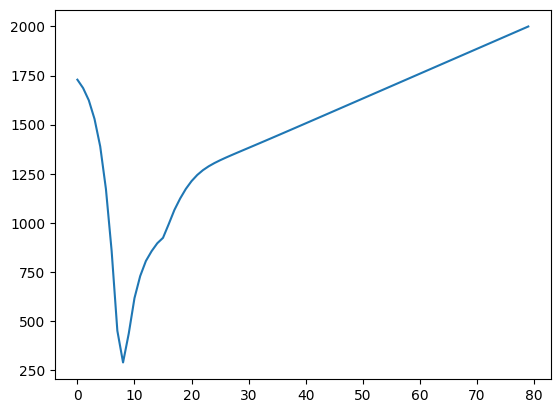

123 123
3 24.756349474377377


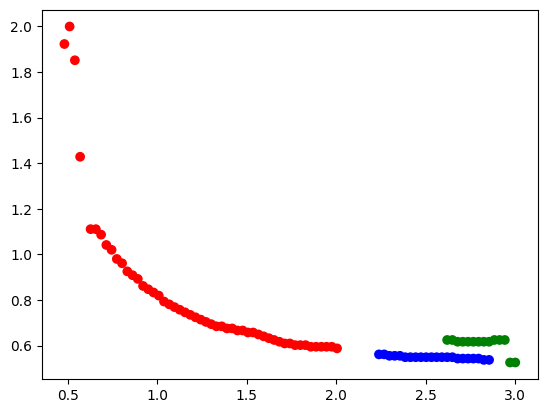

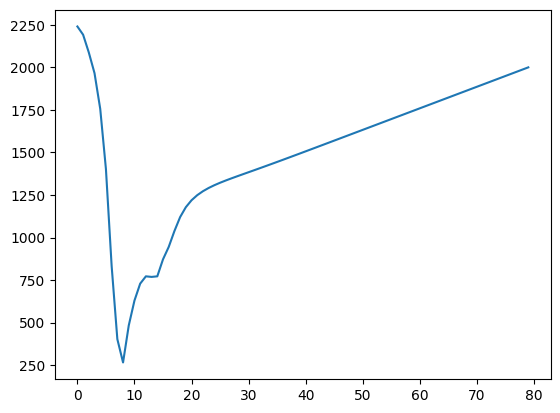

124 124
3 48.762793206950796


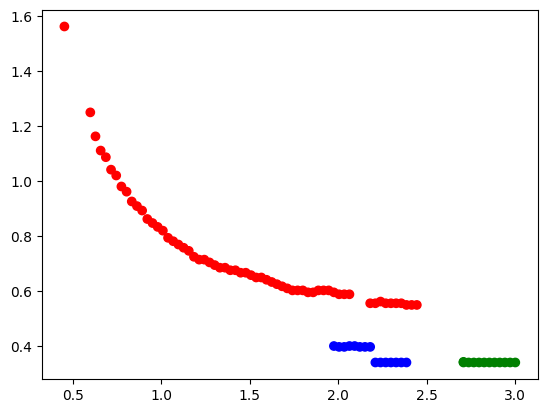

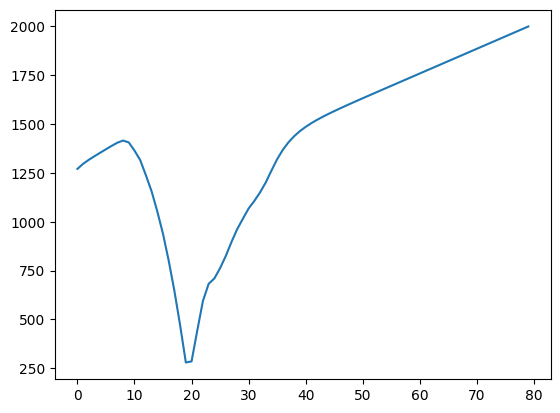

125 125
3 185.9612758803282


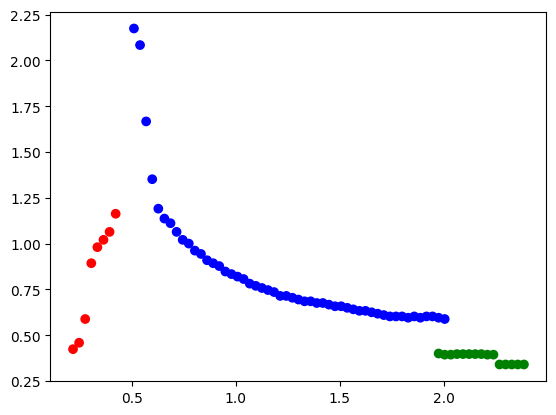

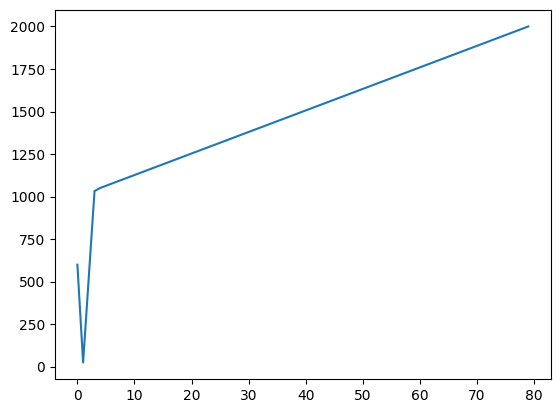

126 126
3 67.25932122021693


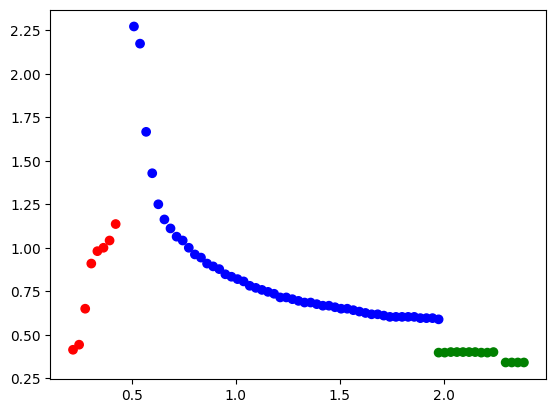

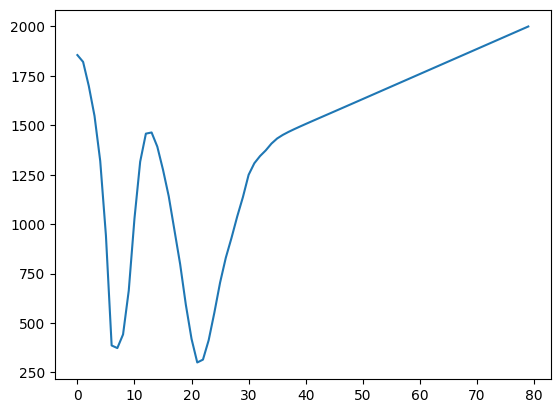

127 127
3 35.51596620813914


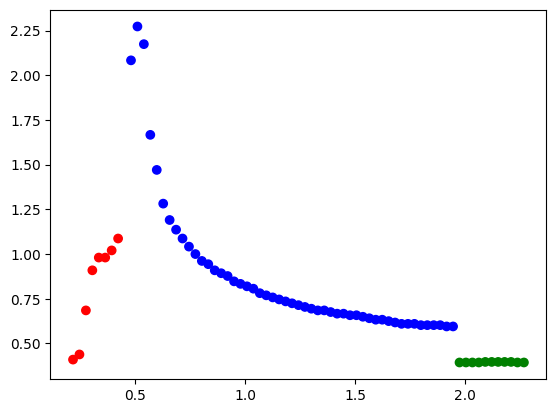

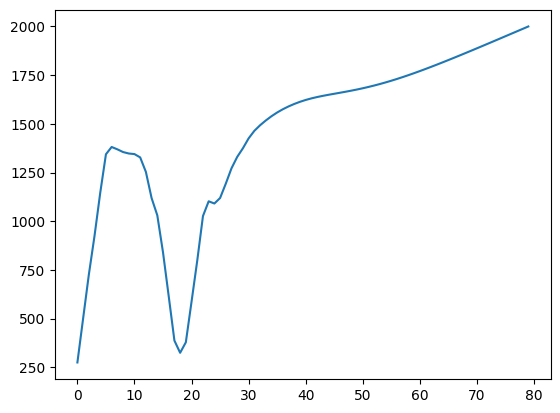

128 128
3 89.48397643608492


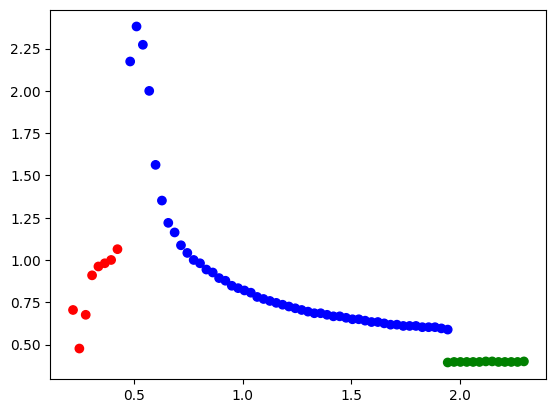

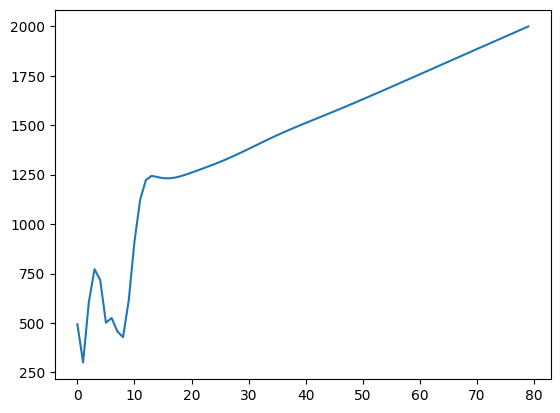

129 129
3 341.5829140042854


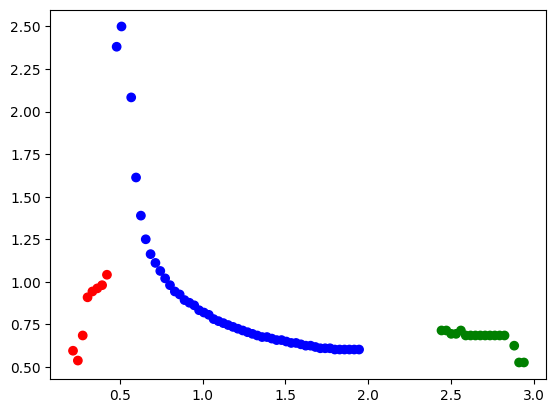

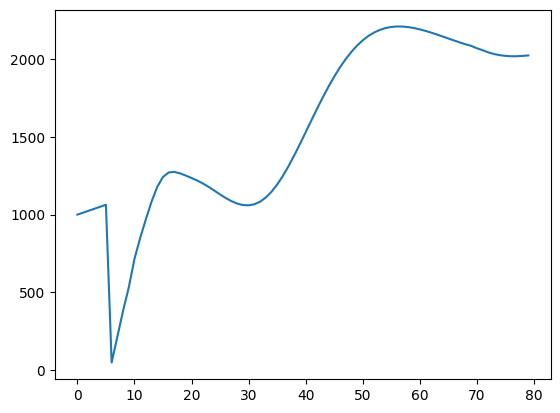

130 130
3 344.05308990228764


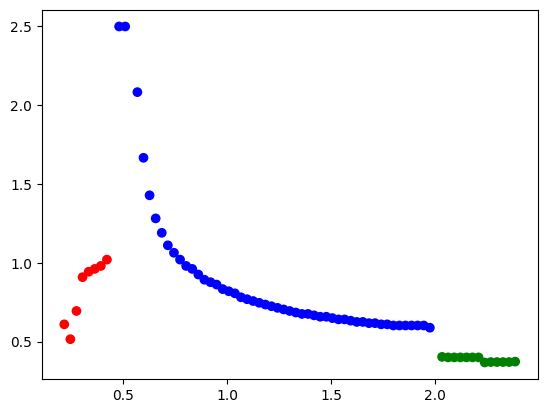

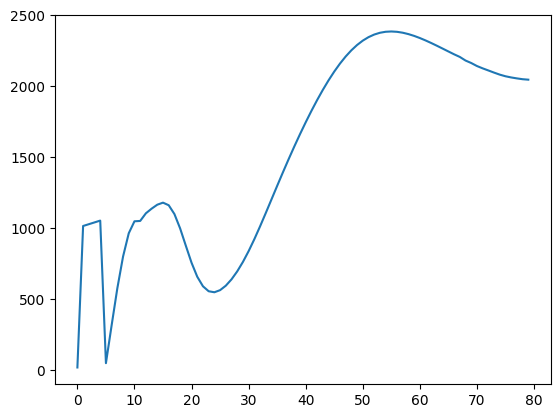

131 131
3 38.673216208214804


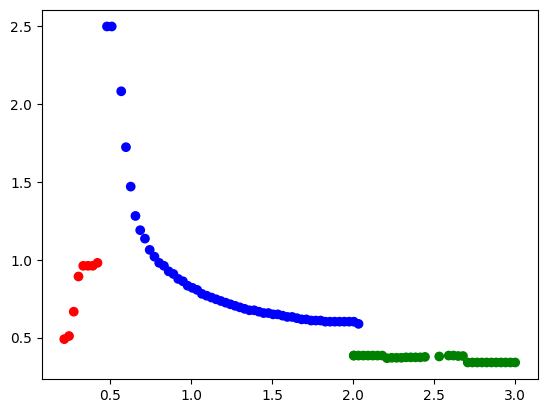

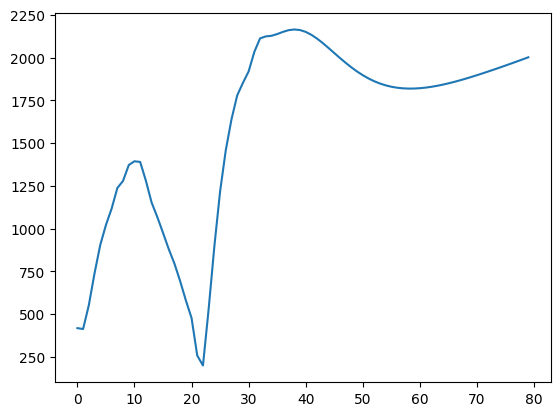

In [5]:
source=800
misfits=np.load(path+str(source).zfill(4)+'/misfits2.npy')
models=np.load(path+str(source).zfill(4)+'/inverted2.npy')

ch_dict=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/extraction/'+str(source).zfill(4)+'.npy',allow_pickle=True).item()

colors=['r','b','g']
forward_modeled=[]
forward_freqs=[]
inverted=np.zeros((len(ch_dict.keys()),80))

for k,key in enumerate(ch_dict.keys()):
    print(k,key)
    dispersion=ch_dict[key]
    
    freqs=[]
    vels=[]
    modes=[]
    
    for i in range(min(len(dispersion[0]),3)):
        for j in range(len(dispersion[0][i])):
            if dispersion[0][i][j]>=0.2:
                freqs.append(dispersion[0][i][j])
                vels.append(dispersion[1][i][j])
                modes.append(i+1)
                
    print(len(set(modes)),misfits[k])
    plt.scatter(freqs,vels,c=np.array(colors)[np.array(modes)-1])
    plt.show()
    
    plt.plot(models[k,:])
    plt.show()

In [7]:
# source=800
# misfits=np.load(path+str(source).zfill(4)+'/misfits.npy')
# models=np.load(path+str(source).zfill(4)+'/inverted.npy')

# ch_dict=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/extraction/'+str(source).zfill(4)+'.npy',allow_pickle=True).item()

# colors=['r','b','g']
# forward_modeled=[]
# forward_freqs=[]
# inverted=np.zeros((len(ch_dict.keys()),80))

# for k,key in enumerate(ch_dict.keys()):
#     print(k,key)
#     dispersion=ch_dict[key]
    
#     freqs=[]
#     vels=[]
#     modes=[]
    
#     for i in range(min(len(dispersion[0]),3)):
#         for j in range(len(dispersion[0][i])):
#             if dispersion[0][i][j]>=0.2:
#                 freqs.append(dispersion[0][i][j])
#                 vels.append(dispersion[1][i][j])
#                 modes.append(i+1)
                
#     print(len(set(modes)),misfits[k])
#     plt.scatter(freqs,vels,c=np.array(colors)[np.array(modes)-1])
#     plt.show()
    
#     plt.plot(models[k,:])
#     plt.show()

(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
0 63.507573133529974
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
1 29.157423281460595
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
2 14.206312711855148
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
3 16.397522589421975
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
4 14.970767472222464
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
5 15.735467228572867
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
6 15.734872626748519
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
7 15.73427920145935
(80, 50) (80, 50) 0
(80, 50) (80, 50) 0
8 15.153223903675823
(80, 50) (80, 50) 0
(80, 50) (80

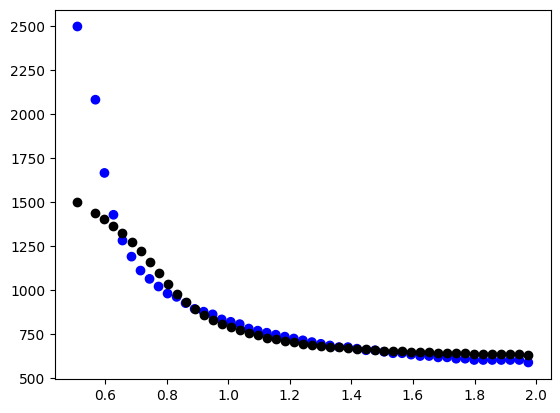

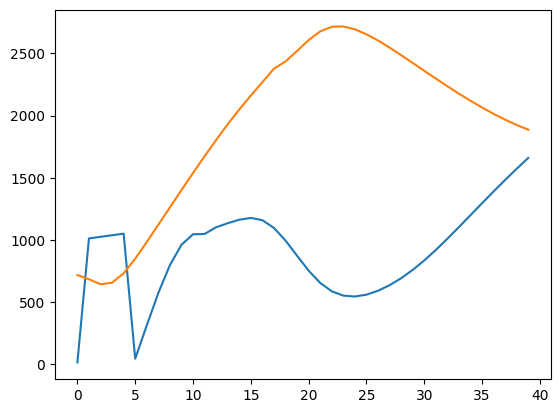

In [6]:
source=800
misfits=np.load(path+str(source).zfill(4)+'/misfits2.npy')
models=np.load(path+str(source).zfill(4)+'/inverted2.npy')

ch_dict=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/extraction/'+str(source).zfill(4)+'.npy',allow_pickle=True).item()

colors=['r','b','g']
k=130
key=list(ch_dict.keys())[k]

dispersion=ch_dict[key]

freqs=[]
vels=[]
modes=[]

for i in range(min(len(dispersion[0]),3)):
    for j in range(len(dispersion[0][i])):
        if dispersion[0][i][j]>=0.5 and dispersion[0][i][j]<=2:
            freqs.append(dispersion[0][i][j])
            vels.append(dispersion[1][i][j])
            modes.append(i+1)


pratioflag=1
lsmth=500
nupds=10
Nn=80
msigmaf=2
chilo=1
chihi=1.21

h=np.ones(Nn)*50
vsv=np.ones(Nn)*1000*np.linspace(1,2,80)
vpvsratio=1.7321
vpv=vsv*vpvsratio
rhov=np.ones(Nn)*2090.44865

Nnf=0
vpfv=np.array([])
rhofv=np.array([])
hfv=np.array([])

Nf=len(freqs)
fks = np.array(freqs)
U_data = np.array(vels)*1000
U_data_errs = np.ones(Nf)*0.15
modn = np.array(modes)-1
vflg = np.zeros(Nf)

multi_vsv_update,multi_Ur_list,multi_fksr_list,multi_chi_list=invert(U_data, Nn, vsv, vpv, rhov, fks, h, modn,vpvsratio,
                                                                     nupds,lsmth,msigmaf,chilo,chihi,U_data_errs, 
                                                                     vflg, Nnf, vpfv, rhofv, hfv,pratioflag)

index=np.argmin(multi_chi_list)
U=multi_Ur_list[index]
fksr=multi_fksr_list[index]
gmodel=multi_vsv_update[index]

plt.scatter(fks,U_data,c=np.array(colors)[np.array(modes)-1])
plt.scatter(fksr,U,c='k')
plt.show()

plt.plot(models[k,:40])
plt.plot(gmodel[:40])
plt.show()


In [7]:
ch_dict=np.load('/scratch/zspica_root/zspica0/yaolinm/Florence/extraction/'+str(source).zfill(4)+'.npy',allow_pickle=True).item()

colors=['r','b','g']
k=130
key=list(ch_dict.keys())[k]

dispersion=ch_dict[key]

freqs=[]
vels=[]
modes=[]

for i in range(min(len(dispersion[0]),3)):
    for j in range(len(dispersion[0][i])):
        if dispersion[0][i][j]>=0.2:
            freqs.append(dispersion[0][i][j])
            vels.append(dispersion[1][i][j])
            modes.append(i+1)



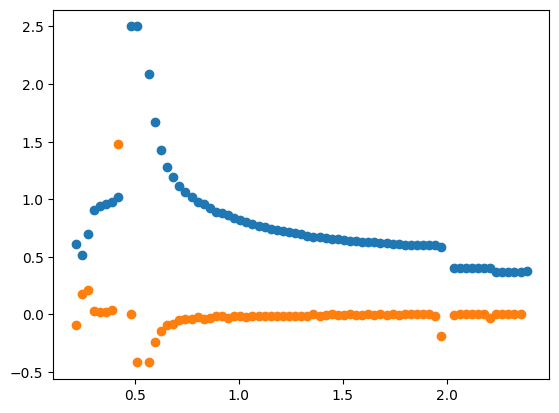

In [8]:
plt.scatter(freqs,vels)
plt.scatter(freqs[:-1],np.diff(vels))

In [9]:
def filter_scatters(freqs,vels):
    
    ### threshold 1: monotonically decreasing
    
    
    
    ### threshold 2: changing with freq
    
    ### threshold 3: variation not too large
    
    ### threshold 4: number of scatters 
    
    return filtered_freqs,filtered_vels,modes



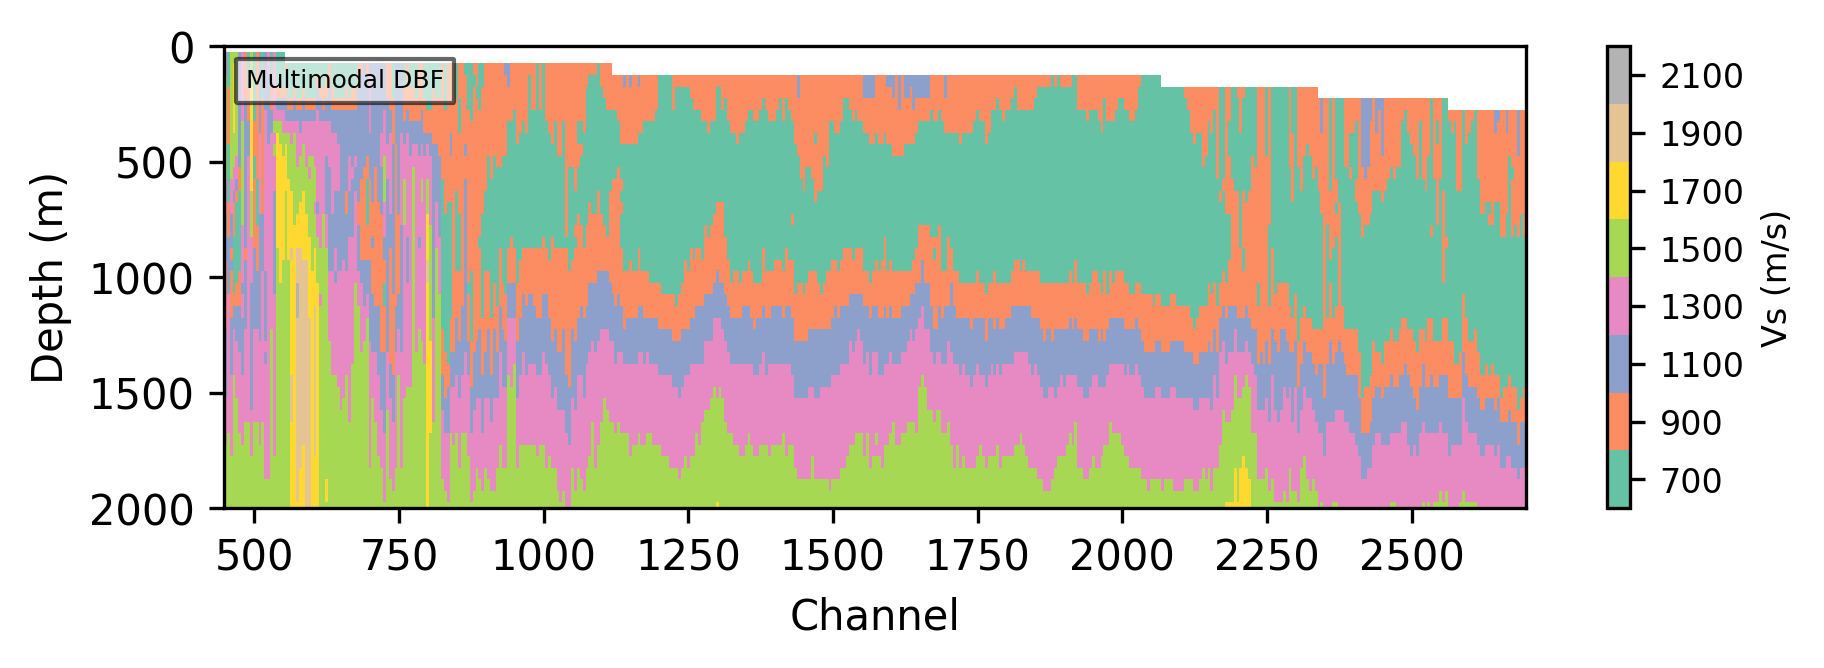

In [10]:
fig,ax=plt.subplots(1,1,figsize=(7,2),dpi=300)
axs=[ax,ax]

vs=axs[1].pcolormesh(X,Y,adjusted_model[:,:,0].T,vmin=600,vmax=2200,cmap='Set2')
axs[1].set_ylabel('Depth (m)')
axs[1].set_ylim(2000,0)
cbar=fig.colorbar(vs,ax=axs[1])
cbar.set_label('Vs (m/s)',fontsize=8)
cbar.ax.tick_params(labelsize=8) 
cbar.set_ticks([700,900,1100,1300,1500,1700,1900,2100])
axs[1].set_xticks([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[1].set_xticklabels([500,750,1000,1250,1500,1750,2000,2250,2500])
axs[1].set_xlabel('Channel')
at = AnchoredText('Multimodal DBF',prop=dict(size=6), frameon=True,loc=2,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[1].add_artist(at)

In [48]:
chs=np.arange(450,2700,5)
dispersions=np.zeros((len(chs),100,2))
model=np.zeros((len(chs),80))
old_path='/scratch/zspica_root/zspica0/yaolinm/Florence/inversion/'
path='/scratch/zspica_root/zspica0/yaolinm/Florence/inversion2/'

c=0

for ch in chs:
    if len(glob.glob(path+str(ch).zfill(4)+'/*'))>0:
        c+=1
        
print(c)

for i,ch in enumerate(chs):
    dispersions[i,:]=np.load(old_path+str(ch).zfill(4)+'/dispersion.npy')
    
    try:
        model[i,:]=np.load(path+str(ch).zfill(4)+'/singlemode_vs.npy')
        
    except:
        print(ch)

450


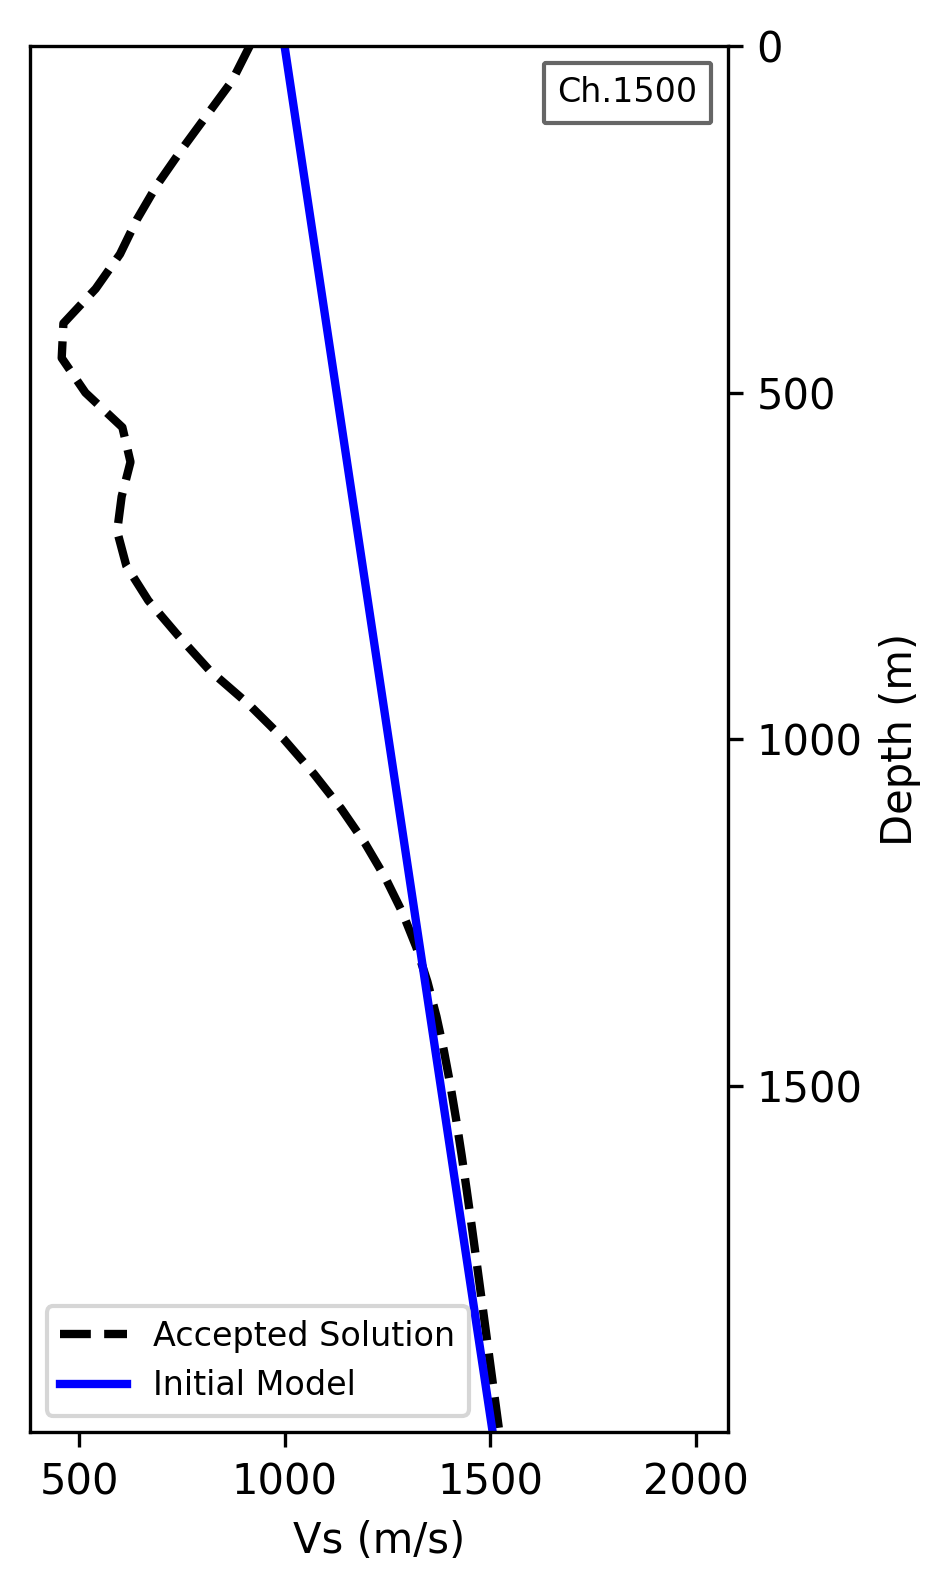

In [11]:
fig,ax=plt.subplots(1,1,figsize=(3,6),dpi=300)
axs=[ax,ax,ax]

source=1500
misfits=np.load(path+str(source).zfill(4)+'/misfits2.npy')
models=np.load(path+str(source).zfill(4)+'/inverted2.npy')
c=0
for i in range(50,len(misfits)):
    if 0<=misfits[i]<=5:
        if c==0:
            axs[2].plot(models[i,:], np.arange(0,4000,50), "k--", linewidth=2,label='Accepted Solution')
            break
        
     
axs[2].plot(np.ones(80)*1000*np.linspace(1,2,80), np.arange(0,4000,50), 'b', linewidth=2,label='Initial Model')  
axs[2].set_ylim(2000,0)      
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position('right')
axs[2].set_yticks([0,500,1000,1500])
axs[2].set_yticklabels([0,500,1000,1500])
axs[2].set_ylabel('Depth (m)')
axs[2].set_xlabel('Vs (m/s)')
axs[2].legend(fontsize=8,loc=3)
at = AnchoredText('Ch.1500',prop=dict(size=8), frameon=True,loc=1,)
at.patch.set_boxstyle('round',pad=0,rounding_size=0.05)
at.patch.set_alpha(0.6)
axs[2].add_artist(at)